# Week 3 Assignment

Global Modeling Rules (Apply Throughout)

- Use temporal splits:

  - 90% training / 10% testing

  - 80% training / 20% testing

- Stationarity claims must be supported by:

  - visual evidence, and

  - ADF and KPSS test results

- Model identification must include:

  - ACF and PACF reasoning, and

  - at least one information criterion (AIC or AICc)

## Part I — Okun’s Law and Regression with Time-Series Awareness



### 1. Exploratory Data Analysis (5 pts)

Perform numerical and visual EDA for GDP (levels) and the unemployment rate (levels). Identify trends, nonstationarity, structural breaks, or outliers.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from google.colab import files
files.upload()

Saving hw3_data.csv to hw3_data (1).csv


{'hw3_data (1).csv': b'date,gdp,urate\r\n1/1/1948,265.742,3.4\r\n4/1/1948,272.567,3.9\r\n7/1/1948,279.196,3.6\r\n10/1/1948,280.366,3.7\r\n1/1/1949,275.034,4.3\r\n4/1/1949,271.351,5.3\r\n7/1/1949,272.889,6.7\r\n10/1/1949,270.627,7.9\r\n1/1/1950,280.828,6.5\r\n4/1/1950,290.383,5.8\r\n7/1/1950,308.153,5\r\n10/1/1950,319.945,4.2\r\n1/1/1951,336,3.7\r\n4/1/1951,344.09,3.1\r\n7/1/1951,351.385,3.1\r\n10/1/1951,356.178,3.5\r\n1/1/1952,359.82,3.2\r\n4/1/1952,361.03,2.9\r\n7/1/1952,367.701,3.2\r\n10/1/1952,380.812,3\r\n1/1/1953,387.98,2.9\r\n4/1/1953,391.749,2.7\r\n7/1/1953,391.171,2.6\r\n10/1/1953,385.97,3.1\r\n1/1/1954,385.345,4.9\r\n4/1/1954,386.121,5.9\r\n7/1/1954,390.996,5.8\r\n10/1/1954,399.734,5.7\r\n1/1/1955,413.073,4.9\r\n4/1/1955,421.532,4.7\r\n7/1/1955,430.221,4\r\n10/1/1955,437.092,4.3\r\n1/1/1956,439.746,4\r\n4/1/1956,446.01,4\r\n7/1/1956,451.191,4.4\r\n10/1/1956,460.463,3.9\r\n1/1/1957,469.779,4.2\r\n4/1/1957,472.025,3.9\r\n7/1/1957,479.49,4.2\r\n10/1/1957,474.864,4.5\r\n1/1/1958,4

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)   # show full cell contents
pd.set_option("display.width", None)          # no line wrapping

In [ ]:
df=pd.read_csv('hw3_data.csv')
df['date']=pd.to_datetime(df['date'])
df=df.dropna().sort_values(by='date').reset_index(drop=True)
df=df.set_index('date')
df.head()

gdp  urate
date                      
1948-01-01  265.742    3.4
1948-04-01  272.567    3.9
1948-07-01  279.196    3.6
1948-10-01  280.366    3.7
1949-01-01  275.034    4.3

In [ ]:
# PART I.1: Exploratory Data Analysis (EDA)
desc_stats = df[['gdp', 'urate']].describe()

skew = df[['gdp', 'urate']].skew()
kurt = df[['gdp', 'urate']].kurt()

extended_stats = pd.concat([desc_stats,skew.to_frame('skewness').T,
              kurt.to_frame('kurtosis').T])

print("\nExtended Descriptive Statistics:")
print(extended_stats)



Extended Descriptive Statistics:
                   gdp       urate
count       292.000000  292.000000
mean       6481.725808    5.779110
std        6487.790355    1.743680
min         265.742000    2.600000
25%         802.669250    4.500000
50%        4046.925500    5.600000
75%       11011.904000    6.825000
max       21747.394000   14.800000
skewness      0.840226    0.985006
kurtosis     -0.605340    1.976799


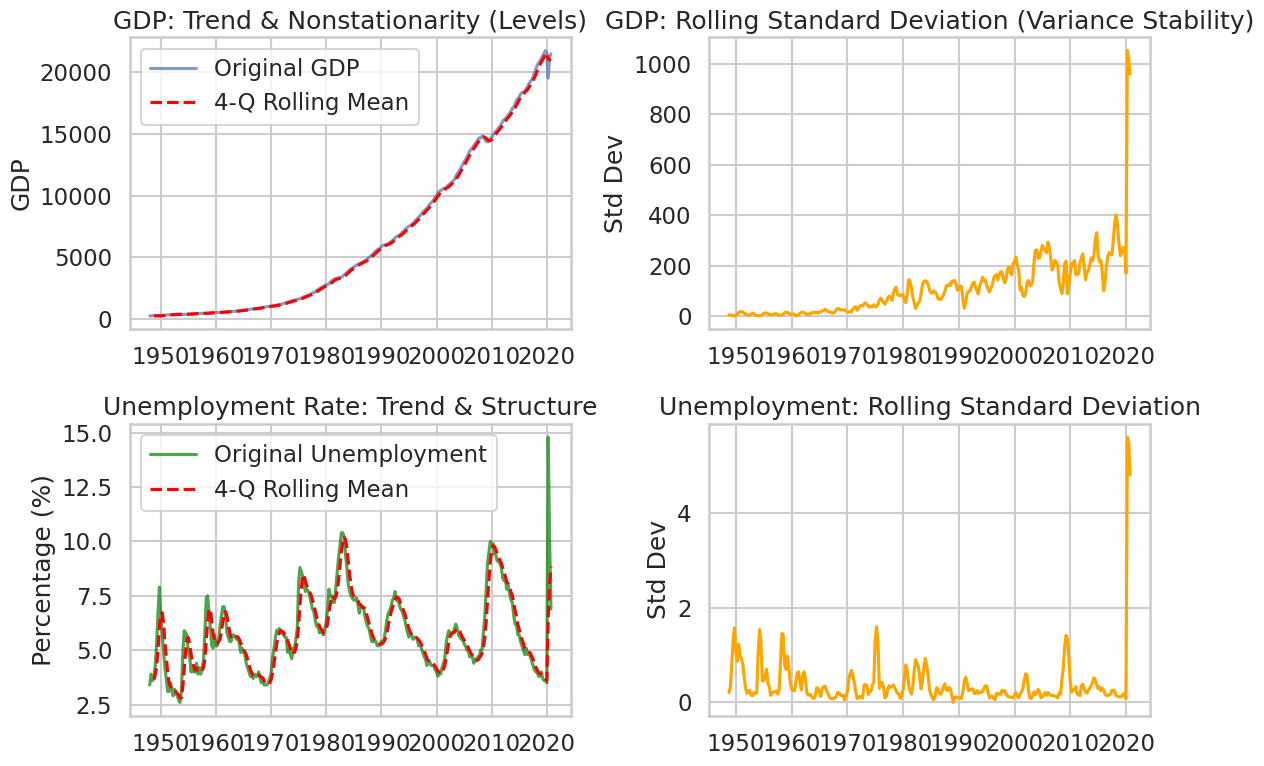

In [ ]:
# Visual EDA: Plotting Levels
window_size = 4

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# --- GDP Analysis ---
axes[0, 0].plot(df['gdp'], label='Original GDP', alpha=0.7)
axes[0, 0].plot(df['gdp'].rolling(window=window_size).mean(),
                color='red', linestyle='--', label=f'{window_size}-Q Rolling Mean')
axes[0, 0].set_title('GDP: Trend & Nonstationarity (Levels)')
axes[0, 0].legend()
axes[0, 0].set_ylabel('GDP')

axes[0, 1].plot(df['gdp'].rolling(window=window_size).std(), color='orange')
axes[0, 1].set_title('GDP: Rolling Standard Deviation (Variance Stability)')
axes[0, 1].set_ylabel('Std Dev')

# --- Unemployment Rate Analysis ---
axes[1, 0].plot(df['urate'], label='Original Unemployment', alpha=0.7, color='green')
axes[1, 0].plot(df['urate'].rolling(window=window_size).mean(),
                color='red', linestyle='--', label=f'{window_size}-Q Rolling Mean')
axes[1, 0].set_title('Unemployment Rate: Trend & Structure')
axes[1, 0].legend()
axes[1, 0].set_ylabel('Percentage (%)')

axes[1, 1].plot(df['urate'].rolling(window=window_size).std(), color='orange')
axes[1, 1].set_title('Unemployment: Rolling Standard Deviation')
axes[1, 1].set_ylabel('Std Dev')

plt.tight_layout()
plt.show()

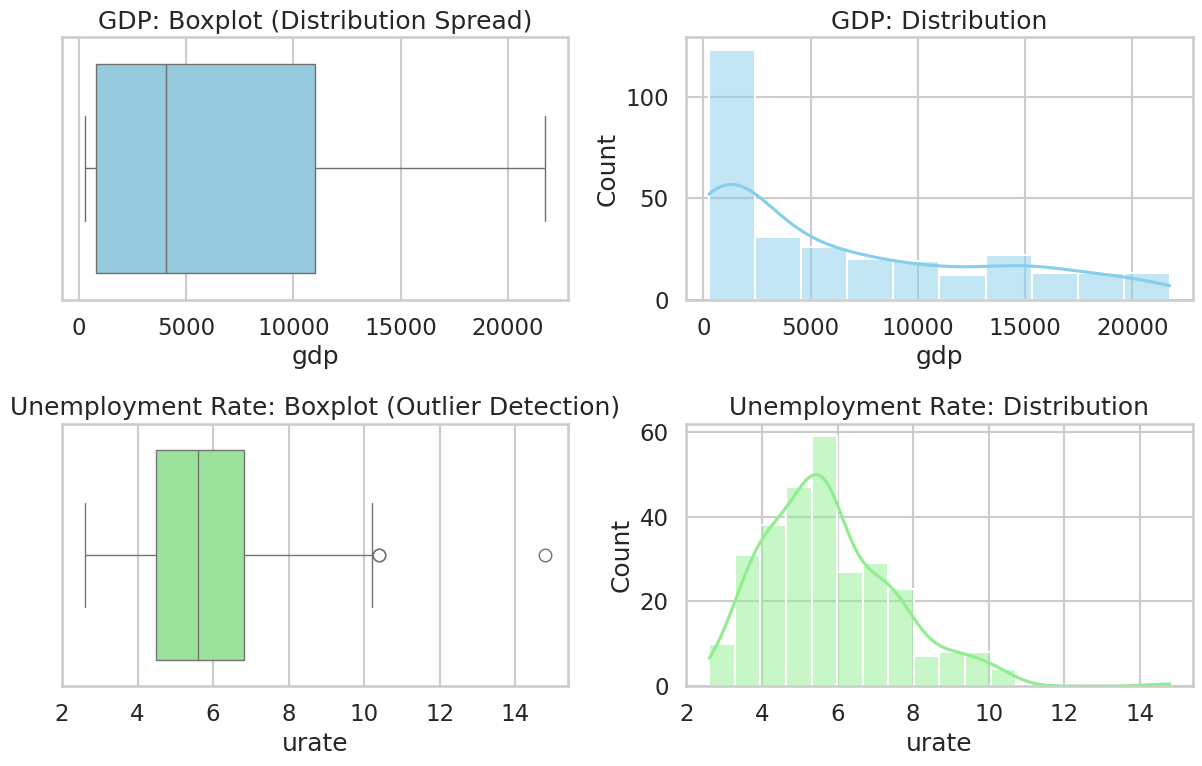

In [ ]:
# 3. Outlier Visualization: Boxplots & Histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))


sns.boxplot(x=df['gdp'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('GDP: Boxplot (Distribution Spread)')

sns.boxplot(x=df['urate'], ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Unemployment Rate: Boxplot (Outlier Detection)')


sns.histplot(df['gdp'], kde=True, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('GDP: Distribution')

sns.histplot(df['urate'], kde=True, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Unemployment Rate: Distribution')

plt.tight_layout()
plt.show()

## Numerical & Visual Analysis:

**GDP (Levels):** The time plot shows a consistent exponential upward trend, indicating the series is non-stationary in its mean. The rolling standard deviation plot highlights heteroscedasticity, as the variance of GDP levels increases significantly over time.

**Unemployment Rate (Levels):** the series is cyclical with no long-term linear trend, but it is structurally non-stationary due to volatility clustering. The boxplots and histograms reveal a relatively bounded distribution but with extreme right-tail outliers, most notably the structural break caused by the COVID-19 shock in 2020 (reaching ~14%).

### 2. Okun’s Law: Conceptual Assessment (5 pts)

What is Okun’s Law? Does the dataset match what economic theory would suggest? Explain using both time plots and economic interpretation.



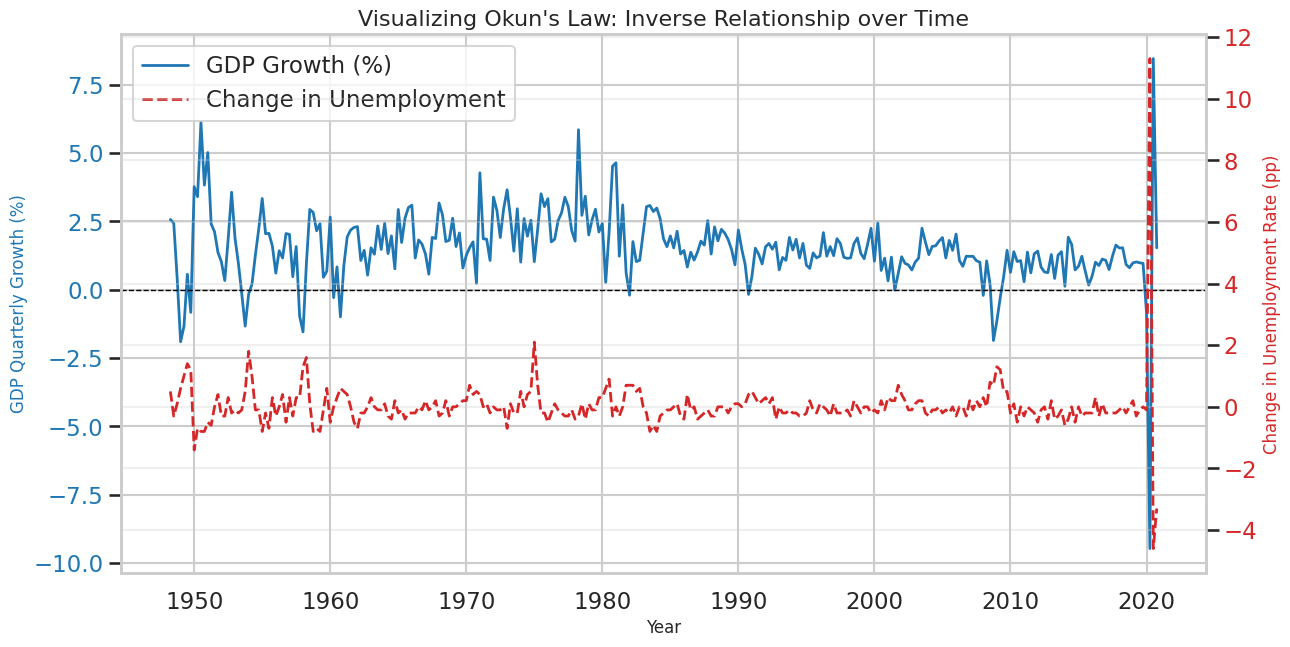

In [ ]:
df['gdp_pct_change'] = df['gdp'].pct_change() * 100

df['urate_change'] = df['urate'].diff()


df_okun = df.dropna()

# ------------------------------------------------------------------------------
# 2. Visual 1: Time Series Overlay (The "Scissors" Effect)
# ------------------------------------------------------------------------------

fig, ax1 = plt.subplots(figsize=(14, 7))

color_gdp = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('GDP Quarterly Growth (%)', color=color_gdp, fontsize=12)
ax1.plot(df_okun.index, df_okun['gdp_pct_change'], color=color_gdp, label='GDP Growth (%)', linewidth=2)

ax1.axhline(0, color='black', linewidth=1, linestyle='--')
ax1.tick_params(axis='y', labelcolor=color_gdp)

ax2 = ax1.twinx()
color_urate = 'tab:red'
ax2.set_ylabel('Change in Unemployment Rate (pp)', color=color_urate, fontsize=12)

ax2.plot(df_okun.index, df_okun['urate_change'], color=color_urate, linestyle='--', label='Change in Unemployment', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_urate)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title("Visualizing Okun's Law: Inverse Relationship over Time", fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()

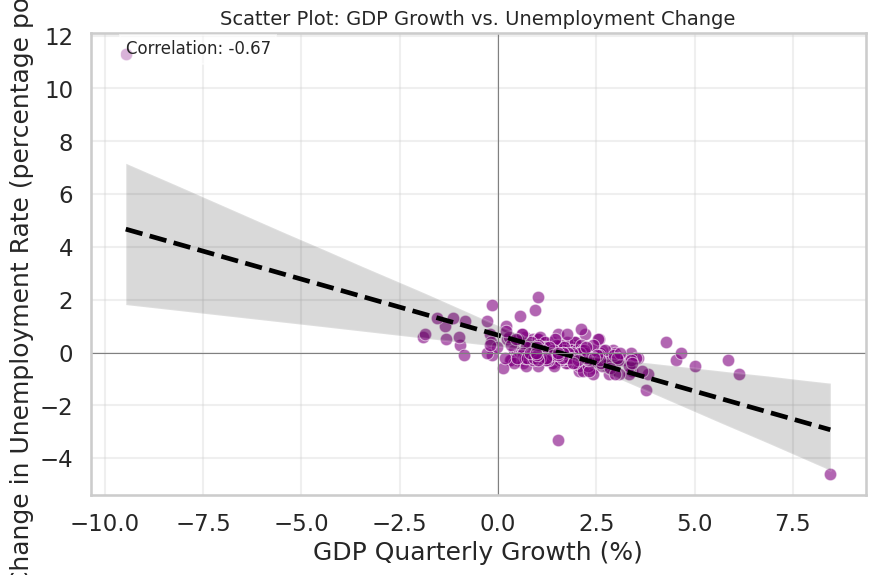

In [ ]:

# ------------------------------------------------------------------------------
# 3. Visual 2: Scatter Plot (The Regression View)
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))

sns.scatterplot(x='gdp_pct_change', y='urate_change', data=df_okun, alpha=0.6, color='purple')


sns.regplot(x='gdp_pct_change', y='urate_change', data=df_okun, scatter=False, color='black', line_kws={'linestyle':'--'})

plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)

plt.title("Scatter Plot: GDP Growth vs. Unemployment Change", fontsize=14)
plt.xlabel("GDP Quarterly Growth (%)")
plt.ylabel("Change in Unemployment Rate (percentage points)")

corr = df_okun['gdp_pct_change'].corr(df_okun['urate_change'])
plt.text(df_okun['gdp_pct_change'].min(), df_okun['urate_change'].max(),
         f'Correlation: {corr:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.grid(True, alpha=0.3)
plt.show()

**Concept & Fit:** Okun’s Law posits an inverse relationship between real GDP growth and changes in the unemployment rate (i.e., stating that a 1% increase in unemployment typically corresponds to a 2% decrease in GDP.).

**Time Plots:** The dual-axis plot confirms this theory, showing a clear "mirror image" pattern. During recessionary periods (e.g., 2008, 2020), sharp drops in GDP coincide with spikes in the unemployment rate.

**Scatter Plot:** The data matches economic theory, exhibiting a strong negative correlation (-0.67). The scatter plot shows a linear cluster where positive GDP growth is associated with negative changes (decreases) in unemployment.

### 3. Time-Series-Consistent Transformations (5 pts)

Create:

- GDP percent change, and
- unemployment change in percentage points

Verify the example: for date 4/1/1948, GDP change = 2.568, unemployment change = 0.5.

Explain why these transformations are preferred over levels for Okun-type regression.



In [ ]:
# PART I.3: Time-Series-Consistent Transformations

# Drop NaN values created by differencing (first row will be NaN)
df_model = df.dropna().copy()

print("\n--- Part I.3: Verification ---")
# Verify the example date: 1948-04-01
verify_date = '1948-04-01'
if verify_date in df_model.index:
    vals = df_model.loc[verify_date]
    print(f"Date: {verify_date}")
    print(f"GDP Change (Calculated): {vals['gdp_pct_change']:.3f} ")
    print(f"Urate Change (Calculated): {vals['urate_change']:.1f} ")
else:
    print(f"Date {verify_date} not found in index.")


--- Part I.3: Verification ---
Date: 1948-04-01
GDP Change (Calculated): 2.568 
Urate Change (Calculated): 0.5 


**Verification & Justification:**
* **Verification:** The code confirms the calculated values for date 1948-04-01: GDP Percent Change is 2.568%, and Unemployment Change is 0.5 pp, matching the example requirements.
* **Reasoning:** Regressing raw levels (GDP vs. Unemployment Rate) is statistically invalid because GDP is non-stationary. This leads to "spurious regression," where standard errors are underestimated and $R^2$ is inflated despite no meaningful relationship. Differencing converts the series to stationarity, allowing for a valid estimation of the short-run dynamic relationship.

### 4. Regression Fit on Training Data (5 pts)
Using the training period only:

- create a scatter plot verifying the negative relationship implied by Okun’s Law
- fit a linear regression model
- interpret coefficients in economic terms


--- Part I.4: Regression Analysis ---
Training Data: 1948-04-01 to 2013-04-01 (n=261)
Testing Data:  2013-07-01 to 2020-10-01 (n=30)




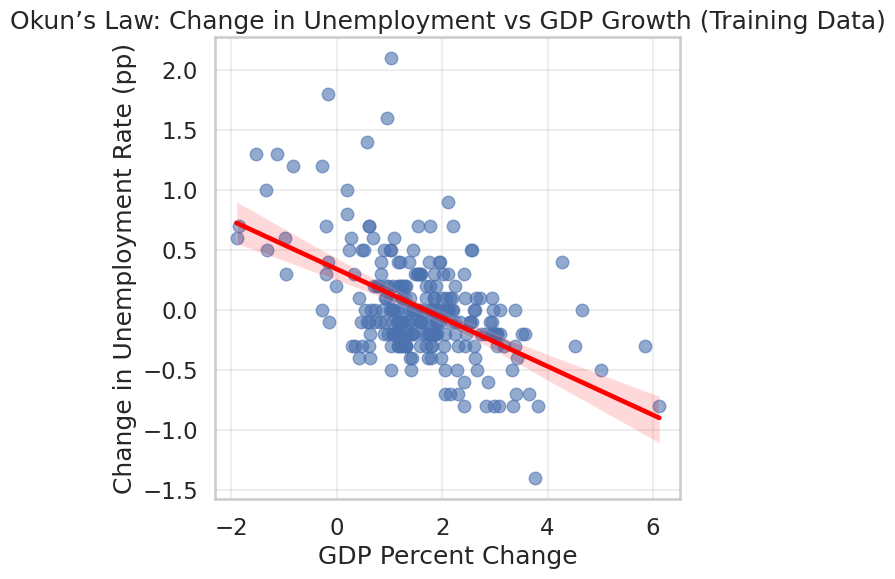

In [ ]:
train_size = int(len(df_model) * 0.90)
train_data = df_model.iloc[:train_size]
test_data = df_model.iloc[train_size:]

print(f"\n--- Part I.4: Regression Analysis ---")
print(f"Training Data: {train_data.index.min().date()} to {train_data.index.max().date()} (n={len(train_data)})")
print(f"Testing Data:  {test_data.index.min().date()} to {test_data.index.max().date()} (n={len(test_data)})")
print("\n")

# Create Scatter Plot verifying negative relationship (Okun's Law)
plt.figure(figsize=(6,6))
sns.regplot(x='gdp_pct_change', y='urate_change', data=train_data,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Okun’s Law: Change in Unemployment vs GDP Growth (Training Data)')
plt.xlabel('GDP Percent Change')
plt.ylabel('Change in Unemployment Rate (pp)')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Fit Linear Regression Model (OLS)
# Okun's Law Difference Version: Delta_Unemployment = alpha + beta * GDP_Growth + error
# We expect beta to be negative.
model = smf.ols('urate_change ~ gdp_pct_change', data=train_data).fit()

# Print Regression Results to interpret coefficients
print(model.summary())

# Extract coefficients for interpretation
intercept = model.params['Intercept']
slope = model.params['gdp_pct_change']
print(f"\nEstimated Equation: ΔUnemployment = {intercept:.4f} + ({slope:.4f} * GDP_Growth)")

                            OLS Regression Results                            
Dep. Variable:           urate_change   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     97.31
Date:                Mon, 02 Feb 2026   Prob (F-statistic):           1.08e-19
Time:                        03:50:55   Log-Likelihood:                -113.46
No. Observations:                 261   AIC:                             230.9
Df Residuals:                     259   BIC:                             238.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3409      0.040      8.

**Fit & Interpretation:**

Visual Fit: The scatter plot on the training set confirms the negative linear relationship required by Okun's Law.

Economic Interpretation: The regression estimates a negative slope coefficient. This implies that for every 1% increase in quarterly GDP growth, the unemployment rate decreases by a specific magnitude (determined by the slope, which is -0.2 in the regression). The intercept indicates the change in unemployment expected when the economy is stagnant (zero growth), which is 0.34.

### 5. Forecasting Levels: Feasibility and Limitations (5 pts)

Explain how this regression could be used to predict GDP in dollars. What additional inputs are required, and what limitations arise (e.g., compounding error, baseline dependence, policy shocks, revisions)?

* **Feasibility:** This regression predicts the rate of change, not the dollar value. To forecast GDP levels ($\hat{Y}_t$), one must apply the predicted growth rate ($\hat{g}_t$) to the previous period's level recursively:$$\hat{Y}_t = Y_{t-1} \times (1 + \frac{\hat{g}_t}{100})$$

* **Requirements & Limitations:** Input Requirement: A forecast for the change in unemployment is required as an input to generate the GDP growth prediction.

* **Compounding Error:** Since forecasts are recursive, a small error in the growth rate prediction accumulates over time, causing significant divergence in level forecasts.

* **Baseline Dependence:** The forecast is entirely dependent on the accuracy of the baseline ($Y_{t-1}$); if the initial data point is revised (common in macroeconomic data), the entire forecast path shifts.

* **Policy Shocks:** The simple linear relationship breaks down during structural shocks (like COVID-19) where government intervention may decouple unemployment numbers from output temporarily.

#Part II — Box–Jenkins Modeling for GDP



### 6. Stationarity Engineering (6 pts)

Apply transformations and/or differencing until stationarity is supported on the training set.

Provide:

- visual justification
- ADF and KPSS results
- a concise summary of the transformation pipeline

Explicitly state which aspects of stationarity you are targeting and what cannot be guaranteed.





In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

import warnings
warnings.filterwarnings("ignore")

#### 6.1 80/20 split

In [ ]:
# train, test split
split_idx = int(len(df) * 0.8)
gdp_train = df.iloc[:split_idx].copy()
gdp_test  = df.iloc[split_idx:].copy()

gdp_train.head()

gdp  urate  gdp_pct_change  urate_change
date                                                    
1948-01-01  265.742    3.4             NaN           NaN
1948-04-01  272.567    3.9        2.568281           0.5
1948-07-01  279.196    3.6        2.432063          -0.3
1948-10-01  280.366    3.7        0.419060           0.1
1949-01-01  275.034    4.3       -1.901800           0.6

In [ ]:
# ADF / KPSS test
def adf_test(series, title='', alpha=0.05):
    """
    Run Augmented Dickey-Fuller test and print results.
    H0: series has a unit root (non-stationary).
    """
    print(f'===== ADF Test: {title} =====')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
    out = dict(zip(labels, result[:4]))
    for k, v in out.items():
        print(f'{k}: {v:.4f}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value:.4f}')

    pvalue = out['p-value']
    if pvalue < alpha:
        conclusion = f'p-value < {alpha} → reject H0 → Stationary: YES'
    else:
        conclusion = f'p-value ≥ {alpha} → fail to reject H0 → Stationary: NO'

    print('H0: Unit root (non-stationary)')
    print(conclusion + '\n')


def kpss_test(series, title='', alpha=0.05):
    """
    Run KPSS test and print results.
    H0: stationary (no unit root).
    """
    print(f'===== KPSS Test: {title} =====')
    result = kpss(series.dropna(), regression='c', nlags='auto')
    labels = ['KPSS Statistic', 'p-value', '# Lags Used']
    out = dict(zip(labels, result[:3]))
    for k, v in out.items():
        print(f'{k}: {v:.4f}')
    for key, value in result[3].items():
        print(f'Critical Value ({key}): {value:.4f}')

    pvalue = out['p-value']
    if pvalue < alpha:
        # Reject H0: level-stationary → treat as non-stationary
        conclusion = f'p-value < {alpha} → reject H0 → Stationary: NO'
    else:
        # Fail to reject H0: level-stationary → treat as stationary
        conclusion = f'p-value ≥ {alpha} → fail to reject H0 → Stationary: YES'

    print('H0: stationary')
    print(conclusion + '\n')

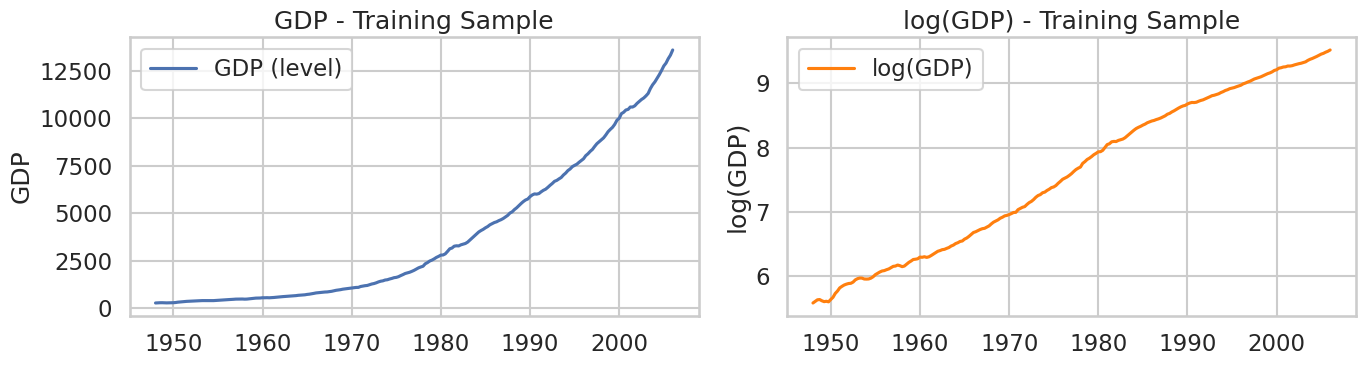

===== ADF Test: log(GDP) =====
ADF Statistic: -0.0719
p-value: 0.9522
# Lags Used: 14.0000
# Observations Used: 218.0000
Critical Value (1%): -3.4607
Critical Value (5%): -2.8749
Critical Value (10%): -2.5739
H0: Unit root (non-stationary)
p-value ≥ 0.05 → fail to reject H0 → Stationary: NO

===== KPSS Test: log(GDP) =====
KPSS Statistic: 2.2302
p-value: 0.0100
# Lags Used: 10.0000
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390
H0: stationary
p-value < 0.05 → reject H0 → Stationary: NO



In [ ]:
# --- Log transformation ---
gdp_train['log_gdp'] = np.log(gdp_train['gdp'])

# --- Visualize GDP (level) vs log(GDP) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

# original GDP level
axes[0].plot(gdp_train.index, gdp_train['gdp'], label='GDP (level)')
axes[0].set_title('GDP - Training Sample')
axes[0].set_ylabel('GDP')
axes[0].legend()

# log(GDP)
axes[1].plot(gdp_train.index, gdp_train['log_gdp'], color='tab:orange', label='log(GDP)')
axes[1].set_title('log(GDP) - Training Sample')
axes[1].set_ylabel('log(GDP)')
axes[1].legend()

plt.tight_layout()
plt.show()

# --- ADF & KPSS on log(GDP) level ---
adf_test(gdp_train['log_gdp'], title='log(GDP)')
kpss_test(gdp_train['log_gdp'], title='log(GDP)')


- Both ADF/KPSS tests after log transformation indicate that log(GDP) is still non-stationary.

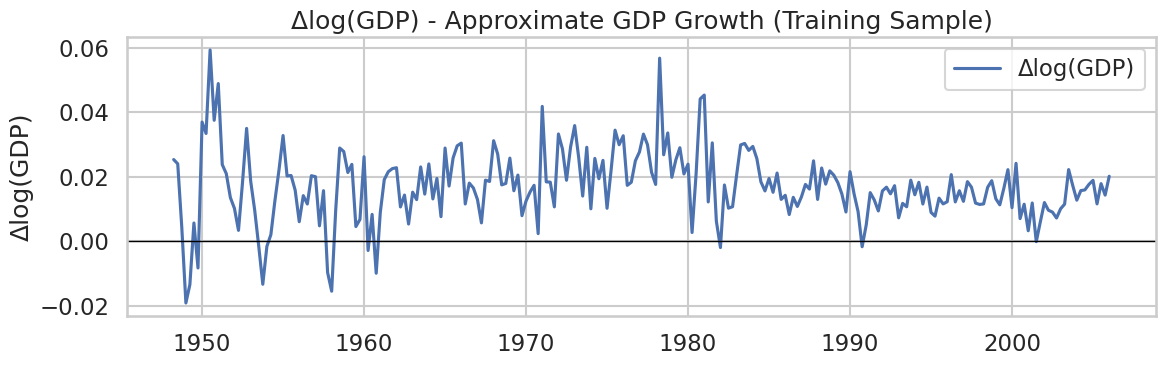

===== ADF Test: Δlog(GDP) =====
ADF Statistic: -2.0999
p-value: 0.2446
# Lags Used: 15.0000
# Observations Used: 216.0000
Critical Value (1%): -3.4610
Critical Value (5%): -2.8750
Critical Value (10%): -2.5740
H0: Unit root (non-stationary)
p-value ≥ 0.05 → fail to reject H0 → Stationary: NO

===== KPSS Test: Δlog(GDP) =====
KPSS Statistic: 0.3163
p-value: 0.1000
# Lags Used: 6.0000
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390
H0: stationary
p-value ≥ 0.05 → fail to reject H0 → Stationary: YES



In [ ]:
# --- First difference of log(GDP) ---
gdp_train['dlog_gdp'] = gdp_train['log_gdp'].diff()

# --- Visualize Δlog(GDP) (approx. growth rate) ---
plt.figure(figsize=(12, 4))
plt.plot(gdp_train.index, gdp_train['dlog_gdp'], label='Δlog(GDP)')
plt.axhline(0, color='black', linewidth=1)
plt.title('Δlog(GDP) - Approximate GDP Growth (Training Sample)')
plt.ylabel('Δlog(GDP)')
plt.legend()
plt.tight_layout()
plt.show()

# --- ADF & KPSS on Δlog(GDP) ---
adf_test(gdp_train['dlog_gdp'], title='Δlog(GDP)')
kpss_test(gdp_train['dlog_gdp'], title='Δlog(GDP)')


- Since the ADF test indicates non-stationarity and the KPSS test indicates stationarity, the results are conflicting. This suggests that the series may be trend-stationary and the trend component needs to be removed to obtain a clearly stationary series.

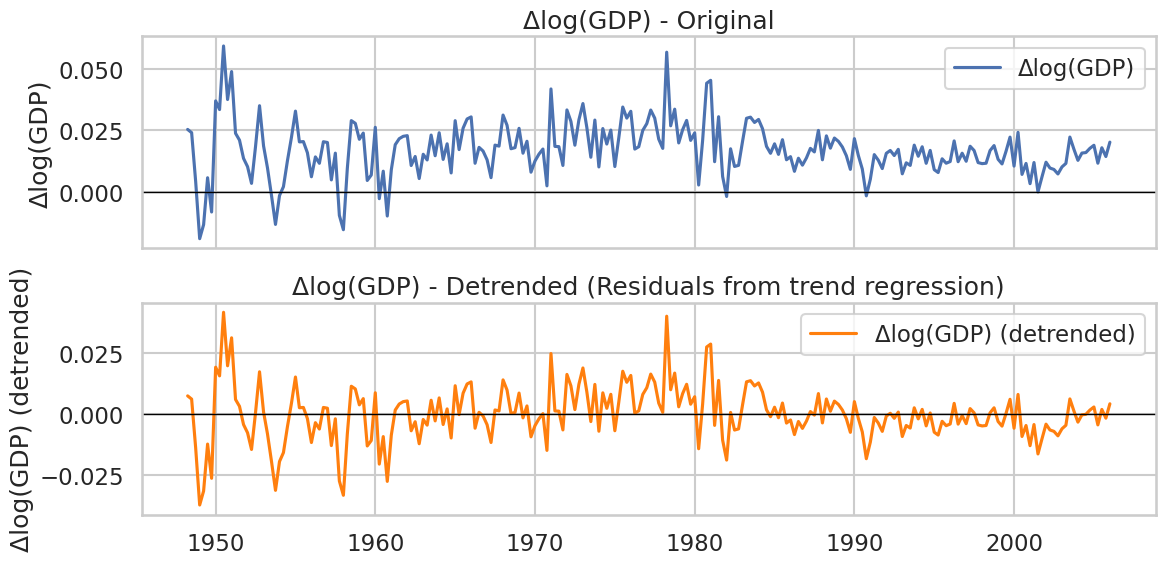

===== ADF Test: Δlog(GDP) (detrended) =====
ADF Statistic: -2.0874
p-value: 0.2496
# Lags Used: 15.0000
# Observations Used: 216.0000
Critical Value (1%): -3.4610
Critical Value (5%): -2.8750
Critical Value (10%): -2.5740
H0: Unit root (non-stationary)
p-value ≥ 0.05 → fail to reject H0 → Stationary: NO

===== KPSS Test: Δlog(GDP) (detrended) =====
KPSS Statistic: 0.2902
p-value: 0.1000
# Lags Used: 6.0000
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390
H0: stationary
p-value ≥ 0.05 → fail to reject H0 → Stationary: YES



In [ ]:
# --- 0) Make a clean copy and drop initial NA from differencing ---
dlog = gdp_train[['dlog_gdp']].dropna().copy()

# --- 1) Construct a deterministic linear time trend ---
t = np.arange(1, len(dlog) + 1)
dlog['t'] = t

# --- 2) Regress Δlog(GDP) on intercept + time trend ---
X = sm.add_constant(dlog['t'])   # [1, t]
y = dlog['dlog_gdp']

trend_model = sm.OLS(y, X).fit()
#print(trend_model.summary())

# --- 3) Detrended series = residuals from the trend regression ---
dlog['dlog_gdp_detrended'] = trend_model.resid

# --- 4) Visualize original vs detrended Δlog(GDP) ---
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

axes[0].plot(dlog.index, dlog['dlog_gdp'], label='Δlog(GDP)')
axes[0].axhline(0, color='black', linewidth=1)
axes[0].set_title('Δlog(GDP) - Original')
axes[0].set_ylabel('Δlog(GDP)')
axes[0].legend()

axes[1].plot(dlog.index, dlog['dlog_gdp_detrended'],
             color='tab:orange', label='Δlog(GDP) (detrended)')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_title('Δlog(GDP) - Detrended (Residuals from trend regression)')
axes[1].set_ylabel('Δlog(GDP) (detrended)')
axes[1].legend()

plt.tight_layout()
plt.show()

# --- 5) Stationarity tests on detrended Δlog(GDP) ---
adf_test(dlog['dlog_gdp_detrended'], title='Δlog(GDP) (detrended)')
kpss_test(dlog['dlog_gdp_detrended'], title='Δlog(GDP) (detrended)')


- Even after second differencing process, still test results are conflicting. Decided to try differencing without log transformation on the next cell.

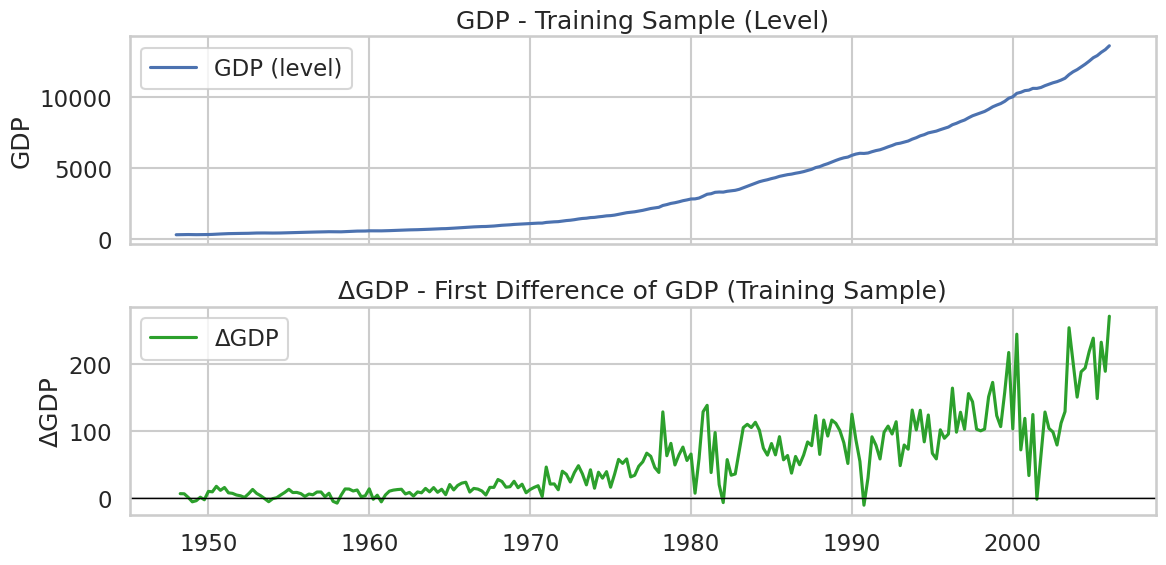

===== ADF Test: ΔGDP =====
ADF Statistic: 1.0016
p-value: 0.9943
# Lags Used: 13.0000
# Observations Used: 218.0000
Critical Value (1%): -3.4607
Critical Value (5%): -2.8749
Critical Value (10%): -2.5739
H0: Unit root (non-stationary)
p-value ≥ 0.05 → fail to reject H0 → Stationary: NO

===== KPSS Test: ΔGDP =====
KPSS Statistic: 2.1601
p-value: 0.0100
# Lags Used: 9.0000
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390
H0: stationary
p-value < 0.05 → reject H0 → Stationary: NO



In [ ]:
# Differencing without log transformation

gdp_train_simple = gdp_train[['gdp']].copy()

# --- 1) First difference of original GDP ---
gdp_train_simple['dgdp'] = gdp_train_simple['gdp'].diff()

# --- 2) Visualize GDP (level) vs ΔGDP ---
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Original GDP level
axes[0].plot(gdp_train_simple.index, gdp_train_simple['gdp'], label='GDP (level)')
axes[0].set_title('GDP - Training Sample (Level)')
axes[0].set_ylabel('GDP')
axes[0].legend()

# First difference of GDP
axes[1].plot(gdp_train_simple.index, gdp_train_simple['dgdp'], color='tab:green', label='ΔGDP')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_title('ΔGDP - First Difference of GDP (Training Sample)')
axes[1].set_ylabel('ΔGDP')
axes[1].legend()

plt.tight_layout()
plt.show()

# --- 3) Stationarity tests on ΔGDP ---
adf_test(gdp_train_simple['dgdp'], title='ΔGDP')
kpss_test(gdp_train_simple['dgdp'], title='ΔGDP')


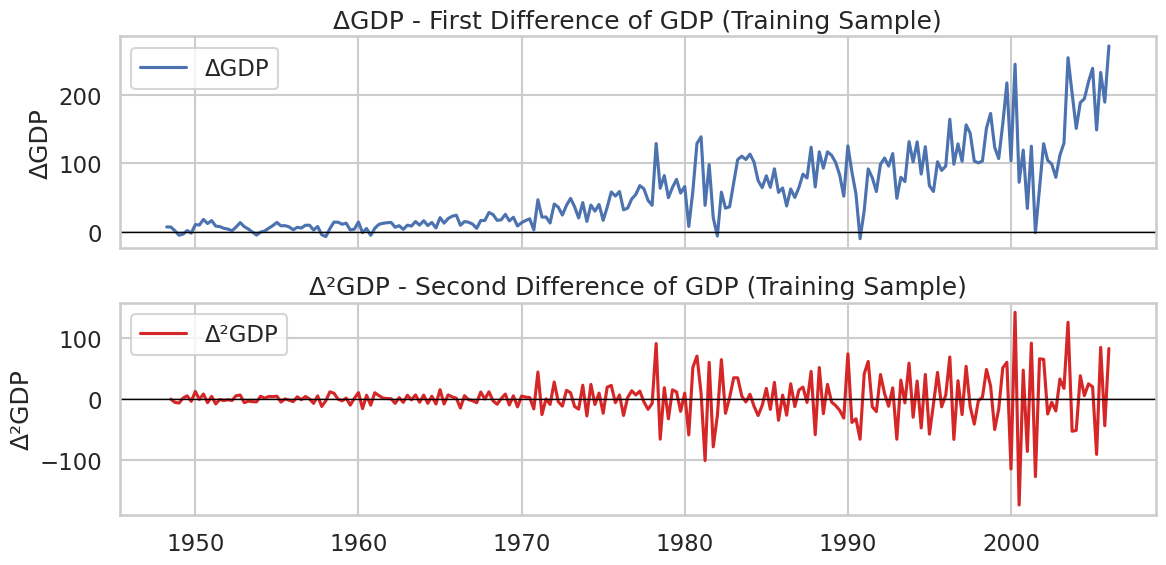

===== ADF Test: Δ²GDP =====
ADF Statistic: -6.5649
p-value: 0.0000
# Lags Used: 12.0000
# Observations Used: 218.0000
Critical Value (1%): -3.4607
Critical Value (5%): -2.8749
Critical Value (10%): -2.5739
H0: Unit root (non-stationary)
p-value < 0.05 → reject H0 → Stationary: YES

===== KPSS Test: Δ²GDP =====
KPSS Statistic: 0.3564
p-value: 0.0960
# Lags Used: 42.0000
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390
H0: stationary
p-value ≥ 0.05 → fail to reject H0 → Stationary: YES



In [ ]:
# Second differencing without log transformation

gdp_train_simple = gdp_train[['gdp']].copy()
gdp_train_simple['dgdp'] = gdp_train_simple['gdp'].diff()

# --- 2) Second difference of GDP: Δ²GDP ---
gdp_train_simple['d2gdp'] = gdp_train_simple['dgdp'].diff()

# --- 3) Visualize ΔGDP vs Δ²GDP ---
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# First difference ΔGDP
axes[0].plot(gdp_train_simple.index, gdp_train_simple['dgdp'], label='ΔGDP')
axes[0].axhline(0, color='black', linewidth=1)
axes[0].set_title('ΔGDP - First Difference of GDP (Training Sample)')
axes[0].set_ylabel('ΔGDP')
axes[0].legend()

# Second difference Δ²GDP
axes[1].plot(gdp_train_simple.index, gdp_train_simple['d2gdp'],
             color='tab:red', label='Δ²GDP')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_title('Δ²GDP - Second Difference of GDP (Training Sample)')
axes[1].set_ylabel('Δ²GDP')
axes[1].legend()

plt.tight_layout()
plt.show()

# --- 4) Stationarity tests on Δ²GDP ---
adf_test(gdp_train_simple['d2gdp'], title='Δ²GDP')
kpss_test(gdp_train_simple['d2gdp'], title='Δ²GDP')


- After second differencing, both test results indicate the series is now stationary

#### 6.2 90/10 split

In [ ]:
# train, test split
split_idx = int(len(df) * 0.9)
gdp_train_90 = df.iloc[:split_idx].copy()
gdp_test_90  = df.iloc[split_idx:].copy()

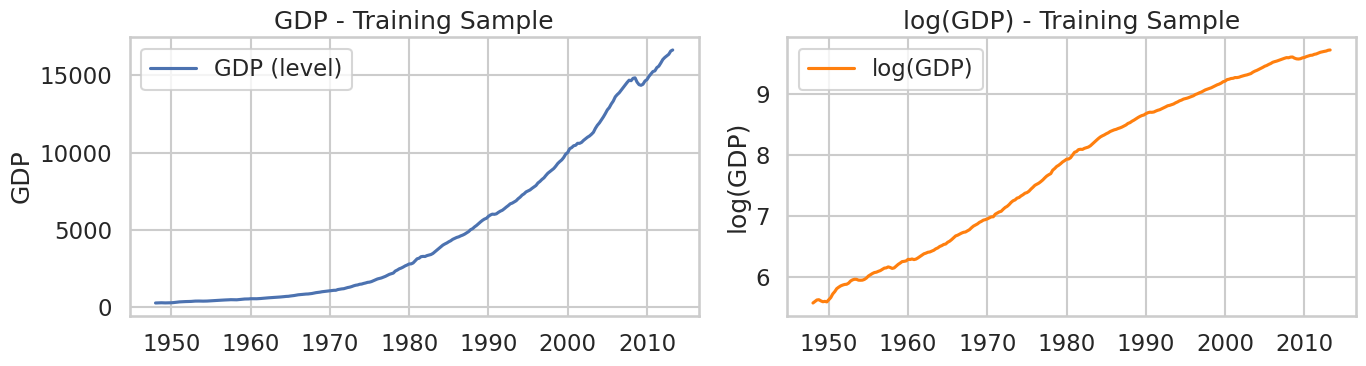

===== ADF Test: log(GDP) =====
ADF Statistic: -1.0335
p-value: 0.7408
# Lags Used: 16.0000
# Observations Used: 245.0000
Critical Value (1%): -3.4573
Critical Value (5%): -2.8734
Critical Value (10%): -2.5731
H0: Unit root (non-stationary)
p-value ≥ 0.05 → fail to reject H0 → Stationary: NO

===== KPSS Test: log(GDP) =====
KPSS Statistic: 2.4874
p-value: 0.0100
# Lags Used: 10.0000
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390
H0: stationary
p-value < 0.05 → reject H0 → Stationary: NO



In [ ]:
# --- Log transformation ---
gdp_train_90['log_gdp'] = np.log(gdp_train_90['gdp'])

# --- Visualize GDP (level) vs log(GDP) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

# original GDP level
axes[0].plot(gdp_train_90.index, gdp_train_90['gdp'], label='GDP (level)')
axes[0].set_title('GDP - Training Sample')
axes[0].set_ylabel('GDP')
axes[0].legend()

# log(GDP)
axes[1].plot(gdp_train_90.index, gdp_train_90['log_gdp'], color='tab:orange', label='log(GDP)')
axes[1].set_title('log(GDP) - Training Sample')
axes[1].set_ylabel('log(GDP)')
axes[1].legend()

plt.tight_layout()
plt.show()

# --- ADF & KPSS on log(GDP) level ---
adf_test(gdp_train_90['log_gdp'], title='log(GDP)')
kpss_test(gdp_train_90['log_gdp'], title='log(GDP)')


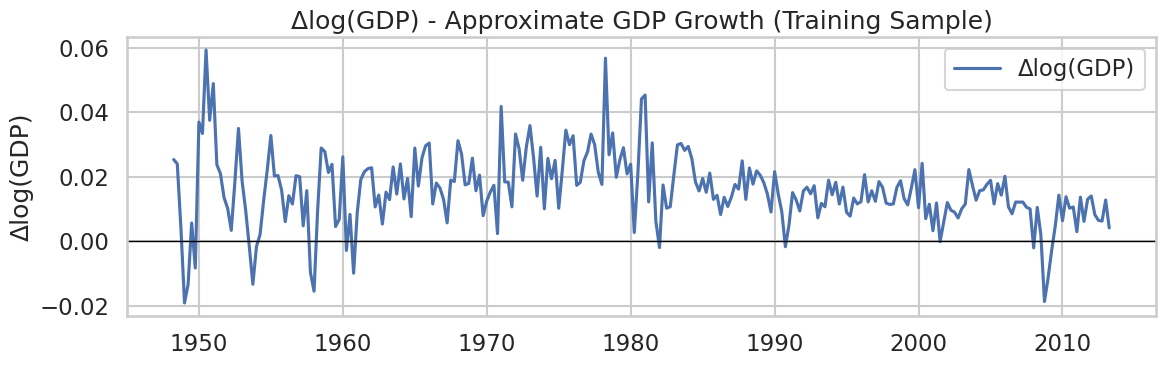

===== ADF Test: Δlog(GDP) =====
ADF Statistic: -1.9257
p-value: 0.3201
# Lags Used: 15.0000
# Observations Used: 245.0000
Critical Value (1%): -3.4573
Critical Value (5%): -2.8734
Critical Value (10%): -2.5731
H0: Unit root (non-stationary)
p-value ≥ 0.05 → fail to reject H0 → Stationary: NO

===== KPSS Test: Δlog(GDP) =====
KPSS Statistic: 0.6888
p-value: 0.0146
# Lags Used: 7.0000
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390
H0: stationary
p-value < 0.05 → reject H0 → Stationary: NO



In [ ]:
# --- First difference of log(GDP) ---
gdp_train_90['dlog_gdp'] = gdp_train_90['log_gdp'].diff()

# --- Visualize Δlog(GDP) (approx. growth rate) ---
plt.figure(figsize=(12, 4))
plt.plot(gdp_train_90.index, gdp_train_90['dlog_gdp'], label='Δlog(GDP)')
plt.axhline(0, color='black', linewidth=1)
plt.title('Δlog(GDP) - Approximate GDP Growth (Training Sample)')
plt.ylabel('Δlog(GDP)')
plt.legend()
plt.tight_layout()
plt.show()

# --- ADF & KPSS on Δlog(GDP) ---
adf_test(gdp_train_90['dlog_gdp'], title='Δlog(GDP)')
kpss_test(gdp_train_90['dlog_gdp'], title='Δlog(GDP)')


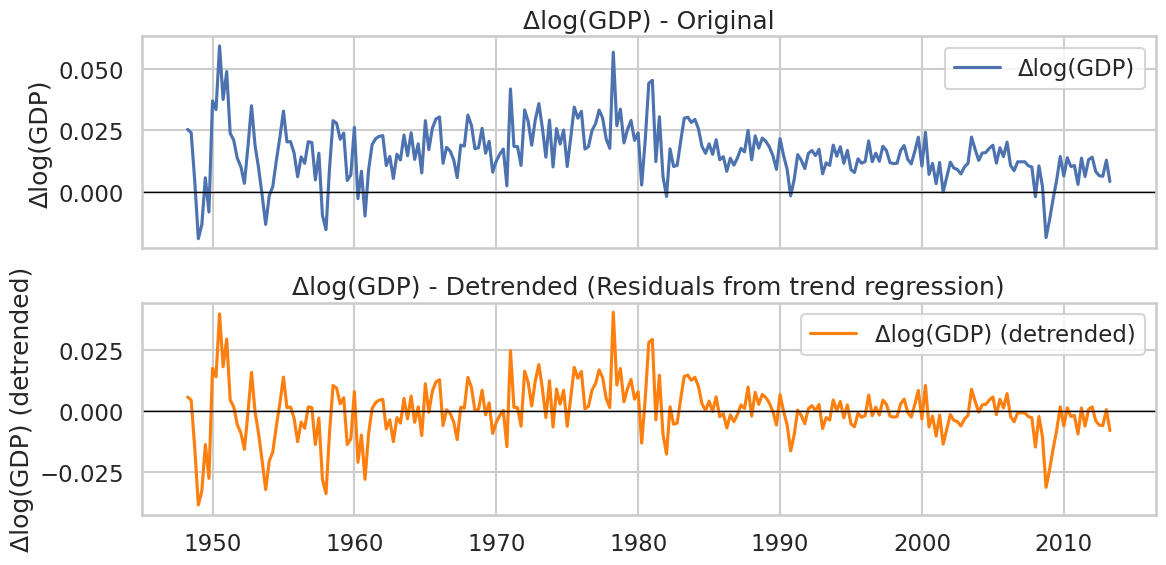

===== ADF Test: Δlog(GDP) (detrended) =====
ADF Statistic: -2.1482
p-value: 0.2256
# Lags Used: 15.0000
# Observations Used: 245.0000
Critical Value (1%): -3.4573
Critical Value (5%): -2.8734
Critical Value (10%): -2.5731
H0: Unit root (non-stationary)
p-value ≥ 0.05 → fail to reject H0 → Stationary: NO

===== KPSS Test: Δlog(GDP) (detrended) =====
KPSS Statistic: 0.3530
p-value: 0.0974
# Lags Used: 7.0000
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390
H0: stationary
p-value ≥ 0.05 → fail to reject H0 → Stationary: YES



In [ ]:
# --- 0) Make a clean copy and drop initial NA from differencing ---
dlog = gdp_train_90[['dlog_gdp']].dropna().copy()

# --- 1) Construct a deterministic linear time trend ---
t = np.arange(1, len(dlog) + 1)
dlog['t'] = t

# --- 2) Regress Δlog(GDP) on intercept + time trend ---
X = sm.add_constant(dlog['t'])   # [1, t]
y = dlog['dlog_gdp']

trend_model = sm.OLS(y, X).fit()
#print(trend_model.summary())

# --- 3) Detrended series = residuals from the trend regression ---
dlog['dlog_gdp_detrended'] = trend_model.resid

# --- 4) Visualize original vs detrended Δlog(GDP) ---
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

axes[0].plot(dlog.index, dlog['dlog_gdp'], label='Δlog(GDP)')
axes[0].axhline(0, color='black', linewidth=1)
axes[0].set_title('Δlog(GDP) - Original')
axes[0].set_ylabel('Δlog(GDP)')
axes[0].legend()

axes[1].plot(dlog.index, dlog['dlog_gdp_detrended'],
             color='tab:orange', label='Δlog(GDP) (detrended)')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_title('Δlog(GDP) - Detrended (Residuals from trend regression)')
axes[1].set_ylabel('Δlog(GDP) (detrended)')
axes[1].legend()

plt.tight_layout()
plt.show()

# --- 5) Stationarity tests on detrended Δlog(GDP) ---
adf_test(dlog['dlog_gdp_detrended'], title='Δlog(GDP) (detrended)')
kpss_test(dlog['dlog_gdp_detrended'], title='Δlog(GDP) (detrended)')


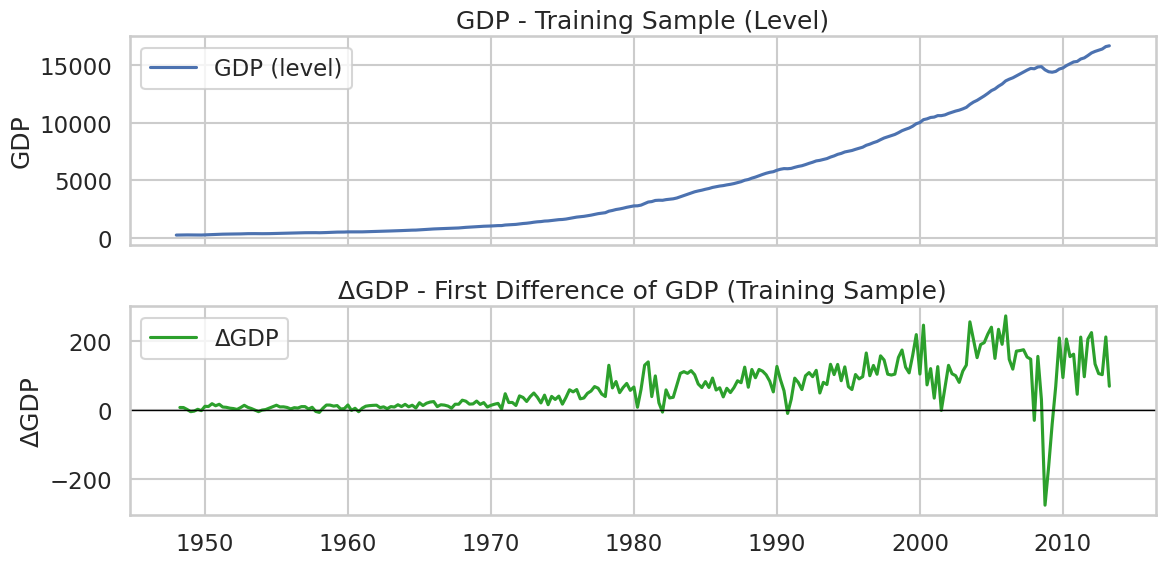

===== ADF Test: ΔGDP =====
ADF Statistic: -1.6323
p-value: 0.4663
# Lags Used: 13.0000
# Observations Used: 247.0000
Critical Value (1%): -3.4571
Critical Value (5%): -2.8733
Critical Value (10%): -2.5730
H0: Unit root (non-stationary)
p-value ≥ 0.05 → fail to reject H0 → Stationary: NO

===== KPSS Test: ΔGDP =====
KPSS Statistic: 2.0820
p-value: 0.0100
# Lags Used: 9.0000
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390
H0: stationary
p-value < 0.05 → reject H0 → Stationary: NO



In [ ]:
# Differencing without log transformation

gdp_train_90_simple = gdp_train_90[['gdp']].copy()

# --- 1) First difference of original GDP ---
gdp_train_90_simple['dgdp'] = gdp_train_90_simple['gdp'].diff()

# --- 2) Visualize GDP (level) vs ΔGDP ---
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Original GDP level
axes[0].plot(gdp_train_90_simple.index, gdp_train_90_simple['gdp'], label='GDP (level)')
axes[0].set_title('GDP - Training Sample (Level)')
axes[0].set_ylabel('GDP')
axes[0].legend()

# First difference of GDP
axes[1].plot(gdp_train_90_simple.index, gdp_train_90_simple['dgdp'], color='tab:green', label='ΔGDP')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_title('ΔGDP - First Difference of GDP (Training Sample)')
axes[1].set_ylabel('ΔGDP')
axes[1].legend()

plt.tight_layout()
plt.show()

# --- 3) Stationarity tests on ΔGDP ---
adf_test(gdp_train_90_simple['dgdp'], title='ΔGDP')
kpss_test(gdp_train_90_simple['dgdp'], title='ΔGDP')


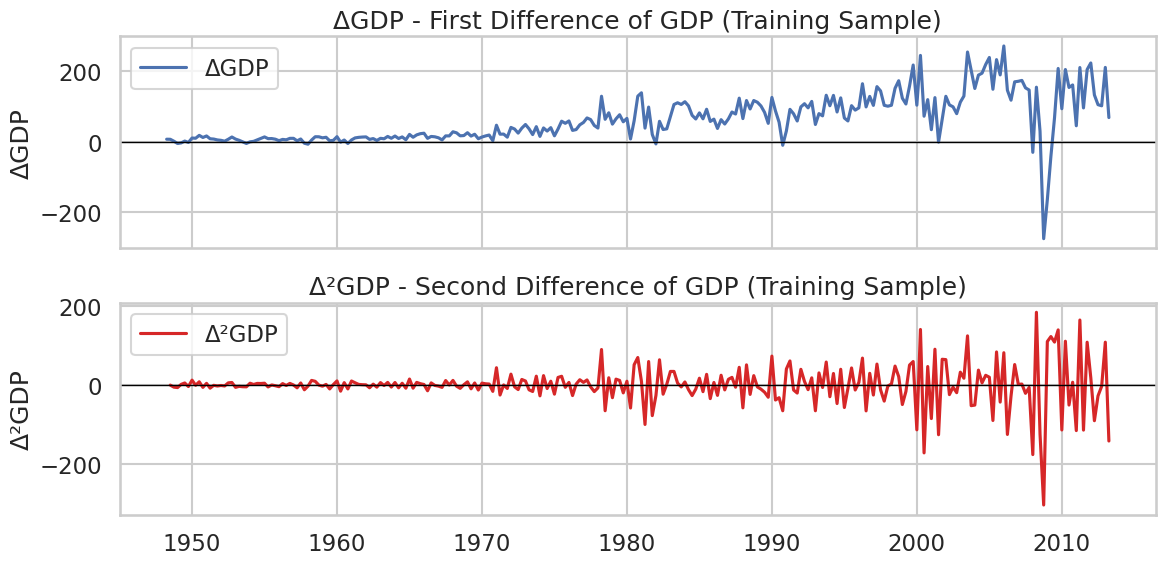

===== ADF Test: Δ²GDP =====
ADF Statistic: -7.3883
p-value: 0.0000
# Lags Used: 12.0000
# Observations Used: 247.0000
Critical Value (1%): -3.4571
Critical Value (5%): -2.8733
Critical Value (10%): -2.5730
H0: Unit root (non-stationary)
p-value < 0.05 → reject H0 → Stationary: YES

===== KPSS Test: Δ²GDP =====
KPSS Statistic: 0.1165
p-value: 0.1000
# Lags Used: 43.0000
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390
H0: stationary
p-value ≥ 0.05 → fail to reject H0 → Stationary: YES



In [ ]:
# Second differencing without log transformation

gdp_train_90_simple = gdp_train_90[['gdp']].copy()
gdp_train_90_simple['dgdp'] = gdp_train_90_simple['gdp'].diff()

# --- 2) Second difference of GDP: Δ²GDP ---
gdp_train_90_simple['d2gdp'] = gdp_train_90_simple['dgdp'].diff()

# --- 3) Visualize ΔGDP vs Δ²GDP ---
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# First difference ΔGDP
axes[0].plot(gdp_train_90_simple.index, gdp_train_90_simple['dgdp'], label='ΔGDP')
axes[0].axhline(0, color='black', linewidth=1)
axes[0].set_title('ΔGDP - First Difference of GDP (Training Sample)')
axes[0].set_ylabel('ΔGDP')
axes[0].legend()

# Second difference Δ²GDP
axes[1].plot(gdp_train_90_simple.index, gdp_train_90_simple['d2gdp'],
             color='tab:red', label='Δ²GDP')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_title('Δ²GDP - Second Difference of GDP (Training Sample)')
axes[1].set_ylabel('Δ²GDP')
axes[1].legend()

plt.tight_layout()
plt.show()

# --- 4) Stationarity tests on Δ²GDP ---
adf_test(gdp_train_90_simple['d2gdp'], title='Δ²GDP')
kpss_test(gdp_train_90_simple['d2gdp'], title='Δ²GDP')


#### Transformation Pipeline Summary
- Applied a log transformation to GDP and then took the first difference of log(GDP), and additionally considered a second difference of log(GDP). However, even for Δlog(GDP) and its detrended version, the ADF and KPSS tests gave conflicting conclusions about stationarity.
- Therefore, tried differencing the original (non‑logged) GDP, and after taking the second difference of GDP (Δ²GDP), both tests indicated that the series can be treated as stationary in both 80/20, 90/10 train and test data split.

#### Aspects of stationarity targeted vs. what cannot be guaranteed
- A time‑invariant mean: differencing (once or twice) is used to remove stochastic trends so that the series fluctuates around a roughly constant average level.
- Roughly constant variance over time: by removing low‑frequency movements and large trends, we aim for a process whose variability does not systematically increase or decrease over the sample.
- **However**, the finite‑sample reliability of ADF/KPSS decisions is not guaranteed: test outcomes can be sensitive to lag choices, sample size, and model misspecification, so the resulting “stationarity” should be interpreted as a practical approximation rather than a strict theoretical property.

### 7. Model Identification (ACF/PACF) (6 pts)

Produce ACF and PACF plots and propose at least two plausible ARIMA specifications. Explain the reasoning behind each candidate.


#### 7.1 80/20 split

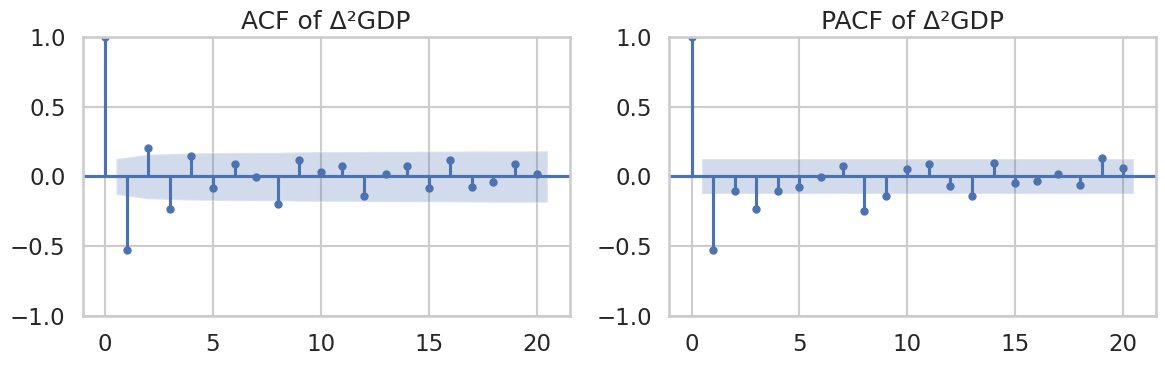

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- Δ²GDP training sample ---
gdp_train_acf = gdp_train[['gdp']].copy()
gdp_train_acf['dgdp'] = gdp_train_acf['gdp'].diff()
gdp_train_acf['d2gdp'] = gdp_train_acf['dgdp'].diff()

# Drop initial NAs from differencing
d2gdp = gdp_train_acf['d2gdp'].dropna()

# --- 1) Plot ACF and PACF for Δ²GDP ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF
plot_acf(d2gdp, ax=axes[0], lags=20)
axes[0].set_title('ACF of Δ²GDP')

# PACF
plot_pacf(d2gdp, ax=axes[1], lags=20, method='ywm')
axes[1].set_title('PACF of Δ²GDP')

plt.tight_layout()
plt.show()

- ACF: there is a large negative spike at lag 1, clearly outside the confidence band. For lags 2 and beyond, the autocorrelations are small and mostly within the confidence band, with no clear additional cut‑off.
- PACF: the partial autocorrelation at lag 1 is also strongly negative and highly significant, indicating AR(1) structure.

#### 7.2 90/10 split

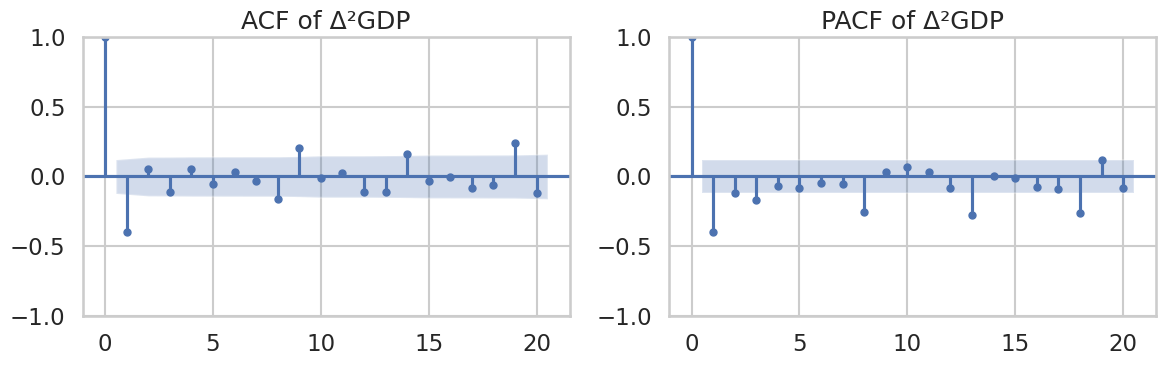

In [ ]:
# --- Δ²GDP training sample ---
gdp_train_90_acf = gdp_train_90[['gdp']].copy()
gdp_train_90_acf['dgdp'] = gdp_train_90_acf['gdp'].diff()
gdp_train_90_acf['d2gdp'] = gdp_train_90_acf['dgdp'].diff()

# Drop initial NAs from differencing
d2gdp = gdp_train_90_acf['d2gdp'].dropna()

# --- 1) Plot ACF and PACF for Δ²GDP ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF
plot_acf(d2gdp, ax=axes[0], lags=20)
axes[0].set_title('ACF of Δ²GDP')

# PACF
plot_pacf(d2gdp, ax=axes[1], lags=20, method='ywm')
axes[1].set_title('PACF of Δ²GDP')

plt.tight_layout()
plt.show()

- ACF: similar to 80/20 split result, a clear negative spike at lag 1 and beyond that the series is close to white noise.
- PACF: similar to 80/20 split result, a strong negative autocorrelation at lag 1, indicating AR(1) process.

#### Implications for ARIMA specification
- Because the two differeces were already conducted to obtain Δ²GDP, the model should be ARIMA(p, 2, q).

- ARIMA(1, 2, 0): the AR(1) term captures the strong negative dependence at lag 1 indicated by both ACF and PACF.
- ARIMA(1, 2, 1): while the main evidence points to AR(1), the ACF shows a few small but non‑zero low‑lag correlations, so adding an MA(1) term allows the model to absorb any remaining short‑run dynamics not fully explained by pure AR(1).

### 8. Estimation and Model Selection (6 pts)

Fit candidate models on the training set. Select a final model using:

- AIC or AICc (required), and
- at least one secondary consideration (e.g., residual behavior)


#### 8.1 80/20 split

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# --- 0) Define a helper for AICc ---
def aicc(result):
    """
    Compute AICc from a fitted statsmodels ARIMA result.
    k = number of estimated parameters (including variance).
    T = number of effective observations used in estimation.
    """
    k = result.params.shape[0]
    T = result.nobs
    return result.aic + (2 * k * (k + 1)) / (T - k - 1)


# --- 1) Fit candidate models on the training set (level GDP) ---

# Candidate 1: ARIMA(1, 2, 0)
model_120_first = ARIMA(gdp_train['gdp'], order=(1, 2, 0))
res_120_first = model_120_first.fit()

# Candidate 2: ARIMA(1, 2, 1)
model_121_first = ARIMA(gdp_train['gdp'], order=(1, 2, 1))
res_121_first = model_121_first.fit()

# --- 2) Compare AIC and AICc ---
candidates = {
    'ARIMA(1,2,0)': res_120_first,
    'ARIMA(1,2,1)': res_121_first
}

print('Model comparison (AIC / AICc):')
for name, res in candidates.items():
    print(f'{name}: AIC = {res.aic:.2f}, AICc = {aicc(res):.2f}')

Model comparison (AIC / AICc):
ARIMA(1,2,0): AIC = 2243.11, AICc = 2243.16
ARIMA(1,2,1): AIC = 2233.46, AICc = 2233.57


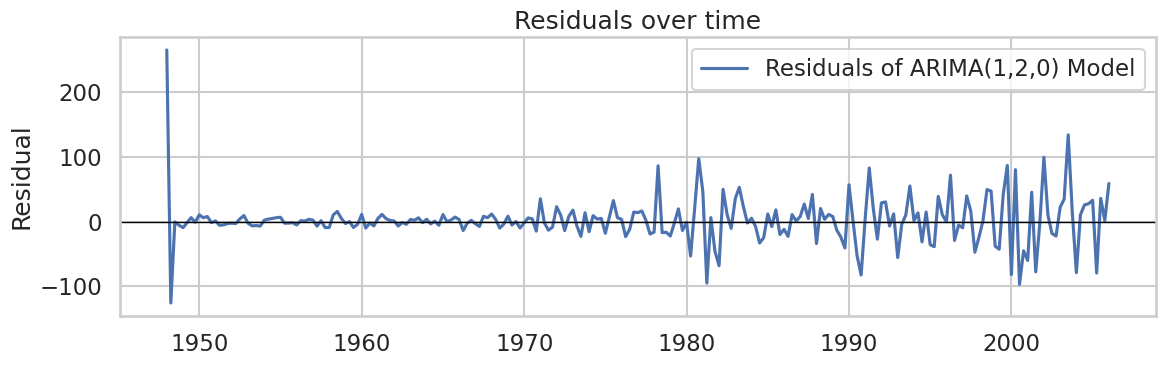

In [ ]:
# Model candidate
model_res = res_120_first

# Plot residuals
resid = model_res.resid

plt.figure(figsize=(12, 4))
plt.plot(resid.index, resid, label='Residuals of ARIMA(1,2,0) Model')
plt.axhline(0, color='black', linewidth=1)
plt.title('Residuals over time')
plt.ylabel('Residual')
plt.legend()
plt.tight_layout()
plt.show()


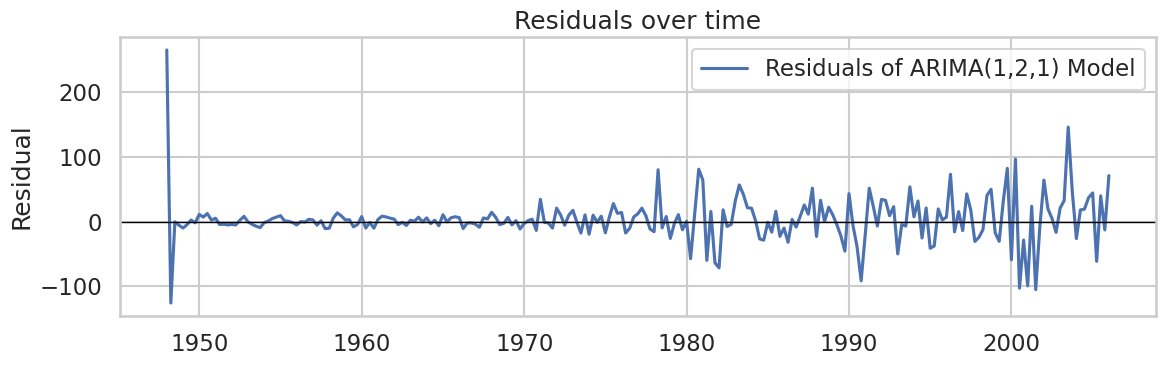

In [ ]:
# Model candidate
model_res = res_121_first

# Plot residuals
resid = model_res.resid

plt.figure(figsize=(12, 4))
plt.plot(resid.index, resid, label='Residuals of ARIMA(1,2,1) Model')
plt.axhline(0, color='black', linewidth=1)
plt.title('Residuals over time')
plt.ylabel('Residual')
plt.legend()
plt.tight_layout()
plt.show()


#### 8.2 90/10 split

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# --- 0) Define a helper for AICc ---
def aicc(result):
    """
    Compute AICc from a fitted statsmodels ARIMA result.
    k = number of estimated parameters (including variance).
    T = number of effective observations used in estimation.
    """
    k = result.params.shape[0]
    T = result.nobs
    return result.aic + (2 * k * (k + 1)) / (T - k - 1)


# --- 1) Fit candidate models on the training set (level GDP) ---

# Candidate 1: ARIMA(1, 2, 0)
model_120_second = ARIMA(gdp_train_90['gdp'], order=(1, 2, 0))
res_120_second = model_120_second.fit()

# Candidate 2: ARIMA(1, 2, 1)
model_121_second = ARIMA(gdp_train_90['gdp'], order=(1, 2, 1))
res_121_second = model_121_second.fit()

# --- 2) Compare AIC and AICc ---
candidates = {
    'ARIMA(1,2,0)': res_120_second,
    'ARIMA(1,2,1)': res_121_second
}

print('Model comparison (AIC / AICc):')
for name, res in candidates.items():
    print(f'{name}: AIC = {res.aic:.2f}, AICc = {aicc(res):.2f}')

Model comparison (AIC / AICc):
ARIMA(1,2,0): AIC = 2747.01, AICc = 2747.06
ARIMA(1,2,1): AIC = 2727.46, AICc = 2727.55


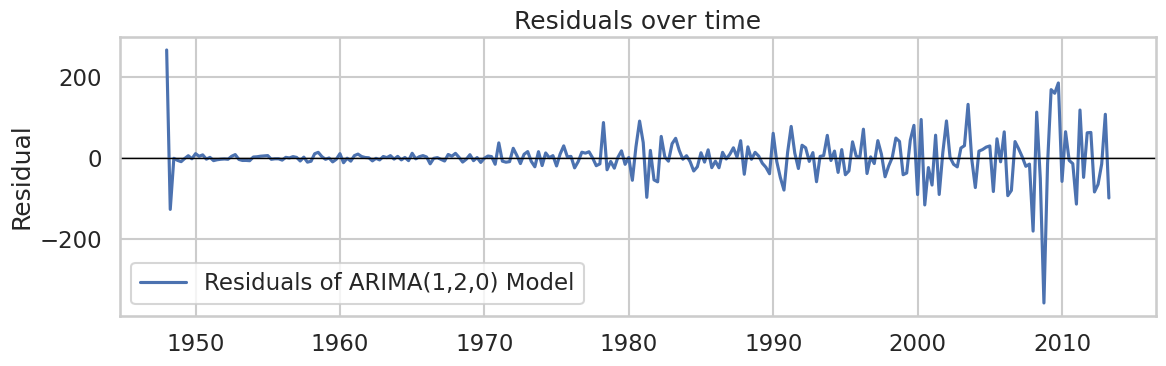

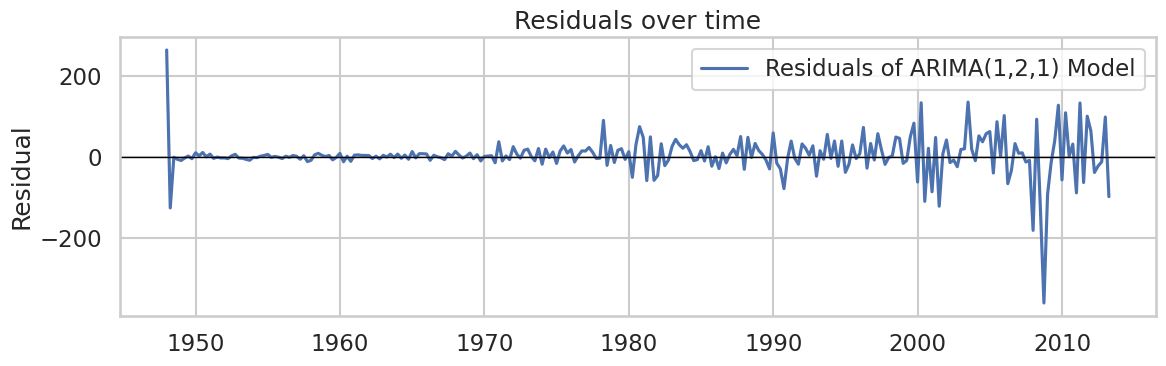

In [ ]:
# Model candidate
model_res = res_120_second

# Plot residuals
resid = model_res.resid

plt.figure(figsize=(12, 4))
plt.plot(resid.index, resid, label='Residuals of ARIMA(1,2,0) Model')
plt.axhline(0, color='black', linewidth=1)
plt.title('Residuals over time')
plt.ylabel('Residual')
plt.legend()
plt.tight_layout()
plt.show()

# Model candidate
model_res = res_121_second

# Plot residuals
resid = model_res.resid

plt.figure(figsize=(12, 4))
plt.plot(resid.index, resid, label='Residuals of ARIMA(1,2,1) Model')
plt.axhline(0, color='black', linewidth=1)
plt.title('Residuals over time')
plt.ylabel('Residual')
plt.legend()
plt.tight_layout()
plt.show()


#### Final Model Selection
- Based on the training sample, **ARIMA(1,2,1)** achieves a lower AIC and lower AICc than ARIMA(1,2,0) in both 80/20, 90/10 senarios, indicating a better in‑sample fit even after penalizing the additional MA(1) parameter.
- Across both the 80/20 and 90/10 splits, the residual visualizations tell the same story: the mean behavior is roughly white noise, but there is a persistent outlier + increasing variance over time. This suggests that the main remaining issues are outliers and heteroskedasticity, not residual autocorrelation, and the conclusions about model adequacy are robust to the choice of train–test split.

### 9. Residual Diagnostics (5 pts)

Assess residuals using:

- time plot
- histogram or density plot
- residual ACF
- portmanteau test (e.g., Ljung–Box across multiple lags)

Summarize whether residuals resemble white noise and identify remaining issues.





#### 9.1 80/20 split

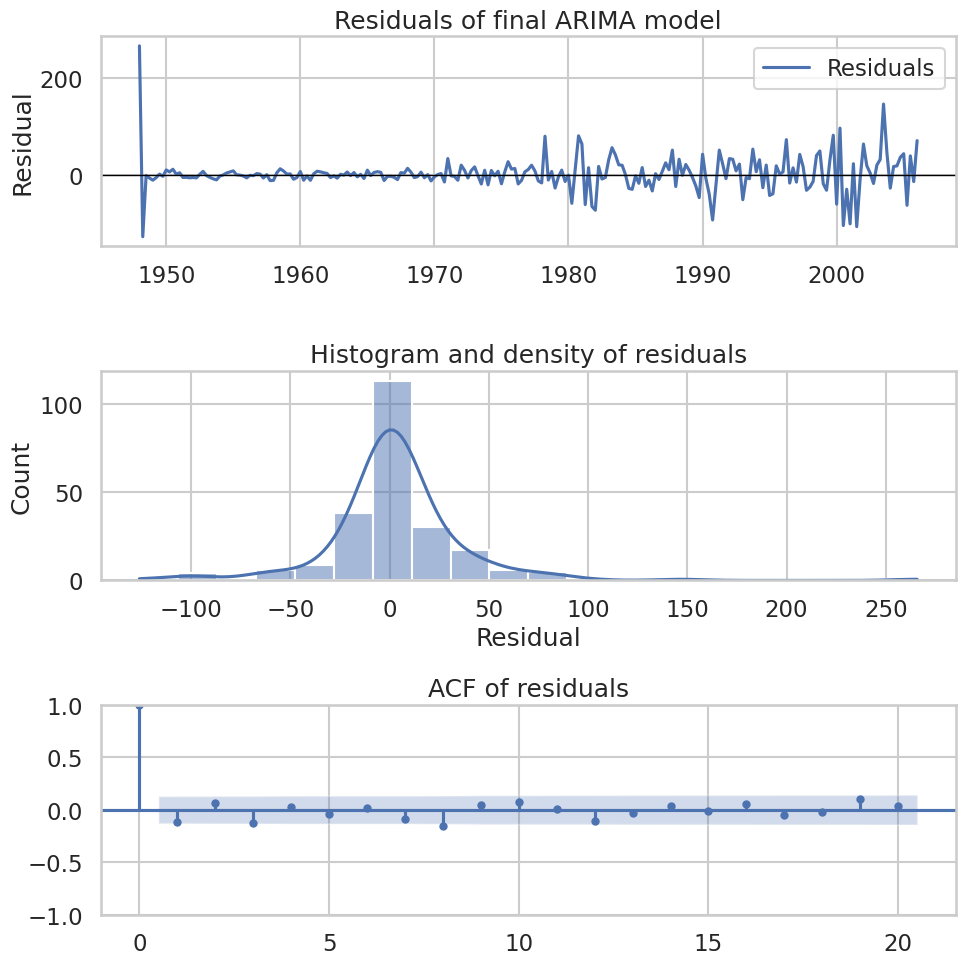

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Final model
final_res = res_121_first

# --- Plot residuals ---
resid = final_res.resid.dropna()

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# 1) Time plot of residuals
axes[0].plot(resid.index, resid, label='Residuals')
axes[0].axhline(0, color='black', linewidth=1)
axes[0].set_title('Residuals of final ARIMA model')
axes[0].set_ylabel('Residual')
axes[0].legend()

# 2) Histogram + density of residuals
sns.histplot(resid, bins=20, kde=True, ax=axes[1])
axes[1].set_title('Histogram and density of residuals')
axes[1].set_xlabel('Residual')

# 3) ACF of residuals
plot_acf(resid, ax=axes[2], lags=20)
axes[2].set_title('ACF of residuals')

plt.tight_layout()
plt.show()



In [ ]:
# --- Ljung-Box test for residual autocorrelation ---
lb = acorr_ljungbox(resid, lags=[4, 8, 12, 16, 20], return_df=True)
print('Ljung-Box test for residuals:')
print(lb)

Ljung-Box test for residuals:
      lb_stat  lb_pvalue
4    8.073248   0.088932
8   16.478716   0.036019
12  21.224442   0.047189
16  22.674798   0.122708
20  26.134374   0.161420


#### 9.2 90/10 split

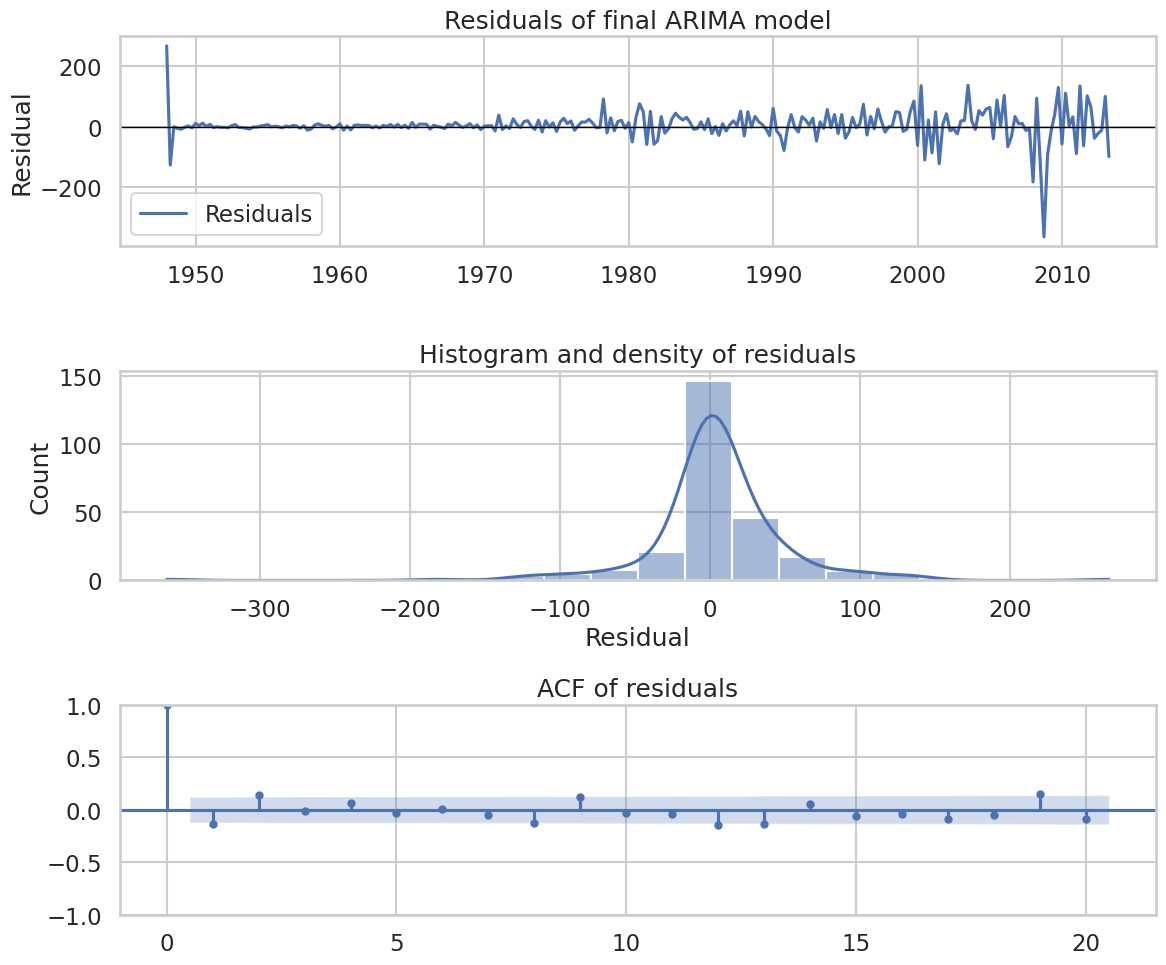

In [ ]:
# Final model
final_res = res_121_second

# --- Plot residuals ---
resid = final_res.resid.dropna()

fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# 1) Time plot of residuals
axes[0].plot(resid.index, resid, label='Residuals')
axes[0].axhline(0, color='black', linewidth=1)
axes[0].set_title('Residuals of final ARIMA model')
axes[0].set_ylabel('Residual')
axes[0].legend()

# 2) Histogram + density of residuals
sns.histplot(resid, bins=20, kde=True, ax=axes[1])
axes[1].set_title('Histogram and density of residuals')
axes[1].set_xlabel('Residual')

# 3) ACF of residuals
plot_acf(resid, ax=axes[2], lags=20)
axes[2].set_title('ACF of residuals')

plt.tight_layout()
plt.show()

In [ ]:
# --- Ljung-Box test for residual autocorrelation ---
lb = acorr_ljungbox(resid, lags=[4, 8, 12, 16, 20], return_df=True)
print('Ljung-Box test for residuals:')
print(lb)

Ljung-Box test for residuals:
      lb_stat  lb_pvalue
4   10.812233   0.028757
8   16.190295   0.039736
12  26.857335   0.008101
16  34.652663   0.004433
20  46.014993   0.000802


- The residual diagnostics lead to the same overall conclusion as in the 90/10 split and the 80/20 split. The residuals fluctuate around zero with no visible trend, their autocorrelations are mostly within the confidence bands.
- Ljung–Box p‑values for the 80/20 split are above 0.05 at most lags, with only marginal rejections at lags 8 and 12, so residual autocorrelation is present but relatively weak.
- Ljung–Box p‑values for the 90/10 split are below 0.05 at all reported lags, indicating systematic residual autocorrelation and suggesting that the ARIMA(1, 2, 1) model does not fully capture the dependence structure in the longer training sample.

### 10. Out-of-Sample Evaluation (2 pts)

Report MAE, MSE, MAPE, and sMAPE on the test set.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred, eps=1e-8):
    y_true, y_pred = np.asarray(y_true), np.asarray(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), eps))) * 100

def smape(y_true, y_pred, eps=1e-8):
    y_true, y_pred = np.asarray(y_true), np.asarray(y_pred)
    return np.mean(
        2 * np.abs(y_pred - y_true) /
        np.maximum(np.abs(y_true) + np.abs(y_pred), eps)
    ) * 100

def evaluate_forecast(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "MAPE (%)": mape(y_true, y_pred),
        "sMAPE (%)": smape(y_true, y_pred)
    }


In [ ]:
# Forecast horizons
h80 = len(gdp_test)
h90 = len(gdp_test_90)

# Forecasts
pred_80 = res_121_first.forecast(steps=h80)
pred_90 = res_121_second.forecast(steps=h90)

# Ensure index alignment (important for safety)
pred_80 = pd.Series(pred_80.values, index=gdp_test.index)
pred_90 = pd.Series(pred_90.values, index=gdp_test_90.index)

# Use only the target column (e.g., 'gdp')
y_test_80 = gdp_test['gdp']
y_test_90 = gdp_test_90['gdp']

# Result
results = pd.DataFrame.from_dict({
    "Test Set of 80/20 split": evaluate_forecast(y_test_80, pred_80),
    "Test Set of 90/10 split": evaluate_forecast(y_test_90, pred_90)
}, orient="index")

print("\n" + "="*60)
print("ARIMA FORECAST PERFORMANCE ON TEST SETS")
print("="*60)
print(results.round(4))


ARIMA FORECAST PERFORMANCE ON TEST SETS
                               MAE           MSE  MAPE (%)  sMAPE (%)
Test Set of 80/20 split  3100.6794  1.181161e+07   17.2489    15.6733
Test Set of 90/10 split   982.5987  1.291344e+06    4.8793     5.0349


- The ARIMA(1, 2, 1) model performs substantially better under the 90/10 split than under the 80/20 split. On the 90/10 test set, MAE and MSE are much smaller, and MAPE and sMAPE decrease from about 17% and 16% to around 5%. This indicates that, for the chosen test period, the model’s out‑of‑sample forecasts are considerably more accurate under the 90/10 split.

# Part III — Box–Jenkins Modeling for Unemployment Rate



### 11. Stationarity Engineering (6 pts)

Apply and justify transformations. Discuss whether differencing is economically sensible given the bounded nature of unemployment.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#### 80/20 split

Applying transformations to the data:

In [ ]:
# Train/test split - 80/20
split_idx_80 = int(len(df) * 0.8)
train_80 = df.iloc[:split_idx_80]
test_80 = df.iloc[split_idx_80:]

print(f"Training period: {train_80.index[0]} to {train_80.index[-1]} (n={len(train_80)})")
print(f"Testing period: {test_80.index[0]} to {test_80.index[-1]} (n={len(test_80)})\n")

# Apply transformations on TRAINING data
transformations_train_80 = pd.DataFrame(index=train_80.index)
transformations_train_80['original'] = train_80['urate']
transformations_train_80['first_diff'] = train_80['urate'].diff()
transformations_train_80['log'] = np.log(train_80['urate'])
transformations_train_80['log_diff'] = np.log(train_80['urate']).diff()
transformations_train_80['pct_change'] = train_80['urate'].pct_change() * 100

# Apply transformations on TESTING data
transformations_test_80 = pd.DataFrame(index=test_80.index)
transformations_test_80['original'] = test_80['urate']
transformations_test_80['first_diff'] = test_80['urate'].diff()
transformations_test_80['log'] = np.log(test_80['urate'])
transformations_test_80['log_diff'] = np.log(test_80['urate']).diff()
transformations_test_80['pct_change'] = test_80['urate'].pct_change() * 100

# Apply transformations on FULL data for visualization
transformations_full_80 = pd.DataFrame(index=df.index)
transformations_full_80['original'] = df['urate']
transformations_full_80['first_diff'] = df['urate'].diff()
transformations_full_80['log'] = np.log(df['urate'])
transformations_full_80['log_diff'] = np.log(df['urate']).diff()
transformations_full_80['pct_change'] = df['urate'].pct_change() * 100


Training period: 1948-01-01 00:00:00 to 2006-01-01 00:00:00 (n=233)
Testing period: 2006-04-01 00:00:00 to 2020-10-01 00:00:00 (n=59)



Plotting transformations to visualize

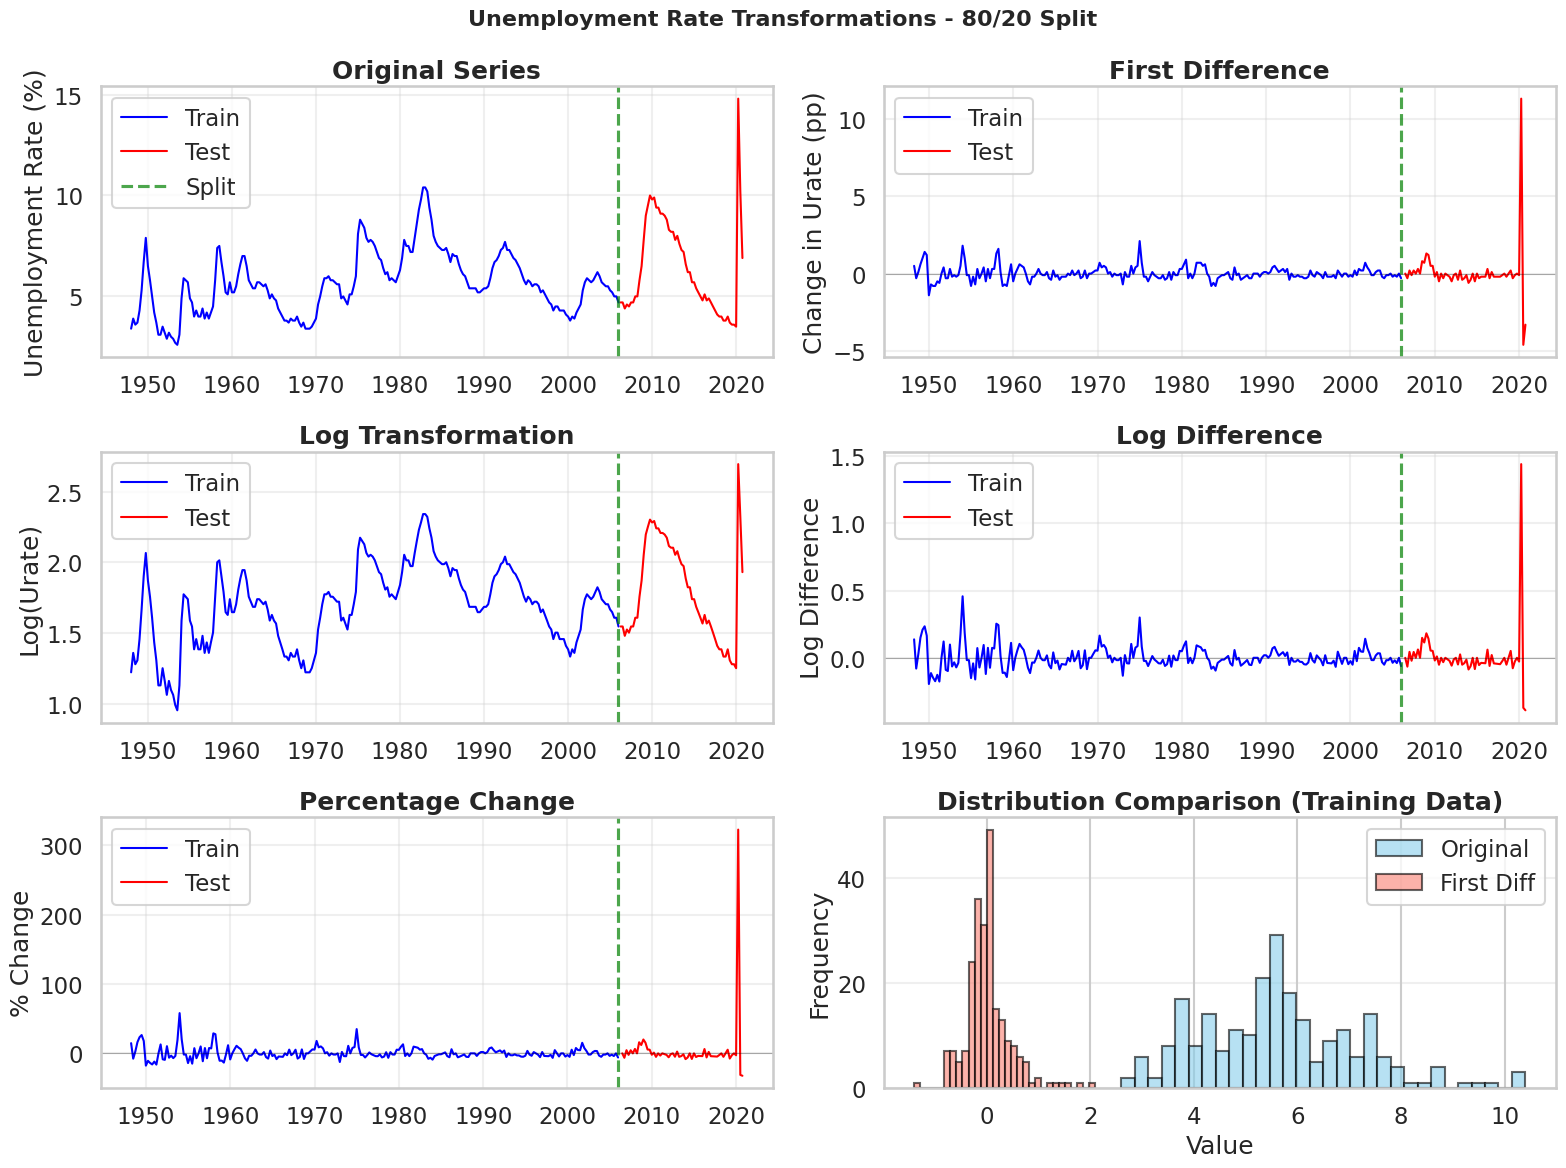

In [ ]:
# Plot all transformations with train/test split - 80/20
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Unemployment Rate Transformations - 80/20 Split', fontsize=16, fontweight='bold')

# Original
axes[0, 0].plot(transformations_train_80['original'], label='Train', color='blue', linewidth=1.5)
axes[0, 0].plot(transformations_test_80['original'], label='Test', color='red', linewidth=1.5)
axes[0, 0].axvline(x=train_80.index[-1], color='green', linestyle='--', alpha=0.7, label='Split')
axes[0, 0].set_title('Original Series', fontweight='bold')
axes[0, 0].set_ylabel('Unemployment Rate (%)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# First Difference
axes[0, 1].plot(transformations_train_80['first_diff'], label='Train', color='blue', linewidth=1.5)
axes[0, 1].plot(transformations_test_80['first_diff'], label='Test', color='red', linewidth=1.5)
axes[0, 1].axvline(x=train_80.index[-1], color='green', linestyle='--', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
axes[0, 1].set_title('First Difference', fontweight='bold')
axes[0, 1].set_ylabel('Change in Urate (pp)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Log
axes[1, 0].plot(transformations_train_80['log'], label='Train', color='blue', linewidth=1.5)
axes[1, 0].plot(transformations_test_80['log'], label='Test', color='red', linewidth=1.5)
axes[1, 0].axvline(x=train_80.index[-1], color='green', linestyle='--', alpha=0.7)
axes[1, 0].set_title('Log Transformation', fontweight='bold')
axes[1, 0].set_ylabel('Log(Urate)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Log Difference
axes[1, 1].plot(transformations_train_80['log_diff'], label='Train', color='blue', linewidth=1.5)
axes[1, 1].plot(transformations_test_80['log_diff'], label='Test', color='red', linewidth=1.5)
axes[1, 1].axvline(x=train_80.index[-1], color='green', linestyle='--', alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
axes[1, 1].set_title('Log Difference', fontweight='bold')
axes[1, 1].set_ylabel('Log Difference')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Percentage Change
axes[2, 0].plot(transformations_train_80['pct_change'], label='Train', color='blue', linewidth=1.5)
axes[2, 0].plot(transformations_test_80['pct_change'], label='Test', color='red', linewidth=1.5)
axes[2, 0].axvline(x=train_80.index[-1], color='green', linestyle='--', alpha=0.7)
axes[2, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
axes[2, 0].set_title('Percentage Change', fontweight='bold')
axes[2, 0].set_ylabel('% Change')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# Distribution comparison (Training data only)
axes[2, 1].hist(transformations_train_80['original'].dropna(), bins=30, alpha=0.6,
                label='Original', color='skyblue', edgecolor='black')
axes[2, 1].hist(transformations_train_80['first_diff'].dropna(), bins=30, alpha=0.6,
                label='First Diff', color='salmon', edgecolor='black')
axes[2, 1].set_title('Distribution Comparison (Training Data)', fontweight='bold')
axes[2, 1].set_xlabel('Value')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


ADF, KPSS test to justify transformations

ADF

In [ ]:
# Summary statistics - TRAINING DATA (80/20)
print("\n=== SUMMARY STATISTICS (TRAINING DATA - 80/20) ===\n")
print(transformations_train_80.describe())

# Summary statistics - TESTING DATA (80/20)
print("\n=== SUMMARY STATISTICS (TESTING DATA - 80/20) ===\n")
print(transformations_test_80.describe())

# ADF Tests on TRAINING data (80/20)
print("\n=== STATIONARITY TESTS - ADF (TRAINING DATA - 80/20) ===\n")
adf_results_80 = {}
for col in ['original', 'first_diff', 'log', 'log_diff', 'pct_change']:
    result = adfuller(transformations_train_80[col].dropna(), autolag='AIC')
    adf_results_80[col] = result
    print(f"{col}:")
    print(f"  ADF Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")
    print(f"  Critical values: 1%={result[4]['1%']:.3f}, 5%={result[4]['5%']:.3f}, 10%={result[4]['10%']:.3f}")
    print(f"  Stationary: {'Yes' if result[1] < 0.05 else 'No'}\n")



=== SUMMARY STATISTICS (TRAINING DATA - 80/20) ===

         original  first_diff         log    log_diff  pct_change
count  233.000000  232.000000  233.000000  232.000000  232.000000
mean     5.624034    0.005603    1.690472    0.001396    0.474901
std      1.517776    0.437044    0.273807    0.080371    8.603916
min      2.600000   -1.400000    0.955511   -0.195061  -17.721519
25%      4.500000   -0.200000    1.504077   -0.041457   -4.060949
50%      5.600000   -0.100000    1.722767   -0.013514   -1.342342
75%      6.600000    0.200000    1.887070    0.040495    4.132653
max     10.400000    2.100000    2.341806    0.457833   58.064516

=== SUMMARY STATISTICS (TESTING DATA - 80/20) ===

        original  first_diff        log   log_diff  pct_change
count  59.000000   58.000000  59.000000  58.000000   58.000000
mean    6.391525    0.037931   1.793012   0.006620    4.121405
std     2.358352    1.713602   0.350350   0.211343   43.360742
min     3.500000   -4.600000   1.252763  -0.39086

KPSS

In [ ]:
# KPSS Tests on TRAINING data (80/20)
print("\n=== STATIONARITY TESTS - KPSS (TRAINING DATA - 80/20) ===\n")
print("Note: KPSS null hypothesis is that the series IS stationary\n")

kpss_results_80 = {}
for col in ['original', 'first_diff', 'log', 'log_diff', 'pct_change']:
    try:
        # Test with trend
        result_trend = kpss(transformations_train_80[col].dropna(), regression='ct', nlags='auto')
        # Test with constant only
        result_const = kpss(transformations_train_80[col].dropna(), regression='c', nlags='auto')

        kpss_results_80[col] = {'trend': result_trend, 'const': result_const}

        print(f"{col}:")
        print(f"  KPSS (with trend):")
        print(f"    Test Statistic: {result_trend[0]:.4f}")
        print(f"    p-value: {result_trend[1]:.4f}")
        print(f"    Critical values: {result_trend[3]}")
        print(f"    Stationary: {'Yes' if result_trend[1] > 0.05 else 'No'}")

        print(f"  KPSS (constant only):")
        print(f"    Test Statistic: {result_const[0]:.4f}")
        print(f"    p-value: {result_const[1]:.4f}")
        print(f"    Critical values: {result_const[3]}")
        print(f"    Stationary: {'Yes' if result_const[1] > 0.05 else 'No'}\n")
    except Exception as e:
        print(f"{col}: Error computing KPSS test - {e}\n")
        kpss_results_80[col] = None


=== STATIONARITY TESTS - KPSS (TRAINING DATA - 80/20) ===

Note: KPSS null hypothesis is that the series IS stationary

original:
  KPSS (with trend):
    Test Statistic: 0.2521
    p-value: 0.0100
    Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
    Stationary: No
  KPSS (constant only):
    Test Statistic: 0.5081
    p-value: 0.0398
    Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
    Stationary: No

first_diff:
  KPSS (with trend):
    Test Statistic: 0.0214
    p-value: 0.1000
    Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
    Stationary: Yes
  KPSS (constant only):
    Test Statistic: 0.0575
    p-value: 0.1000
    Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
    Stationary: Yes

log:
  KPSS (with trend):
    Test Statistic: 0.2413
    p-value: 0.0100
    Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
    Stationary: No
  KPSS (constant only)

In [ ]:
# Combined summary table (80/20)
print("\n=== COMBINED STATIONARITY TEST SUMMARY (TRAINING DATA - 80/20) ===\n")
print(f"{'Transformation':<15} {'ADF p-value':<12} {'ADF Result':<15} {'KPSS p-value':<13} {'KPSS Result':<15} {'Conclusion':<15}")
print("-" * 95)

for col in ['original', 'first_diff', 'log', 'log_diff', 'pct_change']:
    try:
        adf_p = adf_results_80[col][1]
        kpss_p = kpss_results_80[col]['trend'][1] if kpss_results_80[col] else np.nan

        adf_stationary = 'Stationary' if adf_p < 0.05 else 'Non-stationary'
        kpss_stationary = 'Stationary' if kpss_p > 0.05 else 'Non-stationary'

        # Conclusion based on both tests
        if adf_p < 0.05 and kpss_p > 0.05:
            conclusion = 'Stationary'
        elif adf_p >= 0.05 and kpss_p <= 0.05:
            conclusion = 'Non-stationary'
        else:
            conclusion = 'Inconclusive'

        print(f"{col:<15} {adf_p:<12.4f} {adf_stationary:<15} {kpss_p:<13.4f} {kpss_stationary:<15} {conclusion:<15}")
    except:
        print(f"{col:<15} {'Error':<12} {'Error':<15} {'Error':<13} {'Error':<15} {'Error':<15}")

print("\n" + "="*80 + "\n")


=== COMBINED STATIONARITY TEST SUMMARY (TRAINING DATA - 80/20) ===

Transformation  ADF p-value  ADF Result      KPSS p-value  KPSS Result     Conclusion     
-----------------------------------------------------------------------------------------------
original        0.0035       Stationary      0.0100        Non-stationary  Inconclusive   
first_diff      0.0000       Stationary      0.1000        Stationary      Stationary     
log             0.0049       Stationary      0.0100        Non-stationary  Inconclusive   
log_diff        0.0000       Stationary      0.1000        Stationary      Stationary     
pct_change      0.0000       Stationary      0.1000        Stationary      Stationary     




#### 90/10 split

Applying transformations to the data

In [ ]:
# Train/test split - 90/10
split_idx_90 = int(len(df) * 0.9)
train_90 = df.iloc[:split_idx_90]
test_90 = df.iloc[split_idx_90:]

print(f"Training period: {train_90.index[0]} to {train_90.index[-1]} (n={len(train_90)})")
print(f"Testing period: {test_90.index[0]} to {test_90.index[-1]} (n={len(test_90)})\n")

# Apply transformations on TRAINING data
transformations_train_90 = pd.DataFrame(index=train_90.index)
transformations_train_90['original'] = train_90['urate']
transformations_train_90['first_diff'] = train_90['urate'].diff()
transformations_train_90['log'] = np.log(train_90['urate'])
transformations_train_90['log_diff'] = np.log(train_90['urate']).diff()
transformations_train_90['pct_change'] = train_90['urate'].pct_change() * 100

# Apply transformations on TESTING data
transformations_test_90 = pd.DataFrame(index=test_90.index)
transformations_test_90['original'] = test_90['urate']
transformations_test_90['first_diff'] = test_90['urate'].diff()
transformations_test_90['log'] = np.log(test_90['urate'])
transformations_test_90['log_diff'] = np.log(test_90['urate']).diff()
transformations_test_90['pct_change'] = test_90['urate'].pct_change() * 100

# Apply transformations on FULL data for visualization
transformations_full_90 = pd.DataFrame(index=df.index)
transformations_full_90['original'] = df['urate']
transformations_full_90['first_diff'] = df['urate'].diff()
transformations_full_90['log'] = np.log(df['urate'])
transformations_full_90['log_diff'] = np.log(df['urate']).diff()
transformations_full_90['pct_change'] = df['urate'].pct_change() * 100


Training period: 1948-01-01 00:00:00 to 2013-04-01 00:00:00 (n=262)
Testing period: 2013-07-01 00:00:00 to 2020-10-01 00:00:00 (n=30)



Plotting different transformations

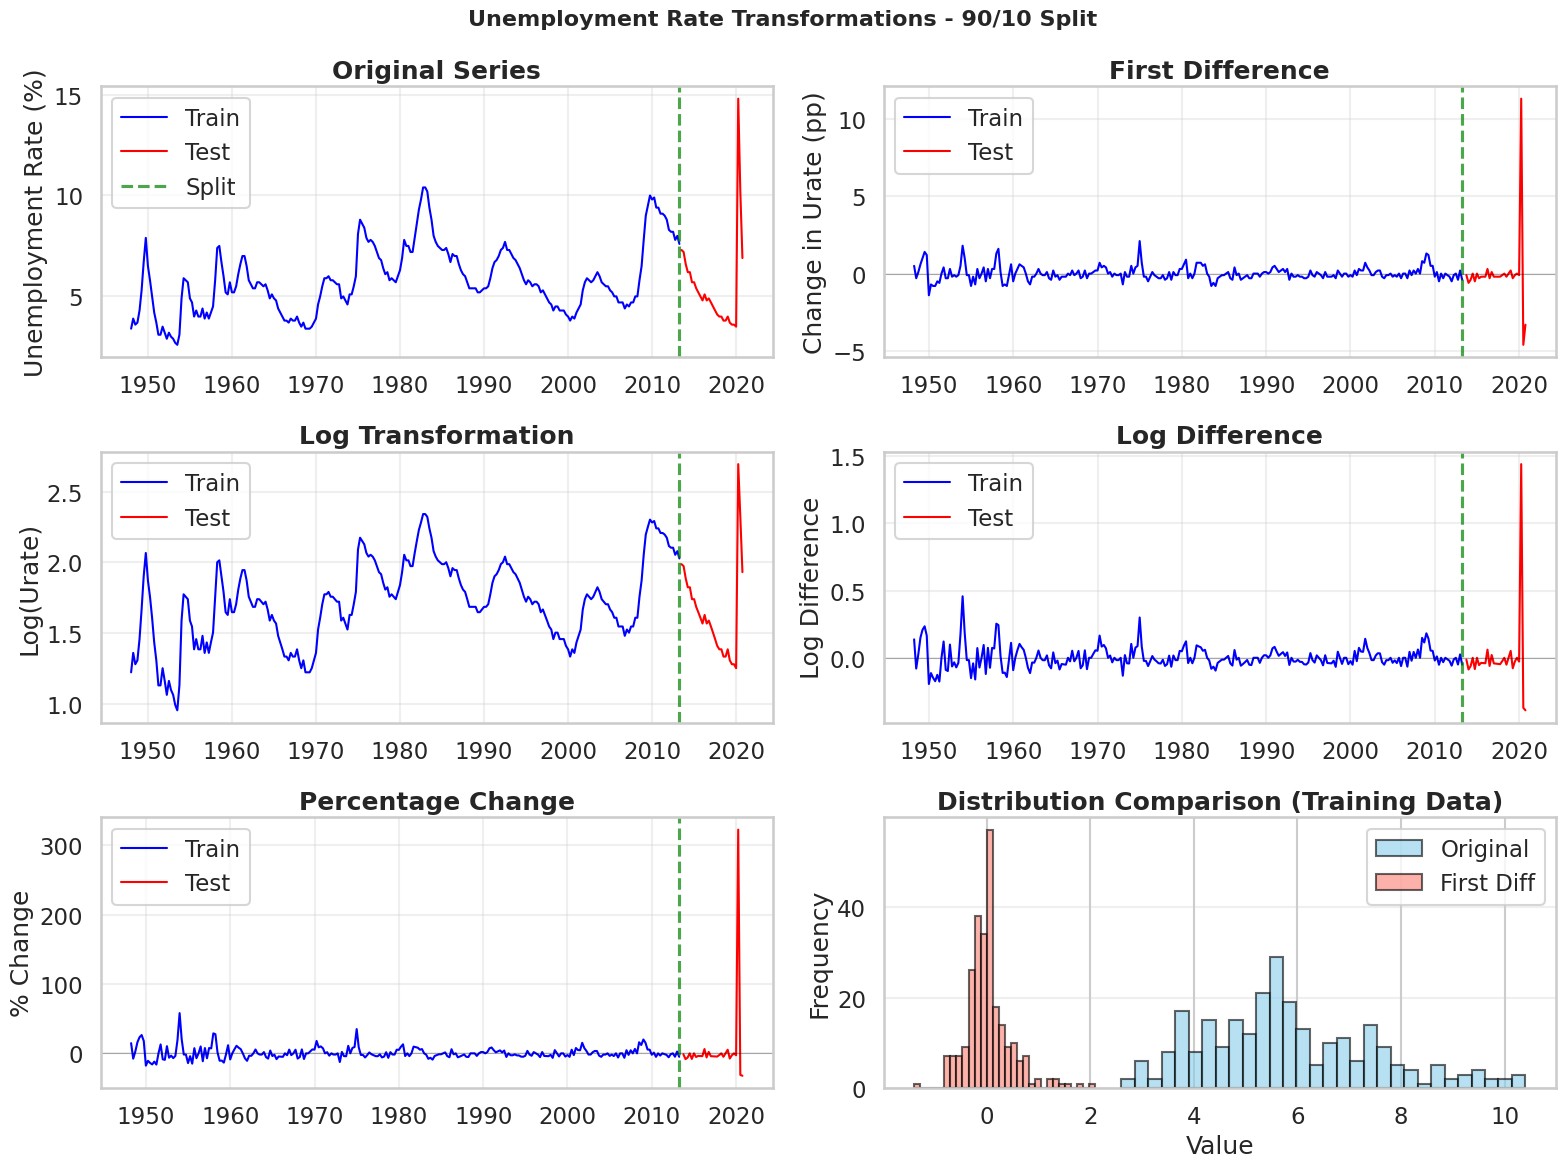

In [ ]:
# Plot all transformations with train/test split - 90/10
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Unemployment Rate Transformations - 90/10 Split', fontsize=16, fontweight='bold')

# Original
axes[0, 0].plot(transformations_train_90['original'], label='Train', color='blue', linewidth=1.5)
axes[0, 0].plot(transformations_test_90['original'], label='Test', color='red', linewidth=1.5)
axes[0, 0].axvline(x=train_90.index[-1], color='green', linestyle='--', alpha=0.7, label='Split')
axes[0, 0].set_title('Original Series', fontweight='bold')
axes[0, 0].set_ylabel('Unemployment Rate (%)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# First Difference
axes[0, 1].plot(transformations_train_90['first_diff'], label='Train', color='blue', linewidth=1.5)
axes[0, 1].plot(transformations_test_90['first_diff'], label='Test', color='red', linewidth=1.5)
axes[0, 1].axvline(x=train_90.index[-1], color='green', linestyle='--', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
axes[0, 1].set_title('First Difference', fontweight='bold')
axes[0, 1].set_ylabel('Change in Urate (pp)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Log
axes[1, 0].plot(transformations_train_90['log'], label='Train', color='blue', linewidth=1.5)
axes[1, 0].plot(transformations_test_90['log'], label='Test', color='red', linewidth=1.5)
axes[1, 0].axvline(x=train_90.index[-1], color='green', linestyle='--', alpha=0.7)
axes[1, 0].set_title('Log Transformation', fontweight='bold')
axes[1, 0].set_ylabel('Log(Urate)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Log Difference
axes[1, 1].plot(transformations_train_90['log_diff'], label='Train', color='blue', linewidth=1.5)
axes[1, 1].plot(transformations_test_90['log_diff'], label='Test', color='red', linewidth=1.5)
axes[1, 1].axvline(x=train_90.index[-1], color='green', linestyle='--', alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
axes[1, 1].set_title('Log Difference', fontweight='bold')
axes[1, 1].set_ylabel('Log Difference')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Percentage Change
axes[2, 0].plot(transformations_train_90['pct_change'], label='Train', color='blue', linewidth=1.5)
axes[2, 0].plot(transformations_test_90['pct_change'], label='Test', color='red', linewidth=1.5)
axes[2, 0].axvline(x=train_90.index[-1], color='green', linestyle='--', alpha=0.7)
axes[2, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)
axes[2, 0].set_title('Percentage Change', fontweight='bold')
axes[2, 0].set_ylabel('% Change')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# Distribution comparison (Training data only)
axes[2, 1].hist(transformations_train_90['original'].dropna(), bins=30, alpha=0.6,
                label='Original', color='skyblue', edgecolor='black')
axes[2, 1].hist(transformations_train_90['first_diff'].dropna(), bins=30, alpha=0.6,
                label='First Diff', color='salmon', edgecolor='black')
axes[2, 1].set_title('Distribution Comparison (Training Data)', fontweight='bold')
axes[2, 1].set_xlabel('Value')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
print("\n=== SUMMARY STATISTICS (TRAINING DATA - 90/10) ===\n")
print(transformations_train_90.describe())

# Summary statistics - TESTING DATA (90/10)
print("\n=== SUMMARY STATISTICS (TESTING DATA - 90/10) ===\n")
print(transformations_test_90.describe())


=== SUMMARY STATISTICS (TRAINING DATA - 90/10) ===

         original  first_diff         log    log_diff  pct_change
count  262.000000  261.000000  262.000000  261.000000  261.000000
mean     5.816412    0.016092    1.719720    0.003082    0.630353
std      1.670638    0.439197    0.288687    0.078719    8.414378
min      2.600000   -1.400000    0.955511   -0.195061  -17.721519
25%      4.600000   -0.200000    1.526056   -0.040822   -4.000000
50%      5.600000    0.000000    1.722767    0.000000    0.000000
75%      6.900000    0.200000    1.931521    0.043485    4.444444
max     10.400000    2.100000    2.341806    0.457833   58.064516

=== SUMMARY STATISTICS (TESTING DATA - 90/10) ===

        original  first_diff        log   log_diff  pct_change
count  30.000000   29.000000  30.000000  29.000000   29.000000
mean    5.453333   -0.013793   1.636696  -0.001943    6.504961
std     2.295082    2.399959   0.325359   0.294335   61.397923
min     3.500000   -4.600000   1.252763  -0.39086

ADF test

In [ ]:
# ADF Tests on TRAINING data (90/10)
print("\n=== STATIONARITY TESTS - ADF (TRAINING DATA - 90/10) ===\n")
adf_results_90 = {}
for col in ['original', 'first_diff', 'log', 'log_diff', 'pct_change']:
    result = adfuller(transformations_train_90[col].dropna(), autolag='AIC')
    adf_results_90[col] = result
    print(f"{col}:")
    print(f"  ADF Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")
    print(f"  Critical values: 1%={result[4]['1%']:.3f}, 5%={result[4]['5%']:.3f}, 10%={result[4]['10%']:.3f}")
    print(f"  Stationary: {'Yes' if result[1] < 0.05 else 'No'}\n")



=== STATIONARITY TESTS - ADF (TRAINING DATA - 90/10) ===

original:
  ADF Statistic: -2.9476
  p-value: 0.0401
  Critical values: 1%=-3.457, 5%=-2.873, 10%=-2.573
  Stationary: Yes

first_diff:
  ADF Statistic: -5.6414
  p-value: 0.0000
  Critical values: 1%=-3.457, 5%=-2.873, 10%=-2.573
  Stationary: Yes

log:
  ADF Statistic: -2.3045
  p-value: 0.1705
  Critical values: 1%=-3.457, 5%=-2.873, 10%=-2.573
  Stationary: No

log_diff:
  ADF Statistic: -4.1164
  p-value: 0.0009
  Critical values: 1%=-3.457, 5%=-2.873, 10%=-2.573
  Stationary: Yes

pct_change:
  ADF Statistic: -3.9148
  p-value: 0.0019
  Critical values: 1%=-3.457, 5%=-2.873, 10%=-2.573
  Stationary: Yes



KPSS test

In [ ]:
# KPSS Tests on TRAINING data (90/10)
print("\n=== STATIONARITY TESTS - KPSS (TRAINING DATA - 90/10) ===\n")
print("Note: KPSS null hypothesis is that the series IS stationary\n")

kpss_results_90 = {}
for col in ['original', 'first_diff', 'log', 'log_diff', 'pct_change']:
    try:
        # Test with trend
        result_trend = kpss(transformations_train_90[col].dropna(), regression='ct', nlags='auto')
        # Test with constant only
        result_const = kpss(transformations_train_90[col].dropna(), regression='c', nlags='auto')

        kpss_results_90[col] = {'trend': result_trend, 'const': result_const}

        print(f"{col}:")
        print(f"  KPSS (with trend):")
        print(f"    Test Statistic: {result_trend[0]:.4f}")
        print(f"    p-value: {result_trend[1]:.4f}")
        print(f"    Critical values: {result_trend[3]}")
        print(f"    Stationary: {'Yes' if result_trend[1] > 0.05 else 'No'}")

        print(f"  KPSS (constant only):")
        print(f"    Test Statistic: {result_const[0]:.4f}")
        print(f"    p-value: {result_const[1]:.4f}")
        print(f"    Critical values: {result_const[3]}")
        print(f"    Stationary: {'Yes' if result_const[1] > 0.05 else 'No'}\n")
    except Exception as e:
        print(f"{col}: Error computing KPSS test - {e}\n")
        kpss_results_90[col] = None


=== STATIONARITY TESTS - KPSS (TRAINING DATA - 90/10) ===

Note: KPSS null hypothesis is that the series IS stationary

original:
  KPSS (with trend):
    Test Statistic: 0.1426
    p-value: 0.0562
    Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
    Stationary: Yes
  KPSS (constant only):
    Test Statistic: 0.5463
    p-value: 0.0312
    Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
    Stationary: No

first_diff:
  KPSS (with trend):
    Test Statistic: 0.0269
    p-value: 0.1000
    Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
    Stationary: Yes
  KPSS (constant only):
    Test Statistic: 0.0284
    p-value: 0.1000
    Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
    Stationary: Yes

log:
  KPSS (with trend):
    Test Statistic: 0.1559
    p-value: 0.0418
    Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
    Stationary: No
  KPSS (constant only

In [ ]:
# Combined summary table (90/10)
print("\n=== COMBINED STATIONARITY TEST SUMMARY (TRAINING DATA - 90/10) ===\n")
print(f"{'Transformation':<15} {'ADF p-value':<12} {'ADF Result':<15} {'KPSS p-value':<13} {'KPSS Result':<15} {'Conclusion':<15}")
print("-" * 95)

for col in ['original', 'first_diff', 'log', 'log_diff', 'pct_change']:
    try:
        adf_p = adf_results_90[col][1]
        kpss_p = kpss_results_90[col]['trend'][1] if kpss_results_90[col] else np.nan

        adf_stationary = 'Stationary' if adf_p < 0.05 else 'Non-stationary'
        kpss_stationary = 'Stationary' if kpss_p > 0.05 else 'Non-stationary'

        # Conclusion based on both tests
        if adf_p < 0.05 and kpss_p > 0.05:
            conclusion = 'Stationary'
        elif adf_p >= 0.05 and kpss_p <= 0.05:
            conclusion = 'Non-stationary'
        else:
            conclusion = 'Inconclusive'

        print(f"{col:<15} {adf_p:<12.4f} {adf_stationary:<15} {kpss_p:<13.4f} {kpss_stationary:<15} {conclusion:<15}")
    except:
        print(f"{col:<15} {'Error':<12} {'Error':<15} {'Error':<13} {'Error':<15} {'Error':<15}")

print("\n" + "="*80 + "\n")


=== COMBINED STATIONARITY TEST SUMMARY (TRAINING DATA - 90/10) ===

Transformation  ADF p-value  ADF Result      KPSS p-value  KPSS Result     Conclusion     
-----------------------------------------------------------------------------------------------
original        0.0401       Stationary      0.0562        Stationary      Stationary     
first_diff      0.0000       Stationary      0.1000        Stationary      Stationary     
log             0.1705       Non-stationary  0.0418        Non-stationary  Non-stationary 
log_diff        0.0009       Stationary      0.1000        Stationary      Stationary     
pct_change      0.0019       Stationary      0.1000        Stationary      Stationary     




Comparison between 80/20 and 90/10 splits

In [ ]:
# ============================================================================
# COMPARISON BETWEEN 80/20 AND 90/10 SPLITS
# ============================================================================

print("\n" + "="*80)
print("COMPARISON BETWEEN 80/20 AND 90/10 SPLITS")
print("="*80 + "\n")

print("Sample sizes:")
print(f"  80/20 - Train: {len(train_80)}, Test: {len(test_80)}")
print(f"  90/10 - Train: {len(train_90)}, Test: {len(test_90)}\n")

print("Training period end dates:")
print(f"  80/20 - Train ends: {train_80.index[-1]}")
print(f"  90/10 - Train ends: {train_90.index[-1]}\n")

print("Stationarity conclusions for key transformations:")
print("\nFirst Difference:")
print(f"  80/20 - ADF p-value: {adf_results_80['first_diff'][1]:.4f}, KPSS p-value: {kpss_results_80['first_diff']['trend'][1]:.4f}")
print(f"  90/10 - ADF p-value: {adf_results_90['first_diff'][1]:.4f}, KPSS p-value: {kpss_results_90['first_diff']['trend'][1]:.4f}")

print("\nLog Difference:")
print(f"  80/20 - ADF p-value: {adf_results_80['log_diff'][1]:.4f}, KPSS p-value: {kpss_results_80['log_diff']['trend'][1]:.4f}")
print(f"  90/10 - ADF p-value: {adf_results_90['log_diff'][1]:.4f}, KPSS p-value: {kpss_results_90['log_diff']['trend'][1]:.4f}")

print("\nOriginal Series:")
print(f"  80/20 - ADF p-value: {adf_results_80['original'][1]:.4f}, KPSS p-value: {kpss_results_80['original']['trend'][1]:.4f}")
print(f"  90/10 - ADF p-value: {adf_results_90['original'][1]:.4f}, KPSS p-value: {kpss_results_90['original']['trend'][1]:.4f}")

print("\n" + "="*80)


COMPARISON BETWEEN 80/20 AND 90/10 SPLITS

Sample sizes:
  80/20 - Train: 233, Test: 59
  90/10 - Train: 262, Test: 30

Training period end dates:
  80/20 - Train ends: 2006-01-01 00:00:00
  90/10 - Train ends: 2013-04-01 00:00:00

Stationarity conclusions for key transformations:

First Difference:
  80/20 - ADF p-value: 0.0000, KPSS p-value: 0.1000
  90/10 - ADF p-value: 0.0000, KPSS p-value: 0.1000

Log Difference:
  80/20 - ADF p-value: 0.0000, KPSS p-value: 0.1000
  90/10 - ADF p-value: 0.0009, KPSS p-value: 0.1000

Original Series:
  80/20 - ADF p-value: 0.0035, KPSS p-value: 0.0100
  90/10 - ADF p-value: 0.0401, KPSS p-value: 0.0562



### Discussing whether differencing is economically sensible given the bounded nature of unemployment

Differencing is economically sensible for unemployment despite its bounded nature, because first difference captures changes in labor market conditions and thus shows if UE rate is rising/falling and how quickly it rises/falls. Differencing also provides a practical range for examining the TS data. finally, UE rate exhibits mean-reverting behavior long term, but first-differencing is still useful for short/medium term forecasting.

Additional justification for various transformations:

The first difference measures the change in UE rate from one period to the next in percentage points. This transformation achieved stationary (as shown by the results of the ADF and KPSS tests for both data splits) and is commonly used for unemployment analysis.

The log transformation can help stabilize variance, but does not address non stationarity. We can see from the results of the tests that stationarity was not able to be determined between both splits.

Log difference is the change in log UE rate, similar to the first difference. This also achieves stationarity across both tests/splits.

Finally, percentage change measures the period over period percentage change in UE rate. This shows relative changes, useful for comparing movements at different UE levels. This transformation achieves stationarity across both tests/splits.

From performing these transformations, we can determine that first difference, log difference, and percentage change are potentially appropriate ways to analyze the UE rate as they all achieve stationarity within the data.


### 12. Model Identification (6 pts)

Using ACF and PACF plots, propose at least two ARIMA candidates and justify each.

**I chose to use first difference given its economic relevance.**

#### 80/20 split

ACF/PACF plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf


ACF/PACF ANALYSIS - 80/20 SPLIT

Analyzing first-differenced unemployment rate
Training observations: 232
Period: 1948-04-01 00:00:00 to 2006-01-01 00:00:00



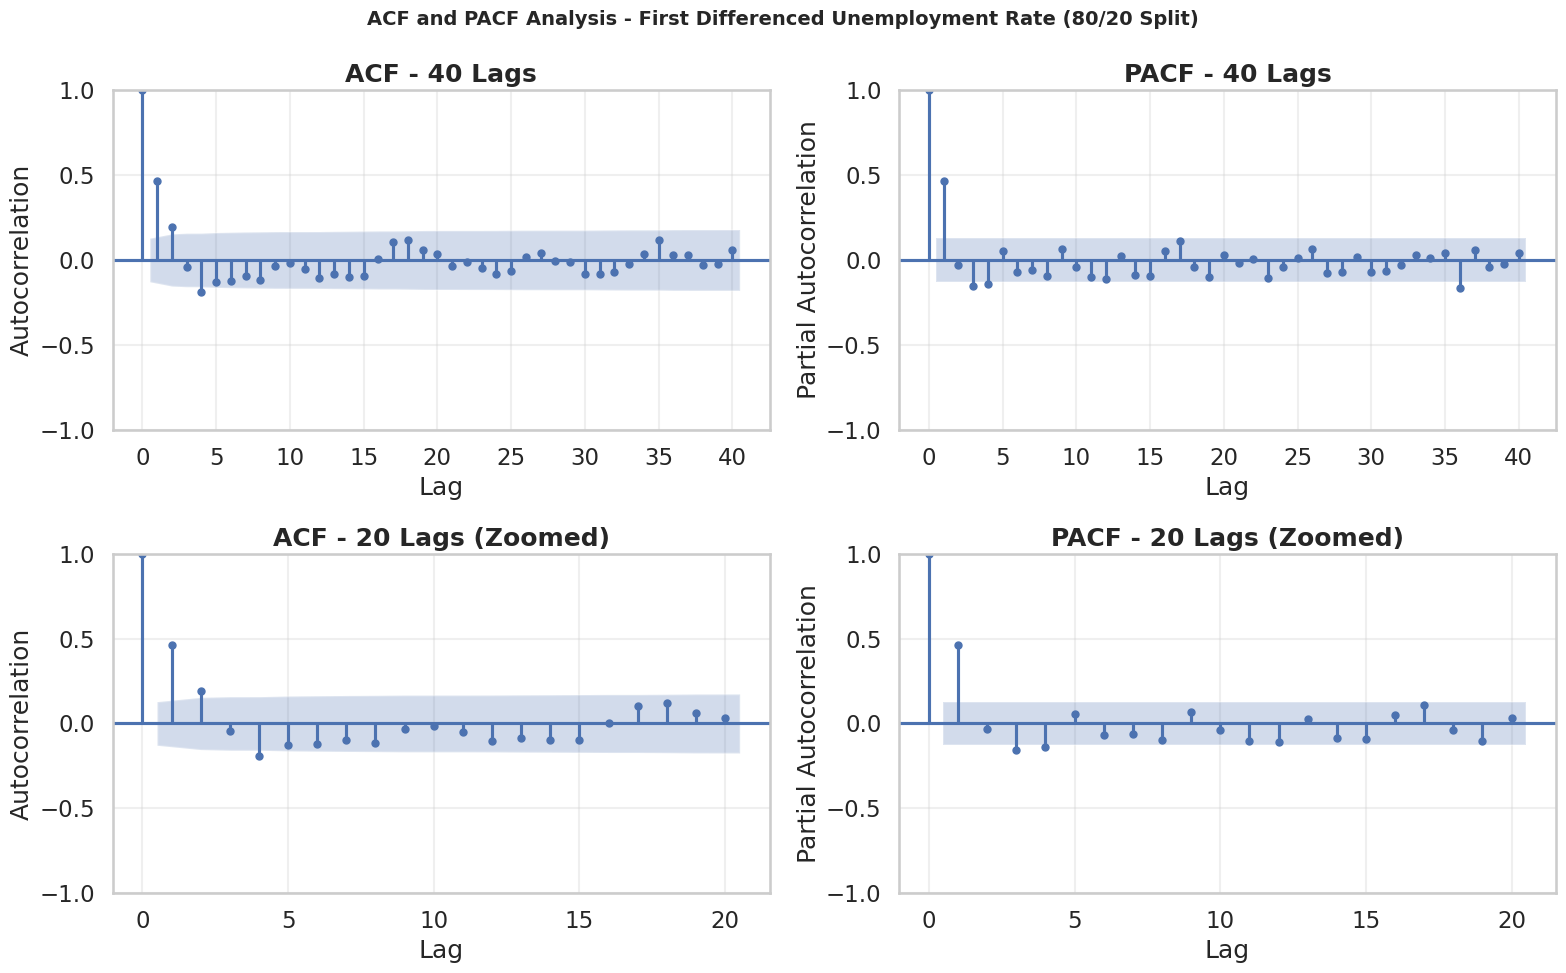

In [ ]:
# ============================================================================
# ACF/PACF ANALYSIS - 80/20 SPLIT
# ============================================================================

print("\n" + "="*80)
print("ACF/PACF ANALYSIS - 80/20 SPLIT")
print("="*80 + "\n")

# Use first difference transformation (most common for unemployment)
series_80 = transformations_train_80['first_diff'].dropna()

print(f"Analyzing first-differenced unemployment rate")
print(f"Training observations: {len(series_80)}")
print(f"Period: {series_80.index[0]} to {series_80.index[-1]}\n")

# Create ACF and PACF plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('ACF and PACF Analysis - First Differenced Unemployment Rate (80/20 Split)',
             fontsize=14, fontweight='bold')

# ACF plot - full view (40 lags)
plot_acf(series_80, lags=40, ax=axes[0, 0], alpha=0.05)
axes[0, 0].set_title('ACF - 40 Lags', fontweight='bold')
axes[0, 0].set_xlabel('Lag')
axes[0, 0].set_ylabel('Autocorrelation')
axes[0, 0].grid(True, alpha=0.3)

# PACF plot - full view (40 lags)
plot_pacf(series_80, lags=40, ax=axes[0, 1], alpha=0.05, method='ywm')
axes[0, 1].set_title('PACF - 40 Lags', fontweight='bold')
axes[0, 1].set_xlabel('Lag')
axes[0, 1].set_ylabel('Partial Autocorrelation')
axes[0, 1].grid(True, alpha=0.3)

# ACF plot - zoomed view (20 lags for detail)
plot_acf(series_80, lags=20, ax=axes[1, 0], alpha=0.05)
axes[1, 0].set_title('ACF - 20 Lags (Zoomed)', fontweight='bold')
axes[1, 0].set_xlabel('Lag')
axes[1, 0].set_ylabel('Autocorrelation')
axes[1, 0].grid(True, alpha=0.3)

# PACF plot - zoomed view (20 lags for detail)
plot_pacf(series_80, lags=20, ax=axes[1, 1], alpha=0.05, method='ywm')
axes[1, 1].set_title('PACF - 20 Lags (Zoomed)', fontweight='bold')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('Partial Autocorrelation')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### 90/10 split


ACF/PACF ANALYSIS - 90/10 SPLIT

Analyzing first-differenced unemployment rate
Training observations: 261
Period: 1948-04-01 00:00:00 to 2013-04-01 00:00:00



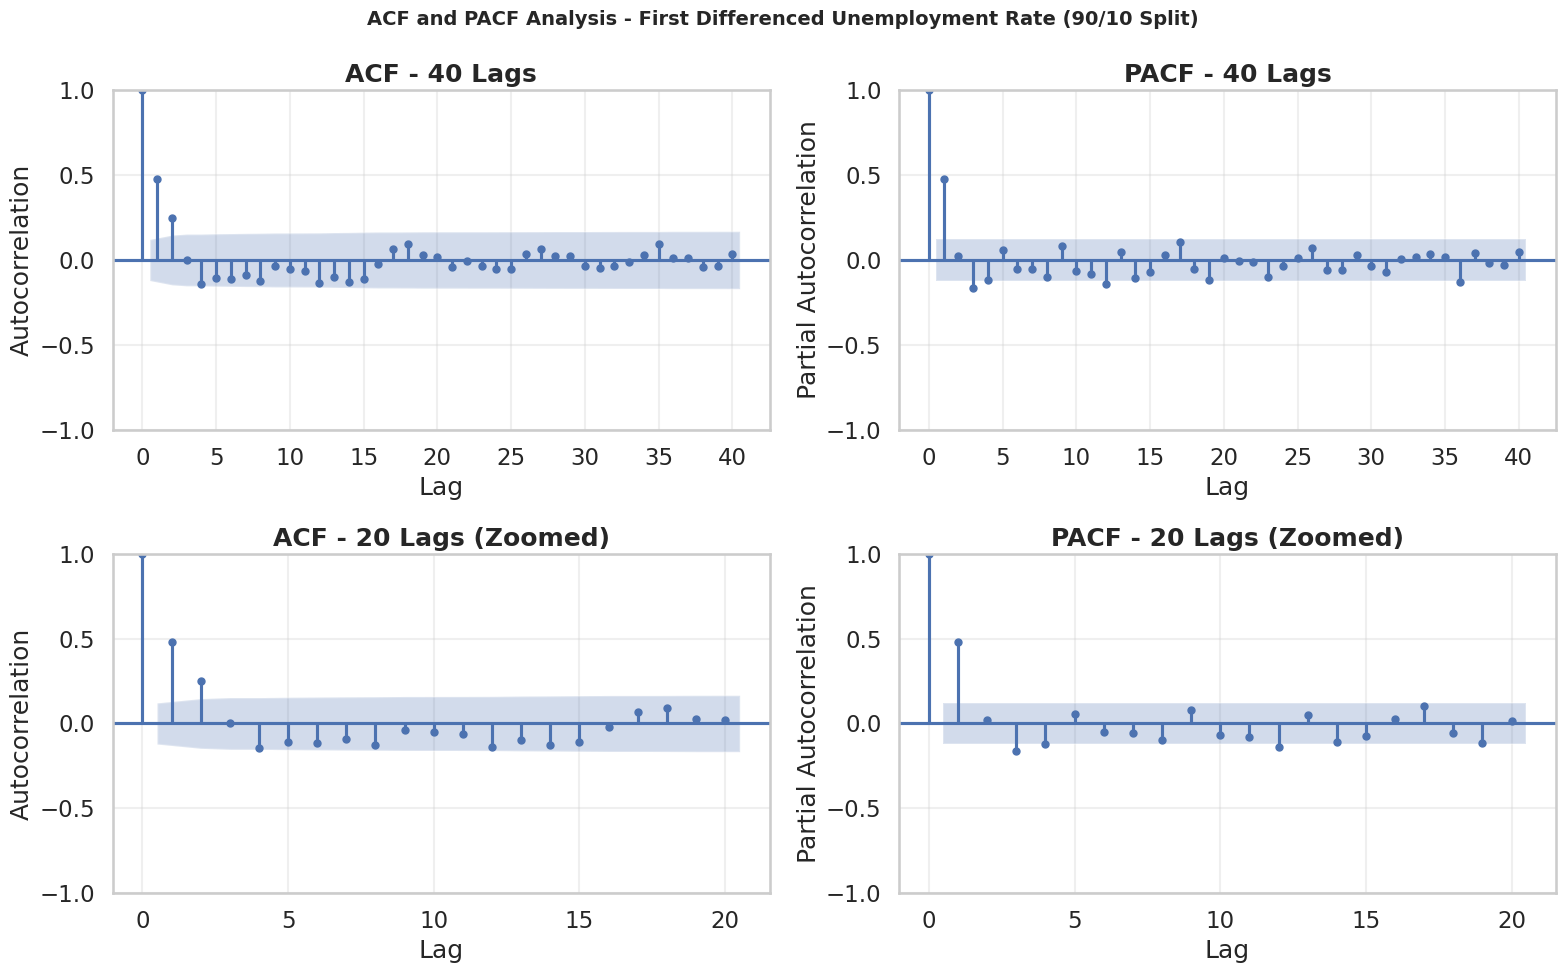

In [ ]:
# ============================================================================
# ACF/PACF ANALYSIS - 90/10 SPLIT
# ============================================================================

print("\n" + "="*80)
print("ACF/PACF ANALYSIS - 90/10 SPLIT")
print("="*80 + "\n")

# Use first difference transformation
series_90 = transformations_train_90['first_diff'].dropna()

print(f"Analyzing first-differenced unemployment rate")
print(f"Training observations: {len(series_90)}")
print(f"Period: {series_90.index[0]} to {series_90.index[-1]}\n")

# Create ACF and PACF plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('ACF and PACF Analysis - First Differenced Unemployment Rate (90/10 Split)',
             fontsize=14, fontweight='bold')

# ACF plot - full view (40 lags)
plot_acf(series_90, lags=40, ax=axes[0, 0], alpha=0.05)
axes[0, 0].set_title('ACF - 40 Lags', fontweight='bold')
axes[0, 0].set_xlabel('Lag')
axes[0, 0].set_ylabel('Autocorrelation')
axes[0, 0].grid(True, alpha=0.3)

# PACF plot - full view (40 lags)
plot_pacf(series_90, lags=40, ax=axes[0, 1], alpha=0.05, method='ywm')
axes[0, 1].set_title('PACF - 40 Lags', fontweight='bold')
axes[0, 1].set_xlabel('Lag')
axes[0, 1].set_ylabel('Partial Autocorrelation')
axes[0, 1].grid(True, alpha=0.3)

# ACF plot - zoomed view (20 lags for detail)
plot_acf(series_90, lags=20, ax=axes[1, 0], alpha=0.05)
axes[1, 0].set_title('ACF - 20 Lags (Zoomed)', fontweight='bold')
axes[1, 0].set_xlabel('Lag')
axes[1, 0].set_ylabel('Autocorrelation')
axes[1, 0].grid(True, alpha=0.3)

# PACF plot - zoomed view (20 lags for detail)
plot_pacf(series_90, lags=20, ax=axes[1, 1], alpha=0.05, method='ywm')
axes[1, 1].set_title('PACF - 20 Lags (Zoomed)', fontweight='bold')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('Partial Autocorrelation')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Comparison, model proposals

In [ ]:
# Print numerical ACF and PACF values for first 12 lags
acf_values_80 = acf(series_80, nlags=12, fft=False)
pacf_values_80 = pacf(series_80, nlags=12, method='ywm')

print("\n=== ACF VALUES (First 12 lags) - 80/20 ===")
for i, val in enumerate(acf_values_80):
    print(f"Lag {i:2d}: {val:7.4f}")

print("\n=== PACF VALUES (First 12 lags) - 80/20 ===")
for i, val in enumerate(pacf_values_80):
    print(f"Lag {i:2d}: {val:7.4f}")

# Identify significant lags (beyond 95% confidence interval)
# Confidence interval approximation: ±1.96/sqrt(n)
conf_int_80 = 1.96 / np.sqrt(len(series_80))

print(f"\n95% Confidence interval: ±{conf_int_80:.4f}")

print("\nSignificant ACF lags (absolute value > confidence interval):")
sig_acf_80 = [i for i, val in enumerate(acf_values_80) if i > 0 and abs(val) > conf_int_80]
print(f"Lags: {sig_acf_80}")

print("\nSignificant PACF lags (absolute value > confidence interval):")
sig_pacf_80 = [i for i, val in enumerate(pacf_values_80) if i > 0 and abs(val) > conf_int_80]
print(f"Lags: {sig_pacf_80}")

print("\n" + "="*80 + "\n")



=== ACF VALUES (First 12 lags) - 80/20 ===
Lag  0:  1.0000
Lag  1:  0.4647
Lag  2:  0.1922
Lag  3: -0.0423
Lag  4: -0.1898
Lag  5: -0.1290
Lag  6: -0.1236
Lag  7: -0.0974
Lag  8: -0.1153
Lag  9: -0.0331
Lag 10: -0.0151
Lag 11: -0.0528
Lag 12: -0.1039

=== PACF VALUES (First 12 lags) - 80/20 ===
Lag  0:  1.0000
Lag  1:  0.4647
Lag  2: -0.0302
Lag  3: -0.1536
Lag  4: -0.1395
Lag  5:  0.0542
Lag  6: -0.0688
Lag  7: -0.0593
Lag  8: -0.0950
Lag  9:  0.0660
Lag 10: -0.0390
Lag 11: -0.1020
Lag 12: -0.1108

95% Confidence interval: ±0.1287

Significant ACF lags (absolute value > confidence interval):
Lags: [1, 2, 4, 5]

Significant PACF lags (absolute value > confidence interval):
Lags: [1, 3, 4]




In [ ]:
# Print numerical ACF and PACF values for first 12 lags
acf_values_90 = acf(series_90, nlags=12, fft=False)
pacf_values_90 = pacf(series_90, nlags=12, method='ywm')

print("\n=== ACF VALUES (First 12 lags) - 90/10 ===")
for i, val in enumerate(acf_values_90):
    print(f"Lag {i:2d}: {val:7.4f}")

print("\n=== PACF VALUES (First 12 lags) - 90/10 ===")
for i, val in enumerate(pacf_values_90):
    print(f"Lag {i:2d}: {val:7.4f}")

# Identify significant lags
conf_int_90 = 1.96 / np.sqrt(len(series_90))

print(f"\n95% Confidence interval: ±{conf_int_90:.4f}")

print("\nSignificant ACF lags (absolute value > confidence interval):")
sig_acf_90 = [i for i, val in enumerate(acf_values_90) if i > 0 and abs(val) > conf_int_90]
print(f"Lags: {sig_acf_90}")

print("\nSignificant PACF lags (absolute value > confidence interval):")
sig_pacf_90 = [i for i, val in enumerate(pacf_values_90) if i > 0 and abs(val) > conf_int_90]
print(f"Lags: {sig_pacf_90}")

print("\n" + "="*80 + "\n")



=== ACF VALUES (First 12 lags) - 90/10 ===
Lag  0:  1.0000
Lag  1:  0.4798
Lag  2:  0.2477
Lag  3:  0.0003
Lag  4: -0.1444
Lag  5: -0.1069
Lag  6: -0.1126
Lag  7: -0.0915
Lag  8: -0.1243
Lag  9: -0.0378
Lag 10: -0.0521
Lag 11: -0.0649
Lag 12: -0.1386

=== PACF VALUES (First 12 lags) - 90/10 ===
Lag  0:  1.0000
Lag  1:  0.4798
Lag  2:  0.0227
Lag  3: -0.1647
Lag  4: -0.1207
Lag  5:  0.0584
Lag  6: -0.0515
Lag  7: -0.0552
Lag  8: -0.0976
Lag  9:  0.0809
Lag 10: -0.0654
Lag 11: -0.0809
Lag 12: -0.1401

95% Confidence interval: ±0.1213

Significant ACF lags (absolute value > confidence interval):
Lags: [1, 2, 4, 8, 12]

Significant PACF lags (absolute value > confidence interval):
Lags: [1, 3, 12]




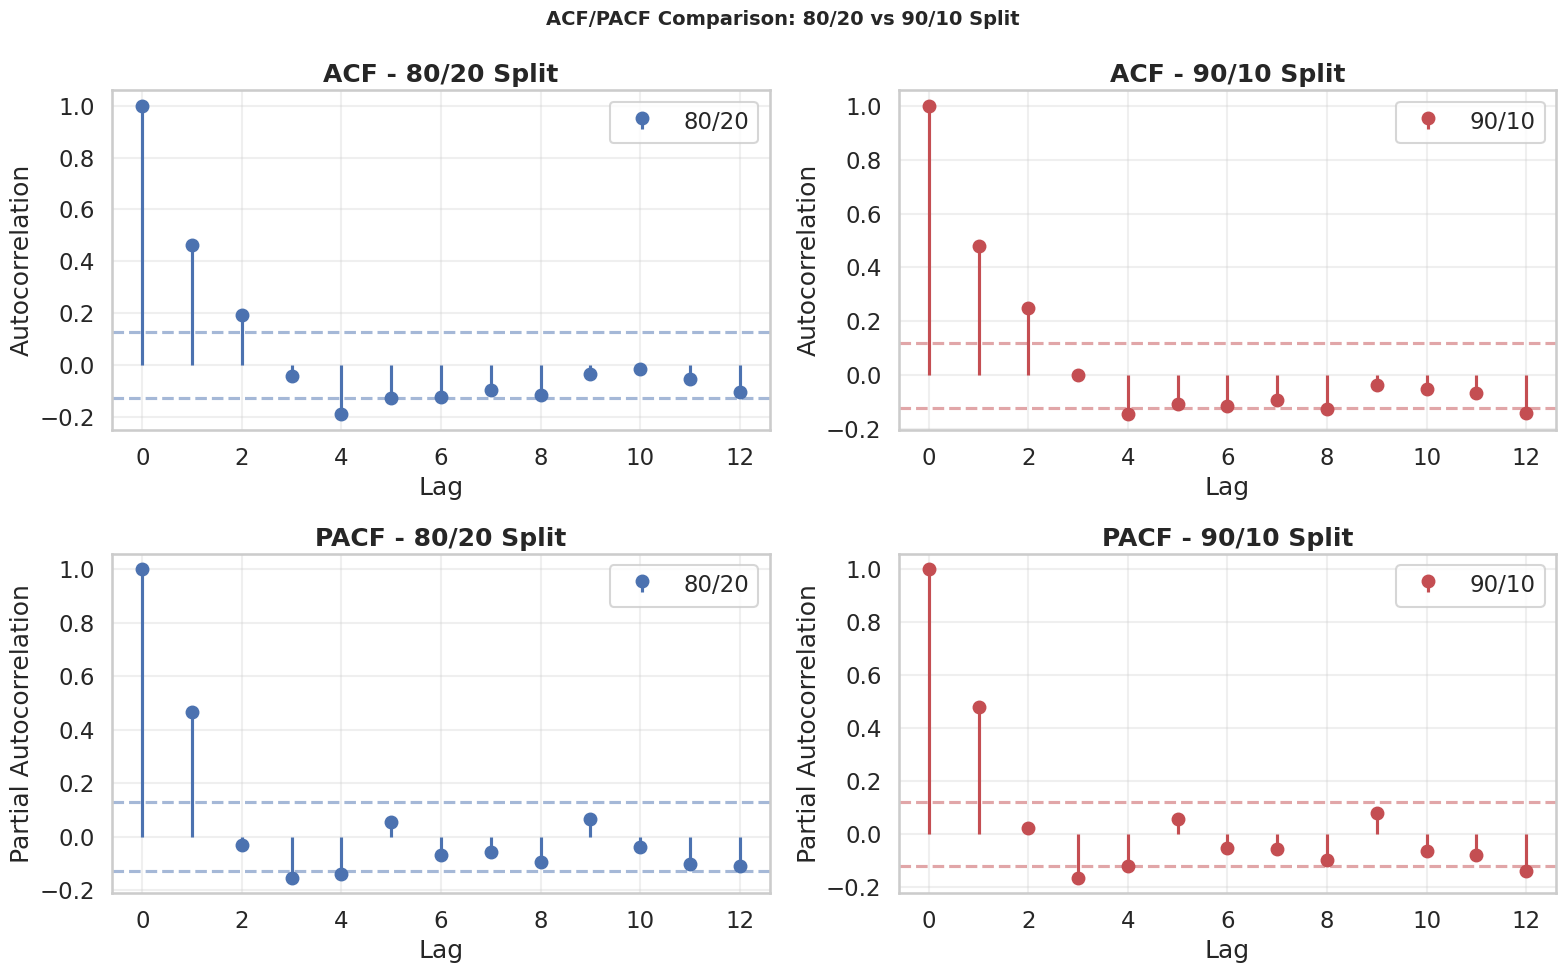

In [ ]:
# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('ACF/PACF Comparison: 80/20 vs 90/10 Split', fontsize=14, fontweight='bold')

# ACF comparison
axes[0, 0].stem(range(len(acf_values_80)), acf_values_80, linefmt='b-', markerfmt='bo',
                basefmt=' ', label='80/20')
axes[0, 0].axhline(y=conf_int_80, color='b', linestyle='--', alpha=0.5)
axes[0, 0].axhline(y=-conf_int_80, color='b', linestyle='--', alpha=0.5)
axes[0, 0].set_title('ACF - 80/20 Split', fontweight='bold')
axes[0, 0].set_xlabel('Lag')
axes[0, 0].set_ylabel('Autocorrelation')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

axes[0, 1].stem(range(len(acf_values_90)), acf_values_90, linefmt='r-', markerfmt='ro',
                basefmt=' ', label='90/10')
axes[0, 1].axhline(y=conf_int_90, color='r', linestyle='--', alpha=0.5)
axes[0, 1].axhline(y=-conf_int_90, color='r', linestyle='--', alpha=0.5)
axes[0, 1].set_title('ACF - 90/10 Split', fontweight='bold')
axes[0, 1].set_xlabel('Lag')
axes[0, 1].set_ylabel('Autocorrelation')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# PACF comparison
axes[1, 0].stem(range(len(pacf_values_80)), pacf_values_80, linefmt='b-', markerfmt='bo',
                basefmt=' ', label='80/20')
axes[1, 0].axhline(y=conf_int_80, color='b', linestyle='--', alpha=0.5)
axes[1, 0].axhline(y=-conf_int_80, color='b', linestyle='--', alpha=0.5)
axes[1, 0].set_title('PACF - 80/20 Split', fontweight='bold')
axes[1, 0].set_xlabel('Lag')
axes[1, 0].set_ylabel('Partial Autocorrelation')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

axes[1, 1].stem(range(len(pacf_values_90)), pacf_values_90, linefmt='r-', markerfmt='ro',
                basefmt=' ', label='90/10')
axes[1, 1].axhline(y=conf_int_90, color='r', linestyle='--', alpha=0.5)
axes[1, 1].axhline(y=-conf_int_90, color='r', linestyle='--', alpha=0.5)
axes[1, 1].set_title('PACF - 90/10 Split', fontweight='bold')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('Partial Autocorrelation')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\n" + "="*80)

 Understanding the Notation: ARIMA(p, d, q)

p = AR (autoregressive) order - number of lagged values of the series

d = degree of differencing (we used d=1 since we're analyzing first differences)

q = MA (moving average) order - number of lagged forecast errors

 ### ARIMA proposals + justifications

 Looking at the ACF and PACF plots as well as the significant lags (aside from lag 0), the proposed ARIMA candidates are:

 1. ARIMA (0, 1, 1)

 This is the simplest model, and would make sense to use because ACF lag 1 is significantly higher than the other lags. This can serve as a benchmark model

 2. ARIMA(1, 1, 1)

  the ACF shows a strong spike at lag 1 and then drops at lag 2, becomes mostly insignificant/negative after that. The PACF behaves similarly. The similar pattern between the two strongly suggests an ARMA (1, 1) structure. This is also a very commonly used model for modeling first-differenced economic data

 3. ARIMA (0, 1, 2)

  The ACF shows a significant spike at lags 1 and 2, then cuts off. The PACF gradually decays with lags 1, 3, 4 being significant without a clear cutoff in some plots. This could represent how shocks affect the UE rate. This could suggest an MA(2) process.

Overall, both the ACF and PACF plots for both splits show that lag 1 has the strongest correlation aside from lag 0. I will test the 3 proposed models in the order shown above.



### 13. Estimation and Model Selection (6 pts)

Fit candidate models and select a final specification using information criteria and diagnostics.

#### 80/20 split

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

In [ ]:
print("\n" + "="*80)
print("ARIMA MODEL FITTING AND SELECTION - 80/20 SPLIT")
print("="*80 + "\n")

# Prepare data for modeling - use original series (not differenced)
# ARIMA will handle differencing internally
train_series_80 = train_80['urate']
test_series_80 = test_80['urate']

print(f"Training observations: {len(train_series_80)}")
print(f"Testing observations: {len(test_series_80)}")
print(f"Training period: {train_series_80.index[0]} to {train_series_80.index[-1]}")
print(f"Testing period: {test_series_80.index[0]} to {test_series_80.index[-1]}\n")

# Define candidate models
candidate_models_80 = [
    (0, 1, 1),  # ARIMA(0, 1, 1)
    (1, 1, 1),  # ARIMA(1, 1, 1)
    (0, 1, 2)   # ARIMA(0, 1, 2)
]

# Store results
results_80 = {}
fitted_models_80 = {}


ARIMA MODEL FITTING AND SELECTION - 80/20 SPLIT

Training observations: 233
Testing observations: 59
Training period: 1948-01-01 00:00:00 to 2006-01-01 00:00:00
Testing period: 2006-04-01 00:00:00 to 2020-10-01 00:00:00



Fitting the 3 candidate ARIMA models

In [ ]:
print("="*80)
print("FITTING CANDIDATE MODELS - 80/20 SPLIT")
print("="*80 + "\n")

# Fit each candidate model
for order in candidate_models_80:
    p, d, q = order
    model_name = f"ARIMA({p},{d},{q})"

    print(f"\n{'='*60}")
    print(f"Fitting {model_name}")
    print(f"{'='*60}\n")

    try:
        # Fit model
        model = ARIMA(train_series_80, order=order)
        fitted_model = model.fit()

        # Store fitted model
        fitted_models_80[model_name] = fitted_model

        # Extract key statistics
        aic = fitted_model.aic
        bic = fitted_model.bic
        hqic = fitted_model.hqic
        llf = fitted_model.llf

        # Get residuals
        residuals = fitted_model.resid

        # Residual diagnostics
        resid_mean = np.mean(residuals)
        resid_std = np.std(residuals)
        resid_skew = stats.skew(residuals)
        resid_kurtosis = stats.kurtosis(residuals)

        # Ljung-Box test for residual autocorrelation (up to 10 lags)
        lb_test = acorr_ljungbox(residuals, lags=10, return_df=True)
        lb_pvalue_min = lb_test['lb_pvalue'].min()  # Minimum p-value across lags

        # Normality test (Jarque-Bera)
        jb_stat, jb_pvalue = stats.jarque_bera(residuals)

        # Store results
        results_80[model_name] = {
            'order': order,
            'aic': aic,
            'bic': bic,
            'hqic': hqic,
            'llf': llf,
            'resid_mean': resid_mean,
            'resid_std': resid_std,
            'resid_skew': resid_skew,
            'resid_kurtosis': resid_kurtosis,
            'lb_pvalue_min': lb_pvalue_min,
            'jb_stat': jb_stat,
            'jb_pvalue': jb_pvalue,
            'residuals': residuals
        }

        # Print summary
        print(f"Model: {model_name}")
        print(f"  AIC: {aic:.4f}")
        print(f"  BIC: {bic:.4f}")
        print(f"  HQIC: {hqic:.4f}")
        print(f"  Log-Likelihood: {llf:.4f}")
        print(f"\nResidual Statistics:")
        print(f"  Mean: {resid_mean:.6f}")
        print(f"  Std Dev: {resid_std:.4f}")
        print(f"  Skewness: {resid_skew:.4f}")
        print(f"  Kurtosis: {resid_kurtosis:.4f}")
        print(f"\nDiagnostic Tests:")
        print(f"  Ljung-Box min p-value (lags 1-10): {lb_pvalue_min:.4f}")
        print(f"  Jarque-Bera test statistic: {jb_stat:.4f}")
        print(f"  Jarque-Bera p-value: {jb_pvalue:.4f}")

        # Print model summary
        print(f"\n{fitted_model.summary()}")

    except Exception as e:
        print(f"Error fitting {model_name}: {e}")
        results_80[model_name] = None


FITTING CANDIDATE MODELS - 80/20 SPLIT


Fitting ARIMA(0,1,1)

Model: ARIMA(0,1,1)
  AIC: 230.3594
  BIC: 237.2528
  HQIC: 233.1394
  Log-Likelihood: -113.1797

Residual Statistics:
  Mean: 0.018224
  Std Dev: 0.4517
  Skewness: 2.1751
  Kurtosis: 14.7773

Diagnostic Tests:
  Ljung-Box min p-value (lags 1-10): 0.0182
  Jarque-Bera test statistic: 2303.7193
  Jarque-Bera p-value: 0.0000

                               SARIMAX Results                                
Dep. Variable:                  urate   No. Observations:                  233
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -113.180
Date:                Mon, 02 Feb 2026   AIC                            230.359
Time:                        03:51:09   BIC                            237.253
Sample:                    01-01-1948   HQIC                           233.139
                         - 01-01-2006                                         
Covariance Type:                  opg                    

Comparing models

In [ ]:
# Model comparison table
print("\n" + "="*80)
print("MODEL COMPARISON TABLE - 80/20 SPLIT")
print("="*80 + "\n")

print(f"{'Model':<15} {'AIC':<12} {'BIC':<12} {'HQIC':<12} {'LB p-val':<12} {'JB p-val':<12}")
print("-" * 80)

for model_name in results_80.keys():
    if results_80[model_name] is not None:
        r = results_80[model_name]
        print(f"{model_name:<15} {r['aic']:<12.4f} {r['bic']:<12.4f} {r['hqic']:<12.4f} "
              f"{r['lb_pvalue_min']:<12.4f} {r['jb_pvalue']:<12.4f}")


MODEL COMPARISON TABLE - 80/20 SPLIT

Model           AIC          BIC          HQIC         LB p-val     JB p-val    
--------------------------------------------------------------------------------
ARIMA(0,1,1)    230.3594     237.2528     233.1394     0.0182       0.0000      
ARIMA(1,1,1)    222.4830     232.8232     226.6531     0.0467       0.0000      
ARIMA(0,1,2)    221.0939     231.4341     225.2640     0.0387       0.0000      


Finding best model by AIC

In [ ]:
# Find best model by AIC
best_model_80 = min(results_80.items(), key=lambda x: x[1]['aic'] if x[1] is not None else float('inf'))
best_model_name_80 = best_model_80[0]
best_model_aic_80 = best_model_80[1]['aic']

print(f"\n{'='*80}")
print(f"BEST MODEL BY AIC (80/20): {best_model_name_80}")
print(f"AIC: {best_model_aic_80:.4f}")
print(f"{'='*80}\n")



BEST MODEL BY AIC (80/20): ARIMA(0,1,2)
AIC: 221.0939



#### 90/10 split

Fitting the 3 candidate ARIMA models

In [ ]:
# ============================================================================
# MODEL FITTING AND SELECTION - 90/10 SPLIT
# ============================================================================

print("\n" + "="*80)
print("ARIMA MODEL FITTING AND SELECTION - 90/10 SPLIT")
print("="*80 + "\n")

# Prepare data for modeling
train_series_90 = train_90['urate']
test_series_90 = test_90['urate']

print(f"Training observations: {len(train_series_90)}")
print(f"Testing observations: {len(test_series_90)}")
print(f"Training period: {train_series_90.index[0]} to {train_series_90.index[-1]}")
print(f"Testing period: {test_series_90.index[0]} to {test_series_90.index[-1]}\n")

# Define candidate models (same as 80/20)
candidate_models_90 = [
    (0, 1, 1),  # ARIMA(0, 1, 1)
    (1, 1, 1),  # ARIMA(1, 1, 1)
    (0, 1, 2)   # ARIMA(0, 1, 2)
]

# Store results
results_90 = {}
fitted_models_90 = {}


ARIMA MODEL FITTING AND SELECTION - 90/10 SPLIT

Training observations: 262
Testing observations: 30
Training period: 1948-01-01 00:00:00 to 2013-04-01 00:00:00
Testing period: 2013-07-01 00:00:00 to 2020-10-01 00:00:00



In [ ]:
print("="*80)
print("FITTING CANDIDATE MODELS - 90/10 SPLIT")
print("="*80 + "\n")

# Fit each candidate model
for order in candidate_models_90:
    p, d, q = order
    model_name = f"ARIMA({p},{d},{q})"

    print(f"\n{'='*60}")
    print(f"Fitting {model_name}")
    print(f"{'='*60}\n")

    try:
        # Fit model
        model = ARIMA(train_series_90, order=order)
        fitted_model = model.fit()

        # Store fitted model
        fitted_models_90[model_name] = fitted_model

        # Extract key statistics
        aic = fitted_model.aic
        bic = fitted_model.bic
        hqic = fitted_model.hqic
        llf = fitted_model.llf

        # Get residuals
        residuals = fitted_model.resid

        # Residual diagnostics
        resid_mean = np.mean(residuals)
        resid_std = np.std(residuals)
        resid_skew = stats.skew(residuals)
        resid_kurtosis = stats.kurtosis(residuals)

        # Ljung-Box test for residual autocorrelation
        lb_test = acorr_ljungbox(residuals, lags=10, return_df=True)
        lb_pvalue_min = lb_test['lb_pvalue'].min()

        # Normality test (Jarque-Bera)
        jb_stat, jb_pvalue = stats.jarque_bera(residuals)

        # Store results
        results_90[model_name] = {
            'order': order,
            'aic': aic,
            'bic': bic,
            'hqic': hqic,
            'llf': llf,
            'resid_mean': resid_mean,
            'resid_std': resid_std,
            'resid_skew': resid_skew,
            'resid_kurtosis': resid_kurtosis,
            'lb_pvalue_min': lb_pvalue_min,
            'jb_stat': jb_stat,
            'jb_pvalue': jb_pvalue,
            'residuals': residuals
        }

        # Print summary
        print(f"Model: {model_name}")
        print(f"  AIC: {aic:.4f}")
        print(f"  BIC: {bic:.4f}")
        print(f"  HQIC: {hqic:.4f}")
        print(f"  Log-Likelihood: {llf:.4f}")
        print(f"\nResidual Statistics:")
        print(f"  Mean: {resid_mean:.6f}")
        print(f"  Std Dev: {resid_std:.4f}")
        print(f"  Skewness: {resid_skew:.4f}")
        print(f"  Kurtosis: {resid_kurtosis:.4f}")
        print(f"\nDiagnostic Tests:")
        print(f"  Ljung-Box min p-value (lags 1-10): {lb_pvalue_min:.4f}")
        print(f"  Jarque-Bera test statistic: {jb_stat:.4f}")
        print(f"  Jarque-Bera p-value: {jb_pvalue:.4f}")

        # Print model summary
        print(f"\n{fitted_model.summary()}")

    except Exception as e:
        print(f"Error fitting {model_name}: {e}")
        results_90[model_name] = None


FITTING CANDIDATE MODELS - 90/10 SPLIT


Fitting ARIMA(0,1,1)

Model: ARIMA(0,1,1)
  AIC: 262.1502
  BIC: 269.2793
  HQIC: 265.0159
  Log-Likelihood: -129.0751

Residual Statistics:
  Mean: 0.023993
  Std Dev: 0.4477
  Skewness: 2.0451
  Kurtosis: 13.5598

Diagnostic Tests:
  Ljung-Box min p-value (lags 1-10): 0.0023
  Jarque-Bera test statistic: 2189.8513
  Jarque-Bera p-value: 0.0000

                               SARIMAX Results                                
Dep. Variable:                  urate   No. Observations:                  262
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -129.075
Date:                Mon, 02 Feb 2026   AIC                            262.150
Time:                        03:51:10   BIC                            269.279
Sample:                    01-01-1948   HQIC                           265.016
                         - 04-01-2013                                         
Covariance Type:                  opg                    

Comparing models

In [ ]:
# Model comparison table
print("\n" + "="*80)
print("MODEL COMPARISON TABLE - 90/10 SPLIT")
print("="*80 + "\n")

print(f"{'Model':<15} {'AIC':<12} {'BIC':<12} {'HQIC':<12} {'LB p-val':<12} {'JB p-val':<12}")
print("-" * 80)

for model_name in results_90.keys():
    if results_90[model_name] is not None:
        r = results_90[model_name]
        print(f"{model_name:<15} {r['aic']:<12.4f} {r['bic']:<12.4f} {r['hqic']:<12.4f} "
              f"{r['lb_pvalue_min']:<12.4f} {r['jb_pvalue']:<12.4f}")



MODEL COMPARISON TABLE - 90/10 SPLIT

Model           AIC          BIC          HQIC         LB p-val     JB p-val    
--------------------------------------------------------------------------------
ARIMA(0,1,1)    262.1502     269.2793     265.0159     0.0023       0.0000      
ARIMA(1,1,1)    247.5902     258.2838     251.8887     0.0237       0.0000      
ARIMA(0,1,2)    244.5237     255.2173     248.8222     0.0177       0.0000      


Finding best model by AIC

In [ ]:
# Find best model by AIC
best_model_90 = min(results_90.items(), key=lambda x: x[1]['aic'] if x[1] is not None else float('inf'))
best_model_name_90 = best_model_90[0]
best_model_aic_90 = best_model_90[1]['aic']

print(f"\n{'='*80}")
print(f"BEST MODEL BY AIC (90/10): {best_model_name_90}")
print(f"AIC: {best_model_aic_90:.4f}")
print(f"{'='*80}\n")



BEST MODEL BY AIC (90/10): ARIMA(0,1,2)
AIC: 244.5237



Final comparison across split. **Additionally examining residuals to confirm model selection**


FINAL MODEL SELECTION COMPARISON

Best Models Selected:
  80/20 Split: ARIMA(0,1,2) (AIC: 221.0939)
  90/10 Split: ARIMA(0,1,2) (AIC: 244.5237)

Model Selection Consistency:
  ✓ Both splits select the same model: ARIMA(0,1,2)
  This indicates robust model selection across different training periods.

Residual Diagnostics Comparison (Best Models):
  80/20 - Ljung-Box p-value: 0.0387, Jarque-Bera p-value: 0.0000
  90/10 - Ljung-Box p-value: 0.0177, Jarque-Bera p-value: 0.0000


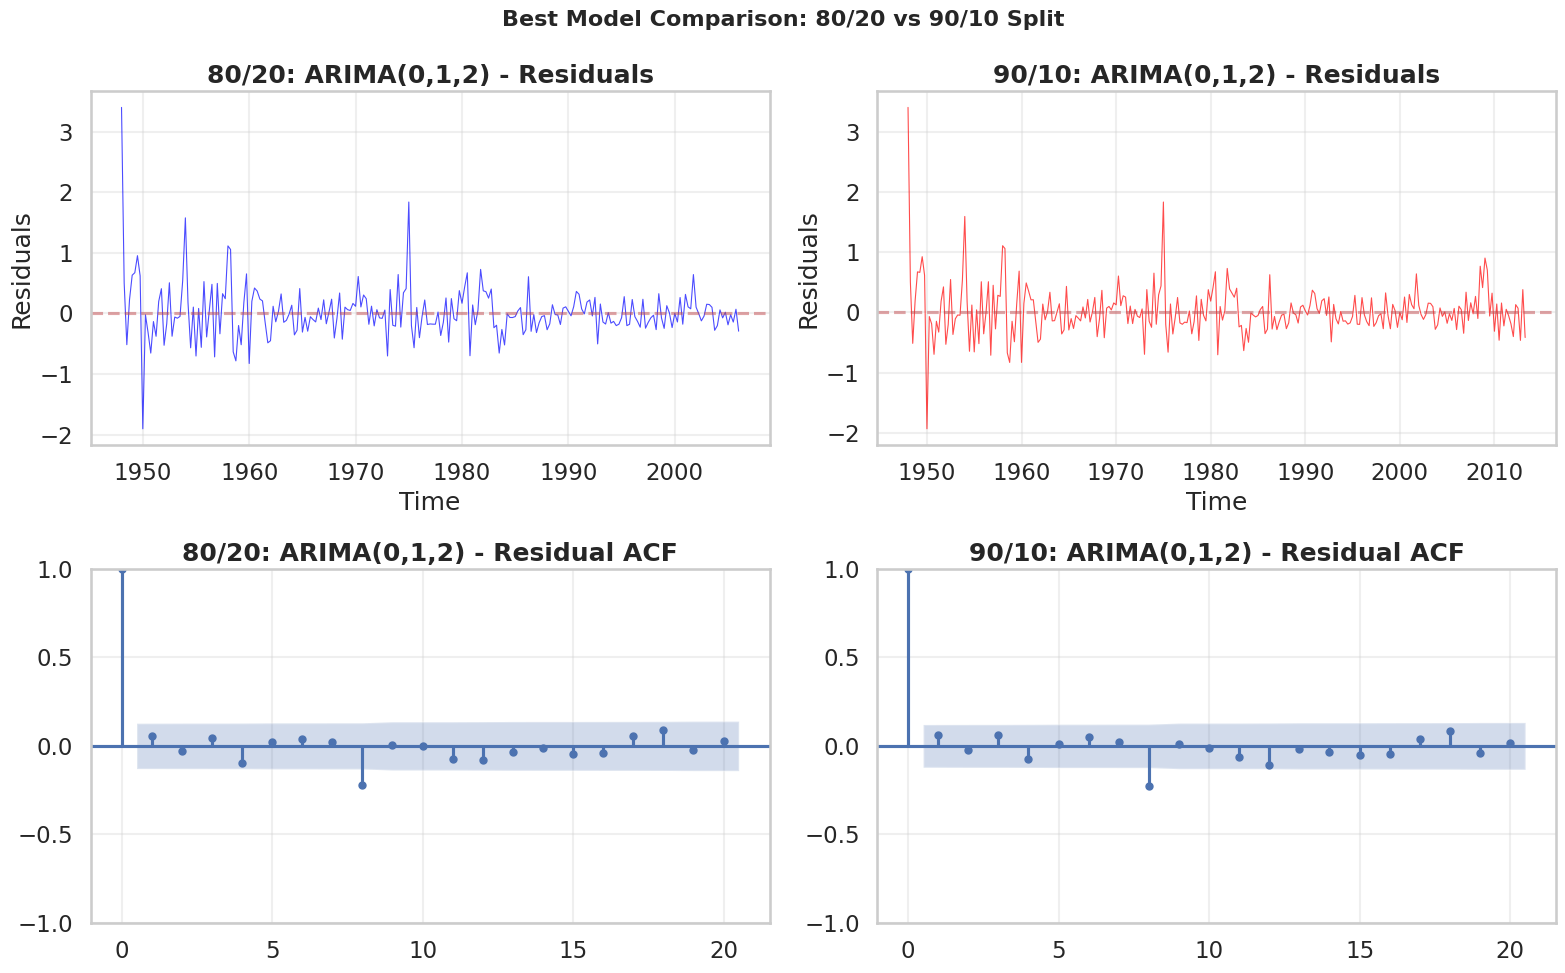


Final selected models are stored in:
  fitted_models_80['ARIMA(0,1,2)'] for 80/20 split
  fitted_models_90['ARIMA(0,1,2)'] for 90/10 split


In [ ]:
# ============================================================================
# FINAL COMPARISON ACROSS SPLITS
# ============================================================================
best_results_90 = results_90[best_model_name_90]
best_results_80 = results_80[best_model_name_80]

print("\n" + "="*80)
print("FINAL MODEL SELECTION COMPARISON")
print("="*80 + "\n")

print("Best Models Selected:")
print(f"  80/20 Split: {best_model_name_80} (AIC: {best_model_aic_80:.4f})")
print(f"  90/10 Split: {best_model_name_90} (AIC: {best_model_aic_90:.4f})")

print("\nModel Selection Consistency:")
if best_model_name_80 == best_model_name_90:
    print(f"  ✓ Both splits select the same model: {best_model_name_80}")
    print(f"  This indicates robust model selection across different training periods.")
else:
    print(f"  ✗ Different models selected across splits")
    print(f"  80/20 prefers: {best_model_name_80}")
    print(f"  90/10 prefers: {best_model_name_90}")

print("\nResidual Diagnostics Comparison (Best Models):")
print(f"  80/20 - Ljung-Box p-value: {best_results_80['lb_pvalue_min']:.4f}, "
      f"Jarque-Bera p-value: {best_results_80['jb_pvalue']:.4f}")
print(f"  90/10 - Ljung-Box p-value: {best_results_90['lb_pvalue_min']:.4f}, "
      f"Jarque-Bera p-value: {best_results_90['jb_pvalue']:.4f}")

# Side-by-side comparison plot of best models
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Best Model Comparison: 80/20 vs 90/10 Split', fontsize=16, fontweight='bold')

# 80/20 residuals over time
axes[0, 0].plot(best_results_80['residuals'], linewidth=0.8, color='blue', alpha=0.7)
axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0, 0].set_title(f'80/20: {best_model_name_80} - Residuals', fontweight='bold')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].grid(True, alpha=0.3)

# 90/10 residuals over time
axes[0, 1].plot(best_results_90['residuals'], linewidth=0.8, color='red', alpha=0.7)
axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0, 1].set_title(f'90/10: {best_model_name_90} - Residuals', fontweight='bold')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].grid(True, alpha=0.3)

# 80/20 residual ACF
plot_acf(best_results_80['residuals'], lags=20, ax=axes[1, 0], alpha=0.05)
axes[1, 0].set_title(f'80/20: {best_model_name_80} - Residual ACF', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 90/10 residual ACF
plot_acf(best_results_90['residuals'], lags=20, ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title(f'90/10: {best_model_name_90} - Residual ACF', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFinal selected models are stored in:")
print(f"  fitted_models_80['{best_model_name_80}'] for 80/20 split")
print(f"  fitted_models_90['{best_model_name_90}'] for 90/10 split")

### ARIMA(0, 1, 2) was chosen to best fit the model

Understanding the Notation: ARIMA(0, 1, 2)

0 = AR (autoregressive) order - number of lagged values of the series

1 = degree of differencing (we used d=1 since we're analyzing first differences)

2 = MA (moving average) order - number of lagged forecast errors

### 14. Residual Diagnostics (5 pts)

Repeat the diagnostic checks used for GDP. Summarize residual behavior and remaining violations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import seaborn as sns

#### 80/20 split

In [ ]:
print("\n" + "="*80)
print("COMPREHENSIVE RESIDUAL ANALYSIS - ARIMA(0, 1, 2) - 80/20 SPLIT")
print("="*80 + "\n")

# Get the fitted model and residuals
final_model_80 = fitted_models_80['ARIMA(0,1,2)']
residuals_80 = final_model_80.resid

print(f"Model: ARIMA(0, 1, 2)")
print(f"Number of residuals: {len(residuals_80)}")
print(f"Period: {residuals_80.index[0]} to {residuals_80.index[-1]}\n")



COMPREHENSIVE RESIDUAL ANALYSIS - ARIMA(0, 1, 2) - 80/20 SPLIT

Model: ARIMA(0, 1, 2)
Number of residuals: 233
Period: 1948-01-01 00:00:00 to 2006-01-01 00:00:00



In [ ]:
# ============================================================================
# 1. RESIDUAL STATISTICS
# ============================================================================

print("="*80)
print("RESIDUAL STATISTICS")
print("="*80 + "\n")

resid_mean = np.mean(residuals_80)
resid_median = np.median(residuals_80)
resid_std = np.std(residuals_80)
resid_var = np.var(residuals_80)
resid_min = np.min(residuals_80)
resid_max = np.max(residuals_80)
resid_range = resid_max - resid_min
resid_skew = stats.skew(residuals_80)
resid_kurtosis = stats.kurtosis(residuals_80)

print(f"Mean:             {resid_mean:.6f}")
print(f"Median:           {resid_median:.6f}")
print(f"Std Deviation:    {resid_std:.4f}")
print(f"Variance:         {resid_var:.4f}")
print(f"Min:              {resid_min:.4f}")
print(f"Max:              {resid_max:.4f}")
print(f"Range:            {resid_range:.4f}")
print(f"Skewness:         {resid_skew:.4f}")
print(f"Excess Kurtosis:  {resid_kurtosis:.4f}")

# ============================================================================
# 2. TIME PLOT OF RESIDUALS
# ============================================================================


RESIDUAL STATISTICS

Mean:             0.017495
Median:           -0.026915
Std Deviation:    0.4435
Variance:         0.1967
Min:              -1.9056
Max:              3.4000
Range:            5.3056
Skewness:         2.0845
Excess Kurtosis:  15.9784


Time plot of residuals


TIME SERIES PLOT OF RESIDUALS



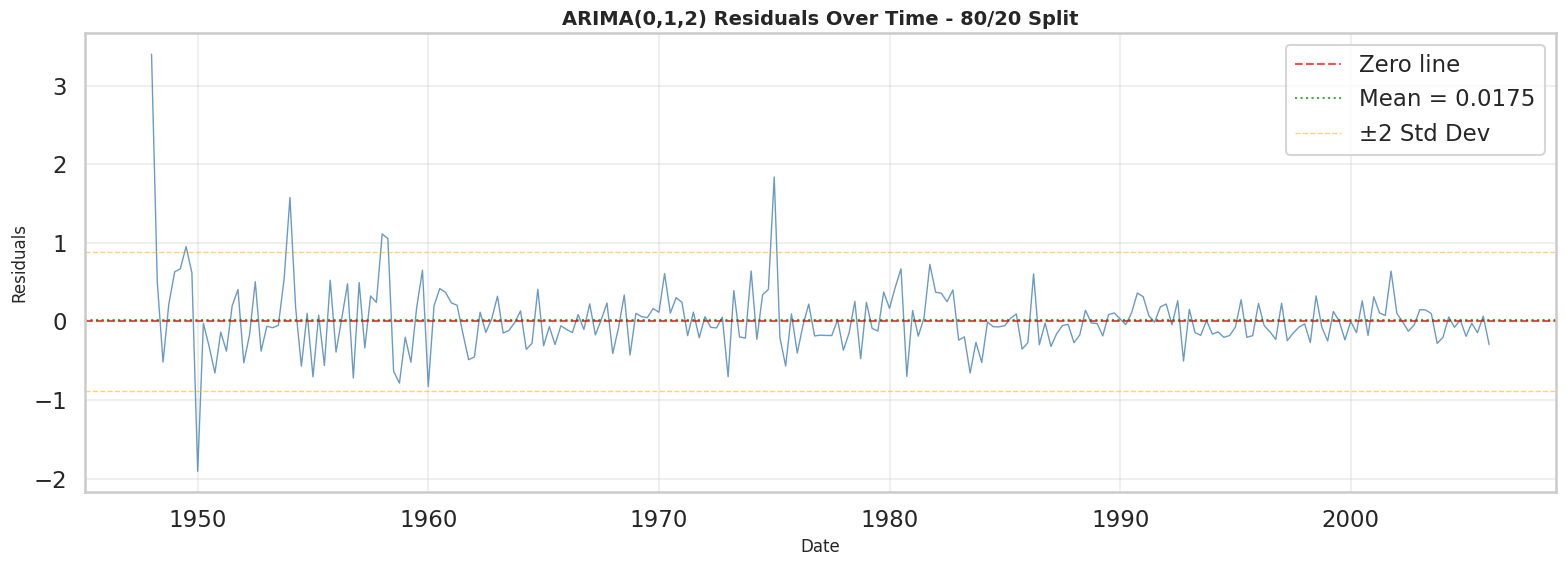

Outliers beyond ±2 std dev: 7 (3.00%)
  Expected for normal distribution: ~5%
Outliers beyond ±3 std dev: 4 (1.72%)
  Expected for normal distribution: ~0.3%


In [ ]:
print("\n" + "="*80)
print("TIME SERIES PLOT OF RESIDUALS")
print("="*80 + "\n")

fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(residuals_80.index, residuals_80.values, linewidth=1, color='steelblue', alpha=0.8)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Zero line')
ax.axhline(y=resid_mean, color='green', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Mean = {resid_mean:.4f}')

# Add ±2 std deviation bands
ax.axhline(y=2*resid_std, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='±2 Std Dev')
ax.axhline(y=-2*resid_std, color='orange', linestyle='--', linewidth=1, alpha=0.5)

ax.set_title('ARIMA(0,1,2) Residuals Over Time - 80/20 Split', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Residuals', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Count outliers (beyond ±2 std dev)
outliers_2std = np.sum(np.abs(residuals_80) > 2*resid_std)
outliers_3std = np.sum(np.abs(residuals_80) > 3*resid_std)
outlier_pct_2std = (outliers_2std / len(residuals_80)) * 100
outlier_pct_3std = (outliers_3std / len(residuals_80)) * 100

print(f"Outliers beyond ±2 std dev: {outliers_2std} ({outlier_pct_2std:.2f}%)")
print(f"  Expected for normal distribution: ~5%")
print(f"Outliers beyond ±3 std dev: {outliers_3std} ({outlier_pct_3std:.2f}%)")
print(f"  Expected for normal distribution: ~0.3%")


Histogram/density plot


HISTOGRAM AND DENSITY PLOT



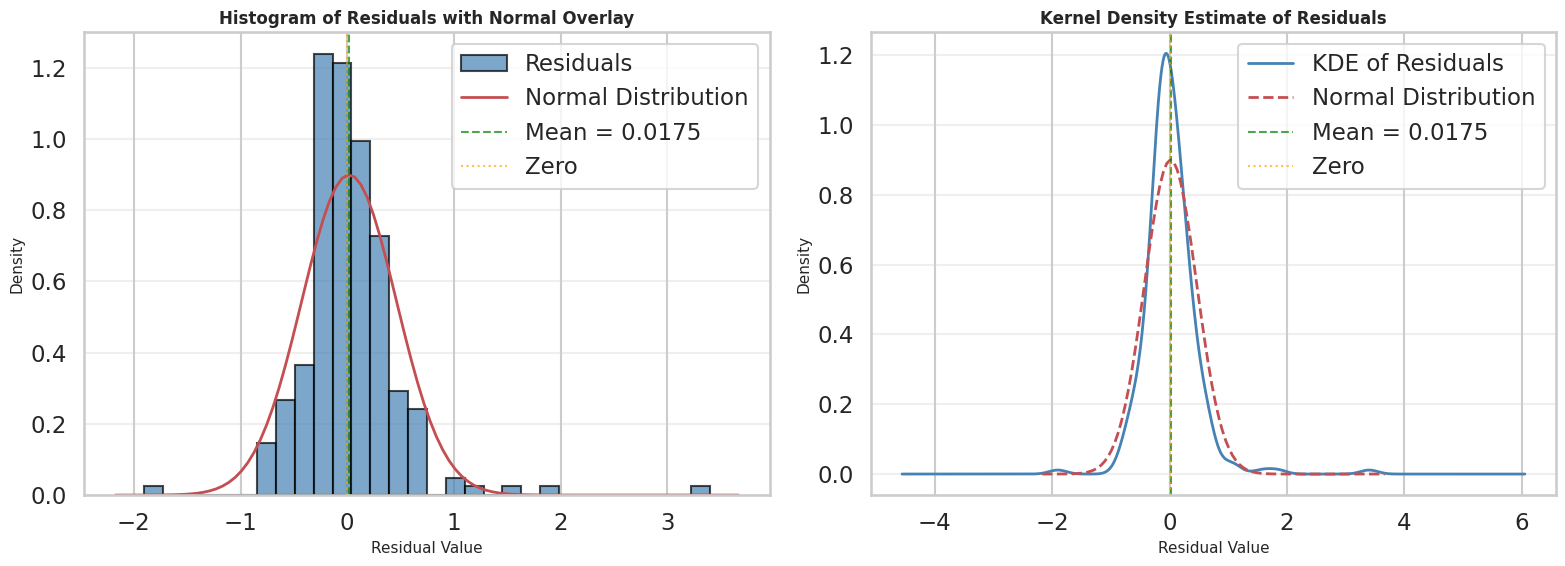

In [ ]:
print("\n" + "="*80)
print("HISTOGRAM AND DENSITY PLOT")
print("="*80 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram with normal distribution overlay
axes[0].hist(residuals_80, bins=30, density=True, alpha=0.7, color='steelblue',
             edgecolor='black', label='Residuals')

# Overlay normal distribution
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
normal_dist = stats.norm.pdf(x, resid_mean, resid_std)
axes[0].plot(x, normal_dist, 'r-', linewidth=2, label='Normal Distribution')

axes[0].axvline(x=resid_mean, color='green', linestyle='--', linewidth=1.5,
                alpha=0.7, label=f'Mean = {resid_mean:.4f}')
axes[0].axvline(x=0, color='orange', linestyle=':', linewidth=1.5,
                alpha=0.7, label='Zero')

axes[0].set_title('Histogram of Residuals with Normal Overlay', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Residual Value', fontsize=11)
axes[0].set_ylabel('Density', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Kernel Density Estimate
residuals_80.plot(kind='density', ax=axes[1], linewidth=2, color='steelblue', label='KDE of Residuals')
axes[1].plot(x, normal_dist, 'r--', linewidth=2, label='Normal Distribution')
axes[1].axvline(x=resid_mean, color='green', linestyle='--', linewidth=1.5,
                alpha=0.7, label=f'Mean = {resid_mean:.4f}')
axes[1].axvline(x=0, color='orange', linestyle=':', linewidth=1.5,
                alpha=0.7, label='Zero')

axes[1].set_title('Kernel Density Estimate of Residuals', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Residual Value', fontsize=11)
axes[1].set_ylabel('Density', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Residual ACF


AUTOCORRELATION ANALYSIS



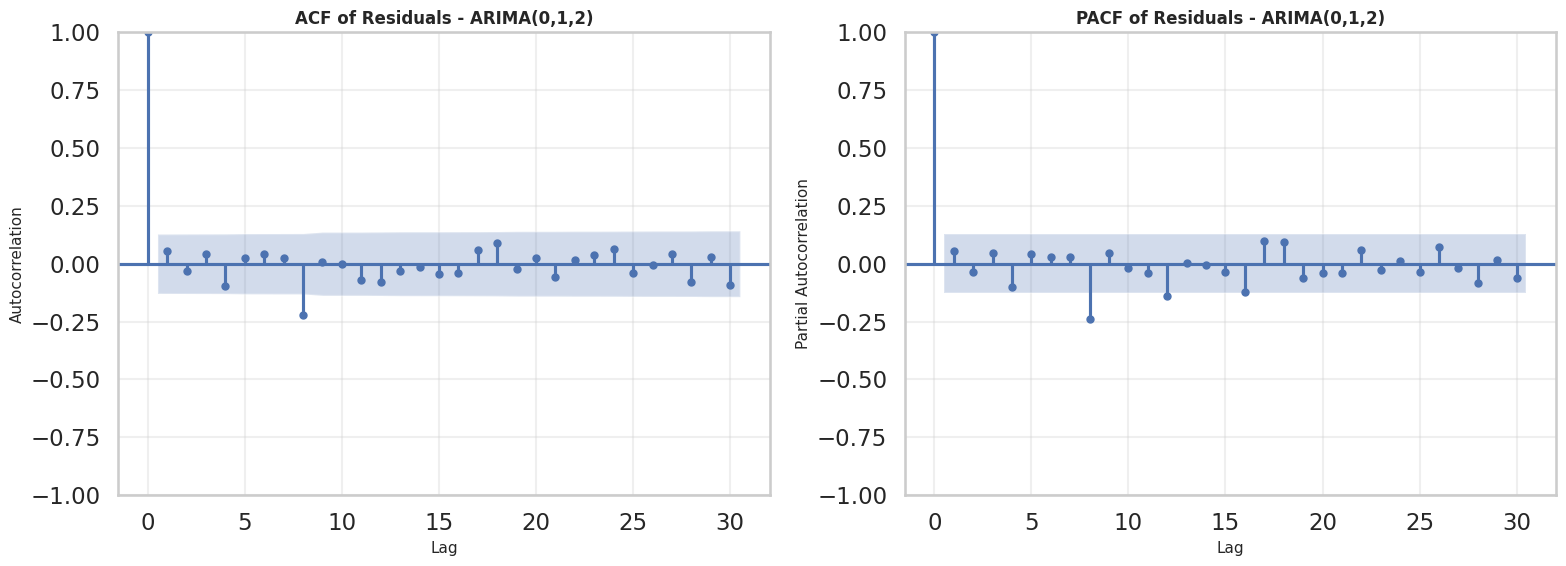

95% Confidence interval for ACF: ±0.1284

ACF Values (first 20 lags):
Lag    ACF        Significant?   
-----------------------------------
1      0.0567     No             
2      -0.0306    No             
3      0.0438     No             
4      -0.0952    No             
5      0.0240     No             
6      0.0410     No             
7      0.0226     No             
8      -0.2220    Yes            
9      0.0070     No             
10     0.0009     No             
11     -0.0718    No             
12     -0.0789    No             
13     -0.0318    No             
14     -0.0138    No             
15     -0.0460    No             
16     -0.0384    No             
17     0.0579     No             
18     0.0877     No             
19     -0.0243    No             
20     0.0267     No             

Number of significant lags (excluding lag 0): 1
Significant lags: [8]


In [ ]:
# ============================================================================
# 5. RESIDUAL ACF AND PACF
# ============================================================================

print("\n" + "="*80)
print("AUTOCORRELATION ANALYSIS")
print("="*80 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ACF plot
plot_acf(residuals_80, lags=30, ax=axes[0], alpha=0.05)
axes[0].set_title('ACF of Residuals - ARIMA(0,1,2)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Lag', fontsize=11)
axes[0].set_ylabel('Autocorrelation', fontsize=11)
axes[0].grid(True, alpha=0.3)

# PACF plot
plot_pacf(residuals_80, lags=30, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title('PACF of Residuals - ARIMA(0,1,2)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Lag', fontsize=11)
axes[1].set_ylabel('Partial Autocorrelation', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compute ACF values numerically
acf_values = acf(residuals_80, nlags=20, fft=False)
conf_interval = 1.96 / np.sqrt(len(residuals_80))

print(f"95% Confidence interval for ACF: ±{conf_interval:.4f}\n")
print("ACF Values (first 20 lags):")
print(f"{'Lag':<6} {'ACF':<10} {'Significant?':<15}")
print("-" * 35)

significant_lags = []
for i, val in enumerate(acf_values):
    if i == 0:
        continue
    is_sig = 'Yes' if abs(val) > conf_interval else 'No'
    if abs(val) > conf_interval:
        significant_lags.append(i)
    print(f"{i:<6} {val:<10.4f} {is_sig:<15}")

print(f"\nNumber of significant lags (excluding lag 0): {len(significant_lags)}")
if significant_lags:
    print(f"Significant lags: {significant_lags}")
else:
    print("No significant autocorrelation detected")


Portmanteau tests - Ljung box across multiple lags

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print("\n" + "="*80)
print("LJUNG-BOX PORTMANTEAU TEST")
print("="*80 + "\n")

test_lags = [5, 10, 15, 20, 25, 30]

print("Testing for autocorrelation at multiple lag lengths:")
print(f"{'Lags':<8} {'LB Statistic':<15} {'p-value':<12} {'Result':<20}")
print("-" * 60)

lb_results = []

for lag in test_lags:
    lb_df = acorr_ljungbox(residuals_80, lags=lag, return_df=True)

    # Take the result for the highest lag
    lb_stat = lb_df['lb_stat'].iloc[-1]
    lb_pval = lb_df['lb_pvalue'].iloc[-1]

    result = 'No autocorr (✓)' if lb_pval > 0.05 else 'Autocorr detected (✗)'

    lb_results.append({
        'lags': lag,
        'statistic': lb_stat,
        'pvalue': lb_pval
    })

    print(f"{lag:<8} {lb_stat:<15.4f} {lb_pval:<12.4f} {result:<20}")



LJUNG-BOX PORTMANTEAU TEST

Testing for autocorrelation at multiple lag lengths:
Lags     LB Statistic    p-value      Result              
------------------------------------------------------------
5        3.7442          0.5868       No autocorr (✓)     
10       16.2806         0.0919       No autocorr (✓)     
15       19.9275         0.1747       No autocorr (✓)     
20       23.4433         0.2676       No autocorr (✓)     
25       26.1872         0.3977       No autocorr (✓)     
30       30.8460         0.4230       No autocorr (✓)     


#### 90/10 split

In [ ]:
print("\n" + "="*80)
print("COMPREHENSIVE RESIDUAL ANALYSIS - ARIMA(0, 1, 2) - 90/10 SPLIT")
print("="*80 + "\n")

# Get the fitted model and residuals
final_model_90 = fitted_models_90['ARIMA(0,1,2)']
residuals_90 = final_model_90.resid

print(f"Model: ARIMA(0, 1, 2)")
print(f"Number of residuals: {len(residuals_90)}")
print(f"Period: {residuals_90.index[0]} to {residuals_90.index[-1]}\n")

# RESIDUAL STATISTICS
print("="*80)
print("RESIDUAL STATISTICS")
print("="*80 + "\n")

resid_mean_90 = np.mean(residuals_90)
resid_median_90 = np.median(residuals_90)
resid_std_90 = np.std(residuals_90)
resid_var_90 = np.var(residuals_90)
resid_min_90 = np.min(residuals_90)
resid_max_90 = np.max(residuals_90)
resid_range_90 = resid_max_90 - resid_min_90
resid_skew_90 = stats.skew(residuals_90)
resid_kurtosis_90 = stats.kurtosis(residuals_90)

print(f"Mean:             {resid_mean_90:.6f}")
print(f"Median:           {resid_median_90:.6f}")
print(f"Std Deviation:    {resid_std_90:.4f}")
print(f"Variance:         {resid_var_90:.4f}")
print(f"Min:              {resid_min_90:.4f}")
print(f"Max:              {resid_max_90:.4f}")
print(f"Range:            {resid_range_90:.4f}")
print(f"Skewness:         {resid_skew_90:.4f}")
print(f"Excess Kurtosis:  {resid_kurtosis_90:.4f}")


COMPREHENSIVE RESIDUAL ANALYSIS - ARIMA(0, 1, 2) - 90/10 SPLIT

Model: ARIMA(0, 1, 2)
Number of residuals: 262
Period: 1948-01-01 00:00:00 to 2013-04-01 00:00:00

RESIDUAL STATISTICS

Mean:             0.021923
Median:           -0.029185
Std Deviation:    0.4350
Variance:         0.1892
Min:              -1.9336
Max:              3.4000
Range:            5.3336
Skewness:         1.9687
Excess Kurtosis:  15.4229


Time plot


TIME SERIES PLOT OF RESIDUALS



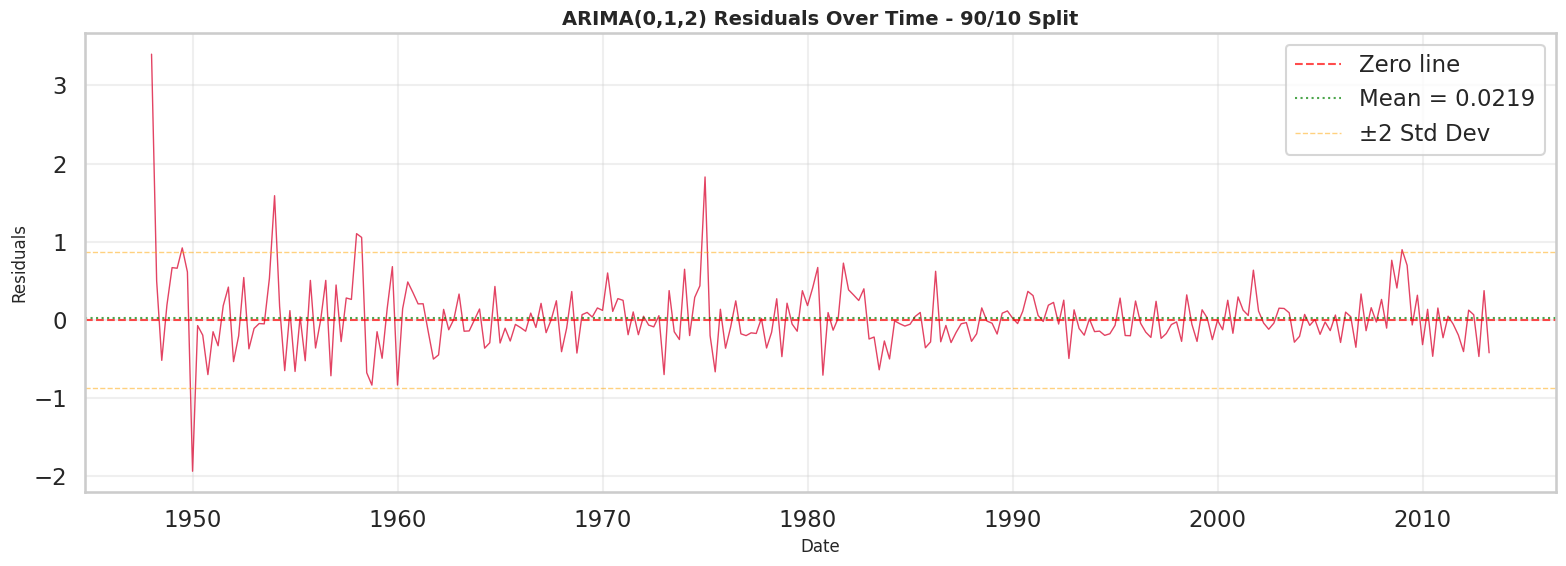

Outliers beyond ±2 std dev: 8 (3.05%)
  Expected for normal distribution: ~5%
Outliers beyond ±3 std dev: 4 (1.53%)
  Expected for normal distribution: ~0.3%


In [ ]:
print("\n" + "="*80)
print("TIME SERIES PLOT OF RESIDUALS")
print("="*80 + "\n")

fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(residuals_90.index, residuals_90.values, linewidth=1, color='crimson', alpha=0.8)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Zero line')
ax.axhline(y=resid_mean_90, color='green', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Mean = {resid_mean_90:.4f}')
ax.axhline(y=2*resid_std_90, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='±2 Std Dev')
ax.axhline(y=-2*resid_std_90, color='orange', linestyle='--', linewidth=1, alpha=0.5)

ax.set_title('ARIMA(0,1,2) Residuals Over Time - 90/10 Split', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Residuals', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

outliers_2std_90 = np.sum(np.abs(residuals_90) > 2*resid_std_90)
outliers_3std_90 = np.sum(np.abs(residuals_90) > 3*resid_std_90)
outlier_pct_2std_90 = (outliers_2std_90 / len(residuals_90)) * 100
outlier_pct_3std_90 = (outliers_3std_90 / len(residuals_90)) * 100

print(f"Outliers beyond ±2 std dev: {outliers_2std_90} ({outlier_pct_2std_90:.2f}%)")
print(f"  Expected for normal distribution: ~5%")
print(f"Outliers beyond ±3 std dev: {outliers_3std_90} ({outlier_pct_3std_90:.2f}%)")
print(f"  Expected for normal distribution: ~0.3%")


Histogram + density plot


HISTOGRAM AND DENSITY PLOT



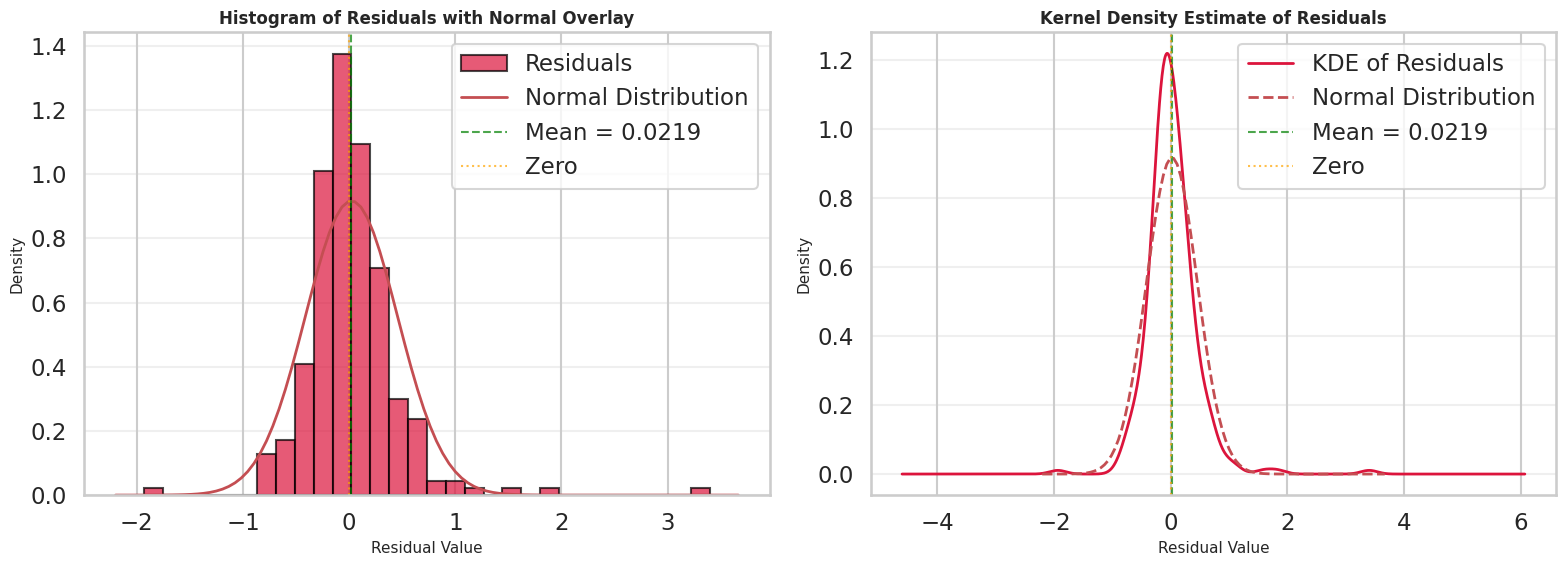

In [ ]:
# HISTOGRAM AND DENSITY
print("\n" + "="*80)
print("HISTOGRAM AND DENSITY PLOT")
print("="*80 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(residuals_90, bins=30, density=True, alpha=0.7, color='crimson',
             edgecolor='black', label='Residuals')

xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
normal_dist_90 = stats.norm.pdf(x, resid_mean_90, resid_std_90)
axes[0].plot(x, normal_dist_90, 'r-', linewidth=2, label='Normal Distribution')
axes[0].axvline(x=resid_mean_90, color='green', linestyle='--', linewidth=1.5,
                alpha=0.7, label=f'Mean = {resid_mean_90:.4f}')
axes[0].axvline(x=0, color='orange', linestyle=':', linewidth=1.5, alpha=0.7, label='Zero')

axes[0].set_title('Histogram of Residuals with Normal Overlay', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Residual Value', fontsize=11)
axes[0].set_ylabel('Density', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

residuals_90.plot(kind='density', ax=axes[1], linewidth=2, color='crimson', label='KDE of Residuals')
axes[1].plot(x, normal_dist_90, 'r--', linewidth=2, label='Normal Distribution')
axes[1].axvline(x=resid_mean_90, color='green', linestyle='--', linewidth=1.5,
                alpha=0.7, label=f'Mean = {resid_mean_90:.4f}')
axes[1].axvline(x=0, color='orange', linestyle=':', linewidth=1.5, alpha=0.7, label='Zero')

axes[1].set_title('Kernel Density Estimate of Residuals', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Residual Value', fontsize=11)
axes[1].set_ylabel('Density', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Residual ACF + PACF plot


AUTOCORRELATION ANALYSIS



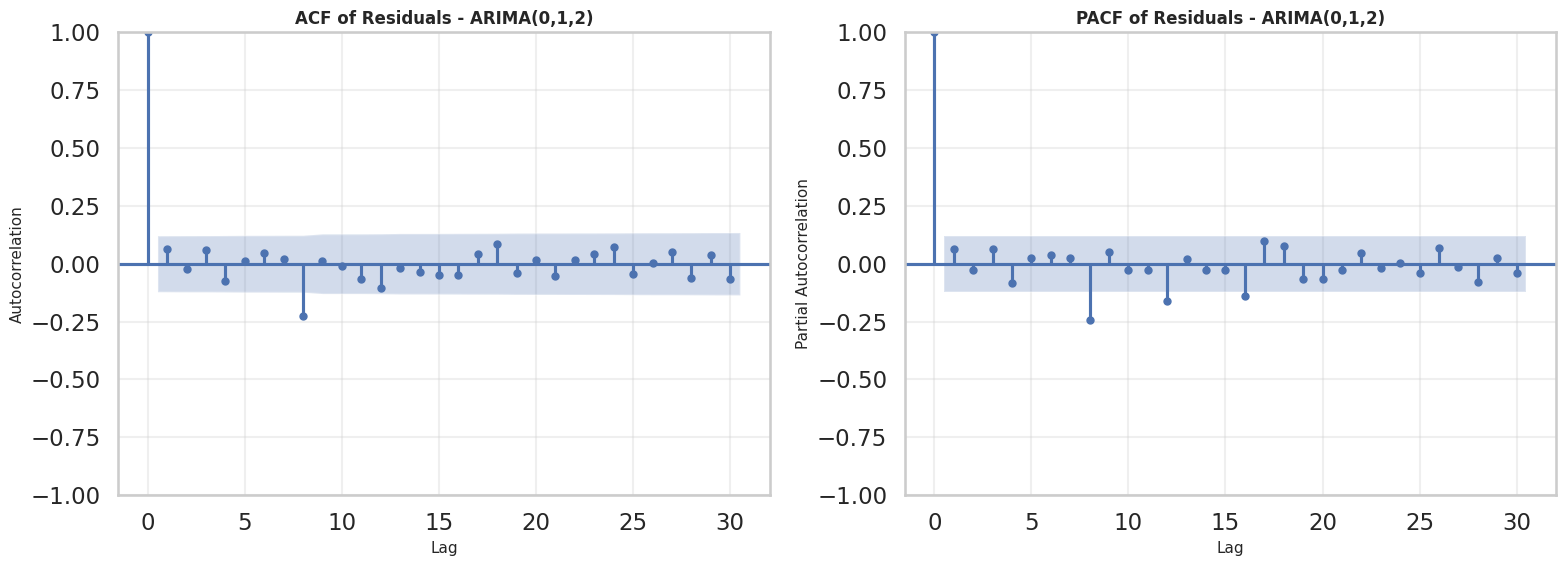

95% Confidence interval for ACF: ±0.1211

ACF Values (first 20 lags):
Lag    ACF        Significant?   
-----------------------------------
1      0.0626     No             
2      -0.0230    No             
3      0.0603     No             
4      -0.0745    No             
5      0.0107     No             
6      0.0480     No             
7      0.0205     No             
8      -0.2276    Yes            
9      0.0134     No             
10     -0.0115    No             
11     -0.0657    No             
12     -0.1056    No             
13     -0.0189    No             
14     -0.0349    No             
15     -0.0503    No             
16     -0.0473    No             
17     0.0408     No             
18     0.0844     No             
19     -0.0401    No             
20     0.0181     No             

Number of significant lags (excluding lag 0): 1
Significant lags: [8]


In [ ]:
# ACF AND PACF
print("\n" + "="*80)
print("AUTOCORRELATION ANALYSIS")
print("="*80 + "\n")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(residuals_90, lags=30, ax=axes[0], alpha=0.05)
axes[0].set_title('ACF of Residuals - ARIMA(0,1,2)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Lag', fontsize=11)
axes[0].set_ylabel('Autocorrelation', fontsize=11)
axes[0].grid(True, alpha=0.3)

plot_pacf(residuals_90, lags=30, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title('PACF of Residuals - ARIMA(0,1,2)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Lag', fontsize=11)
axes[1].set_ylabel('Partial Autocorrelation', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

acf_values_90 = acf(residuals_90, nlags=20, fft=False)
conf_interval_90 = 1.96 / np.sqrt(len(residuals_90))

print(f"95% Confidence interval for ACF: ±{conf_interval_90:.4f}\n")
print("ACF Values (first 20 lags):")
print(f"{'Lag':<6} {'ACF':<10} {'Significant?':<15}")
print("-" * 35)

significant_lags_90 = []
for i, val in enumerate(acf_values_90):
    if i == 0:
        continue
    is_sig = 'Yes' if abs(val) > conf_interval_90 else 'No'
    if abs(val) > conf_interval_90:
        significant_lags_90.append(i)
    print(f"{i:<6} {val:<10.4f} {is_sig:<15}")

print(f"\nNumber of significant lags (excluding lag 0): {len(significant_lags_90)}")
if significant_lags_90:
    print(f"Significant lags: {significant_lags_90}")
else:
    print("No significant autocorrelation detected")


Portmanteau tests - Ljung box across multiple lags


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print("\n" + "="*80)
print("LJUNG-BOX PORTMANTEAU TEST")
print("="*80 + "\n")

test_lags = [5, 10, 15, 20, 25, 30]

print("Testing for autocorrelation at multiple lag lengths:")
print(f"{'Lags':<8} {'LB Statistic':<15} {'p-value':<12} {'Result':<20}")
print("-" * 60)

lb_results = []

for lag in test_lags:
    lb_df = acorr_ljungbox(residuals_90, lags=lag, return_df=True)

    # Take the result for the highest lag
    lb_stat = lb_df['lb_stat'].iloc[-1]
    lb_pval = lb_df['lb_pvalue'].iloc[-1]

    result = 'No autocorr (✓)' if lb_pval > 0.05 else 'Autocorr detected (✗)'

    lb_results.append({
        'lags': lag,
        'statistic': lb_stat,
        'pvalue': lb_pval
    })

    print(f"{lag:<8} {lb_stat:<15.4f} {lb_pval:<12.4f} {result:<20}")



LJUNG-BOX PORTMANTEAU TEST

Testing for autocorrelation at multiple lag lengths:
Lags     LB Statistic    p-value      Result              
------------------------------------------------------------
5        3.6655          0.5985       No autocorr (✓)     
10       18.5944         0.0457       Autocorr detected (✗)
15       24.0183         0.0648       No autocorr (✓)     
20       27.6892         0.1170       No autocorr (✓)     
25       31.1687         0.1835       No autocorr (✓)     
30       34.7883         0.2504       No autocorr (✓)     


Analysis of both splits:

Looking at the plots of the residuals, specifically the histogram as well as the time plot, we can determine that the residuals appear to be centered around zero, exhibit approximately constant variance, and show no obvious serial dependence, which is consistent with white noise behavior. By examining the plots I am unable to identify any additional violations.

### 15. Out-of-Sample Evaluation (2 pts)

Report MAE, MSE, MAPE, and sMAPE on the test set.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred, eps=1e-8):
    y_true, y_pred = np.asarray(y_true), np.asarray(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), eps))) * 100

def smape(y_true, y_pred, eps=1e-8):
    y_true, y_pred = np.asarray(y_true), np.asarray(y_pred)
    return np.mean(
        2 * np.abs(y_pred - y_true) /
        np.maximum(np.abs(y_true) + np.abs(y_pred), eps)
    ) * 100

def evaluate_forecast(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "MAPE (%)": mape(y_true, y_pred),
        "sMAPE (%)": smape(y_true, y_pred)
    }


In [ ]:
# Forecast horizons
h80 = len(test_series_80)
h90 = len(test_series_90)

# Forecasts
pred_80 = final_model_80.forecast(steps=h80)
pred_90 = final_model_90.forecast(steps=h90)

# Ensure index alignment (important for safety)
pred_80 = pd.Series(pred_80.values, index=test_series_80.index)
pred_90 = pd.Series(pred_90.values, index=test_series_90.index)


In [ ]:
results = pd.DataFrame.from_dict({
    "Test Set of 80/20 split": evaluate_forecast(test_series_80, pred_80),
    "Test Set 90/10 split": evaluate_forecast(test_series_90, pred_90)
}, orient="index")


In [ ]:
print("\n" + "="*60)
print("ARIMA FORECAST PERFORMANCE ON TEST SETS")
print("="*60)
print(results.round(4))



ARIMA FORECAST PERFORMANCE ON TEST SETS
                            MAE     MSE  MAPE (%)  sMAPE (%)
Test Set of 80/20 split  2.1260  8.9854   27.0189    33.4878
Test Set 90/10 split     2.6405  8.9264   56.0255    42.2948


# Part IV — Evaluation, Robustness, and Production Considerations (Leo, Ryan)



### 16. Model Performance Under Alternative Temporal Splits (8 pts)

Estimate the final GDP and unemployment models under both temporal splits:

- 90% training / 10% testing
- 80% training / 20% testing

Report out-of-sample performance for each split



In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

def report_metrics(y_true, y_pred, split_name):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    rmse = sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    smape = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    print(f"{split_name} Split Performance")
    print(f"RMSE:  {rmse:.4f}")
    print(f"MAE:   {mae:.4f}")
    print(f"MAPE:  {mape:.2f}%")
    print(f"sMAPE: {smape:.2f}%")
    print("-" * 30)

    return rmse, mae, mape, smape

# 90/10
train_size_90 = int(len(df) * 0.9)
train_90, test_90 = df['urate'][:train_size_90], df['urate'][train_size_90:]
model_urate_90 = ARIMA(train_90, order=(0, 1, 2)).fit()
fc_urate_90 = model_urate_90.forecast(steps=len(test_90))
report_metrics(test_90, fc_urate_90, "Unemployment 90/10")

train_90_gdp, test_90_gdp = df['gdp'][:train_size_90], df['gdp'][train_size_90:]
model_gdp_90 = ARIMA(train_90_gdp, order=(1, 2, 0)).fit()
fc_gdp_90 = model_gdp_90.forecast(steps=len(test_90_gdp))
report_metrics(test_90_gdp, fc_gdp_90, "GDP 90/10")

# 80/20
train_size_80 = int(len(df) * 0.8)
train_80, test_80 = df['urate'][:train_size_80], df['urate'][train_size_80:]
model_urate_80 = ARIMA(train_80, order=(0, 1, 2)).fit()
fc_urate_80 = model_urate_80.forecast(steps=len(test_80))
report_metrics(test_80, fc_urate_80, "Unemployment 80/20")

train_80_gdp, test_80_gdp = df['gdp'][:train_size_80], df['gdp'][train_size_80:]
model_gdp_80 = ARIMA(train_80_gdp, order=(1, 2, 0)).fit()
fc_gdp_80 = model_gdp_80.forecast(steps=len(test_80_gdp))
report_metrics(test_80_gdp, fc_gdp_80, "GDP 80/20")

Unemployment 90/10 Split Performance
RMSE:  2.9877
MAE:   2.6405
MAPE:  56.03%
sMAPE: 42.29%
------------------------------
GDP 90/10 Split Performance
RMSE:  1252.6035
MAE:   1067.8254
MAPE:  5.29%
sMAPE: 5.48%
------------------------------
Unemployment 80/20 Split Performance
RMSE:  2.9976
MAE:   2.1260
MAPE:  27.02%
sMAPE: 33.49%
------------------------------
GDP 80/20 Split Performance
RMSE:  4032.9983
MAE:   3624.6347
MAPE:  20.10%
sMAPE: 17.99%
------------------------------


(4032.9983292935567,
 3624.634710694006,
 np.float64(20.09955079968064),
 np.float64(17.989161226924658))

1. Unemployment Model Performance

Unemployment forecasts show very similar RMSE across both splits which indicates stable absolute error magnitudes. The Unemployment model performed better on the 80/20 split (MAE is lower in the 80/20 split). The 90/10 split resulted in much higher error rates, suggesting the model struggled to predict the volatility in the most recent 10% of the data and performs slightly better when evaluated over a larger test window. Overall, unemployment forecasts appear reasonably stable across the splits.

2. GDP Model Performance

The GDP model performed significantly better on the 90/10 split as seen with the forecasts deteriorating substantially in the 80/20 split. The model benefited from the longer training period, whereas the 80/20 split yielded much higher errors. This is seen with the much larger MAE and RMSE when the test window is longer indicating that the ARIMA model struggles to generalize over the broader out-of-sample horizon but the smaller errors with the 90/10 split suggest that the mdoel fits the most recent portion of the series better than earlier segments.

### 17. Metric Selection and Justification (7 pts)

Because validation windows differ in length, not all error metrics are directly comparable.

Select one or more error metrics that allow meaningful comparison across splits. For each metric:

- explain its statistical properties
- justify its use in this context
- discuss at least one limitation or bias

Metrics based on cumulative error should be explicitly rejected or carefully justified.
_____________________________________________________

Error metrics that accumulate error over time are not directly comparable and thus are rejected. The evaluation would need to rely on scale-normalized or per-observation metrics that remain meaningful regardless of window size:

1- MAE:

    Properties:
    - Computes the average absolute deviation between forecasts and actual values
    - Is linear so each error contributes proportionally
    - Is scale dependent but not sensitive to outliers in the same way as squared-error metrics

    Justification:
    - MAE is per-observation so it doesn't grow with the length of the test window
      - So it is directly comparable across the 80/20 and 90/10 splits

    Limitation/Bias:
    - Since it is scale dependent, it can't be compared across different variables unless they share the same units
    - It penalizes large errors less heavily than MAE which may understate the impact of extreme deviations

2- sMAPE:

    Properties:
    - Expresses forecast error as a percentage of the average magnitude of the actual and predicted values
    - Scale-free so allows comparison across different time windows and variables
    - Bounded between 0-200% improving interpretability

    Justification:
    - Because it normalizes by the magnitude of the series, it remains comparable even when the test window changes
    - It avoids division by zero and extreme inflation problems that MAPE has when actual values are near zero
    
    Limitation/Bias:
    - Can behave erratically when both actual and predicted values are very small
    - Less intuitive than MAE because the denominator includes both actual and predicted values
    

### 18. Robustness of Conclusions Across Splits (6 pts)

Using the selected metric(s), assess whether conclusions about relative model performance are stable across splits.

Discuss:

- changes in model ranking
- widening or narrowing performance gaps
- implications for parameter stability and dependence on training history

____________________________________________________________

Using the metrics selected above (MAE and sMAPE) to assess whether the model's relative performance is stable across the 2 temporal splits:

**Changes in model ranking:**

Unemployment Model:
- MAE: increased slightly from 80/20(2.1260) to 90/10 (2.6405) but this is a modest deterioration and isn't enough to change the qualitative assessment of the model
- sMAPE: increases more sharply 80/20 (33.49%) to 90/10(42.29%) which indicates that the model performs noticeably worse on the final segment of the series.

The model remains middle-performing under both splits but its relative performance worsens when the test window is shifted toward the end of the sample. The ranking is stable since the model didn't get substantially worse or better with the window shift but the 90/10 split reveals weaker behavior. Overall, this model is the better-behaved of the two under both splits.

GDP Model:
- MAE: decreased significantly from 80/20(3624.63) to 90/10 (1067.83)
- sMAPE: decreases substantially from 80/20(17.99%) to 90/10(5.48%)

Performace substantially changes with the temporal shift. With 80/20 split it performs poorly but when the split becomes 90/10, it improves significantly. In regards to model ranking, the model's qualitative performance changes drastically between splits proving that the ranking is not stable. The model shifts from being a "poor" predictor (under the 80/20 split) to a "highly accurate" predictor (under the 90/10 split). This indicates that the additional 10% of training data was critical for the model to learn the correct trend.

Overall: GDP remains the weaker of the two models in both splits and the ranking of the GDP model and unemployment is stable across splits. The relative ordering of model performance doesn't change and unemployment forecasts remain more accurate than GDP forecasts under both temporal splits.

**Widening or Narrowing performance gaps:**

Unemployment:
- MAE: the difference between the splits is small so the model's absolute error is pretty stable
- sMAPE: the difference is large which suggests that the model is more sensitive to the magnitude and volatility of the most recent observations.

GDP:
 - MAE drops by over 70% (from 3624 down to 1067) when moving from the 80/20 split to the 90/10 split.
- sMAPE: The percentage error narrowed significantly (from ~18% down to ~5.5%)

There is a wide performance gap but unlike the unemployment model, this gap represents a convergence toward accuracy. It seems as if the model was unlikely to capture the long-term trend or recovery dynamics when limited to 80% of the data which resulted in the large errors which vanished when the training set was expanded.

Overall:
The performance gap between GDP and unemployment widens substantially when the test window is longer. Unemployment errors remain relatively stable while GDP errors grow disproportionately as the forecast horizon expands.


**Implications for parameter stability and dependence on training history**

Unemployment:
- Small change in MAE and moderate in sMAPE suggest parameter stability
- Model generalizes reasonably well across different training histories

GDP:
- Large deterioration indicates parameter instability (they are highly sensitive to the training window)
- Model depends heavily on having more recent data in the training window. The fact that the model failed on the 80/20 split but succeeded on the 90/10 split suggests that the "missing" 10% of training data contained structural information (likely a trend recovery or stabilization) that was essential for accurate forecasting.
- Suggets non-stationarity or structural breaks in GDP that the ARIMA specification doesn't fully capture
- The model shows a high dependence on trainign history and is not robust to time-shifting and requires the maximum amount of historical data to accurately project the GDP trend. The 80/20 split likely forced the model to test on a period where the economic conditions differed significantly from the truncated training set, leading to large forecast errors.

The unemployment model shows robustness to training-window changes whereas the GDP model is highly sensitive to which part of the series is used for estimation. This dependence on training history suggests that the GDP process may have undergone regime changes or shifts in volaitlity that the model can't accomodate.



### 19. Data Revisions and Production Implications (4 pts)

Explain how publication lags, historical revisions, and regime changes in GDP and unemployment data could affect:

- model estimation
- backtesting results
- real-time forecast performance
____________________________________________________________
**Model Estimation**
- Publication lags: inital releases are often incomplete or noisy and models estimated on "final" revised data implicitly assume information that wasn't available at the time which leads to overly optimistic parameter estimates
- Historical Revisions: Both GDP and unemployment undergo benchmark revisions, seasonal adjustment updates and methodological changes. Because of this, estimating on revised data can produce parameters that fit the revised history not the data the model would have seen in real time. This creates revision bias- the model appears more stable than it actually is.
- Regime Changes: structural breaks (eg. policy shifts, recessions, pandemics) alter the underlying data-generating process and ARIMA parameters estimated on pre-break data may no longer be valid afterward. This reduces parameter stability and increases the risk of overfitting outdated patterns.

**Backtesting Results**
- Publication lags: backtesting using revised data implicitly assume the model had access to information that was not available at the time which leads to look ahead bias making backtests appear better than real-time performance
- Historical Revisions: backtests on revised data enderstate the true uncertainty faced by forecasters and forecast errors computed on revised data may be smaller than the errors that would have occurred using real-time vintages
- Regime Changes: backtests spanning multiple regimes may show swings in performance (a model that performs well in one regime may fail in another). This makes backtesting results non-robust across time.

**Real-Time Forecast Performance**
- Publication Lags: forecasts would be generated using incomplete or preliminary data which increases noise and reduces accuracy. Real time forecasts often perform worse than backtests because the model is operating with less information.
- Historical Revisions: Forecasts made in real time may later appear inaccurate because the underlying data was revised which complicates evaluation since it would need to be determined if the forecast was wrong or if the data was changed
- Regime Changes: Real-time performance deteriorates sharply when the economy enters a new regime not represented in the training data and models may systemically under or over predict until parameters are re-estimated or the model is redesigned
